## A. Introduction
### State what project you are working on
I am working on the Pitt Athletics project, which involves a comprehensive dataset with numerous rows and columns detailing various aspects of attendees at University of Pittsburgh games. The primary goal of this project is to predict whether an individual who attended the UPitt games in one season would return for the following season. 

### Classification or Regression?
This is approached as a classification problem, utilizing various data visualization techniques to build and evaluate predictive models.

### Describe Major Findings
1. **Model Selection**: Initially, multiple logistic regression models were evaluated based on their performance metrics, including accuracy and ROC AUC, on the training set. A subset of models was selected for further scrutiny based on their initial performance.
2. **Cross-Validation**: Cross-validation was conducted on the selected models to assess their generalizability. This process involved evaluating each model's performance on both training and testing datasets. Performance metrics, such as mean accuracy and standard deviation, were computed to understand the stability and reliability of each model.
3. **Best Model Identification**: After cross-validation, the model with the highest mean testing accuracy was determined to be the best performing. This model demonstrated strong performance and was selected for its superior ability to generalize to unseen data.

### Which imputs/features seem to influence the response/outcome the most?
The most important inputs tend to be based on the magnitude of statistically significant coefficients, we identified the most important features for the best model: 
* `price_per_ticket`: One of the most significant continuous variables.
* `lump_gender`: The renewal rates vary between those with missing and non-missing gender data, with higher renewal rates seen in the group with available gender information. This highlights the importance of demographic data in improving renewal strategies, suggesting that collecting this information should be prioritized.
*  Categorical Variables: Various categorical variables related to direction, purchase_month, purchase_dow, price_type, price_level, bin_age, and lump_gender were also significant.


### What supported your conclusion? Was it only predictive models?
Our conclusion was supported by:
1. **Comprehensive Evaluation**: The use of multiple evaluation metrics and performance measures, such as accuracy, ROC AUC, sensitivity, and specificity, provided a well-rounded view of model effectiveness.
2. **Cross-Validation Results**: The consistency of model performance across multiple folds of cross-validation provided a robust assessment of the models generalizability. By evaluating models on different subsets of the data, we ensured that the selected model performed reliably on unseen data.
3. **Model Comparison**: Comparing several models helped in identifying the one that performed best, based on both training and testing metrics.
4. **Statistical Significance of Coefficients**: We examined the statistical significance of model coefficients to ensure that the predictors used in the model had a meaningful impact on the outcome. This helped confirm that the best model was not only predictive but also based on statistically significant predictors.

## Can EDA help identify similar trends/relationships
Yes, Exploratory Data Analysis (EDA) can significantly help in identifying trends and relationships in the data, which can be crucial for model selection and interpretation. 
1. Histograms and Density Plots: These can reveal the distribution of individual variables and help identify patterns, skewness, or outliers.
Box Plots: Useful for visualizing the spread and identifying potential outliers in continuous variables.
2. Scatter Plots: Show relationships between pairs of variables, helping to identify potential linear or non-linear trends.
Correlation Matrix: Helps to see how variables are correlated with each other, which can inform feature selection and interactions in the model.
3. Correlation Matrix Heat Maps: Visualize the correlation between continuous variables. Strong correlations can indicate potential relationships. Hierarchical Clustering Heat Maps: Show patterns and relationships between variables or samples, which can reveal clusters or groupings in the data.


## Was clustering consistent with any conclusions from the predictive models?
Yes the cluster analysis was indeed consistent with the predictive models!

## What skills did you learn from going through this project?
This project has taught me many skills, starting from the basics of EDA and data visualiztion to other advanced technical skills such as data preprocessing and cleaning, model building and selection, as well as clustering and segmentation. Overall, this project has enhanced my ability to work with data from start to finish, applying a variety of analytical techniques to extract meaningful insights. It provides hands-on experience with data preprocessing, model building, evaluation, and communication, all of which are crucial for effective data science practice.

## This is not related to application or project inputs/outputs directly. What general skills can you take away from the project to apply to applications more specific in your area of interest?
From this project, I have honed several skills crucial for the world of data science. I gained expertise in data cleaning and preparation, including handling missing values, transforming data, and merging datasets. Through exploratory data analysis (EDA), I developed the ability to visualize data distributions, understand correlations, and assess feature importance. I also became proficient in model selection and evaluation, using metrics like accuracy, ROC AUC, and cross-validation to gauge performance. Statistical analysis skills, such as hypothesis testing and calculating confidence intervals, further enhanced my ability to interpret model results. Additionally, I refined my programming skills with Python libraries like pandas, numpy, and scikit-learn, and learned to communicate findings effectively through reporting and visualization. These skills are foundational for advancing in data science and transitioning to machine learning engineering, where feature engineering, model optimization, and advanced techniques play a pivotal role.

## B. EDA

## Import Modules

In [400]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [401]:
df = pd.read_csv('pitt_athletics_cmpinf2100_project.csv.csv')

In [402]:
df.shape

(3360, 15)

In [403]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   accountid           3360 non-null   int64  
 1   age                 1567 non-null   float64
 2   gender              582 non-null    object 
 3   distancemiles       3360 non-null   float64
 4   direction           3360 non-null   object 
 5   peak_drivetime      2958 non-null   float64
 6   offpeak_drivetime   2996 non-null   float64
 7   season              3360 non-null   int64  
 8   purchase_month      3360 non-null   object 
 9   purchase_dow        3360 non-null   object 
 10  price_type          3360 non-null   object 
 11  price_level         3360 non-null   object 
 12  ticket_count        3360 non-null   int64  
 13  price_per_ticket    3360 non-null   float64
 14  return_next_season  3360 non-null   object 
dtypes: float64(5), int64(3), object(7)
memory usage: 393.9+

In [404]:
df.dtypes

accountid               int64
age                   float64
gender                 object
distancemiles         float64
direction              object
peak_drivetime        float64
offpeak_drivetime     float64
season                  int64
purchase_month         object
purchase_dow           object
price_type             object
price_level            object
ticket_count            int64
price_per_ticket      float64
return_next_season     object
dtype: object

In [405]:
df.isna().sum()

accountid                0
age                   1793
gender                2778
distancemiles            0
direction                0
peak_drivetime         402
offpeak_drivetime      364
season                   0
purchase_month           0
purchase_dow             0
price_type               0
price_level              0
ticket_count             0
price_per_ticket         0
return_next_season       0
dtype: int64

In [406]:
df.nunique()

accountid             3360
age                     70
gender                   4
distancemiles         3300
direction                8
peak_drivetime        2311
offpeak_drivetime     2333
season                   1
purchase_month           3
purchase_dow             6
price_type               4
price_level              8
ticket_count            20
price_per_ticket       113
return_next_season       2
dtype: int64

## Visualizing Categorical Variables

Since `accountid` is a unique identifer we will not use it in any of our visualizations

We can visualize categorical variables and categorical relationships (combinations) in many different ways such as creating:
* Count plots
* Dodged bar charts
* Facets
* Heatmaps

### Categorical Variables
* gender
* direction
* purchase_month
* purchase_dow
* price_type
* price_level
* ticket_count
* return_next_season

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


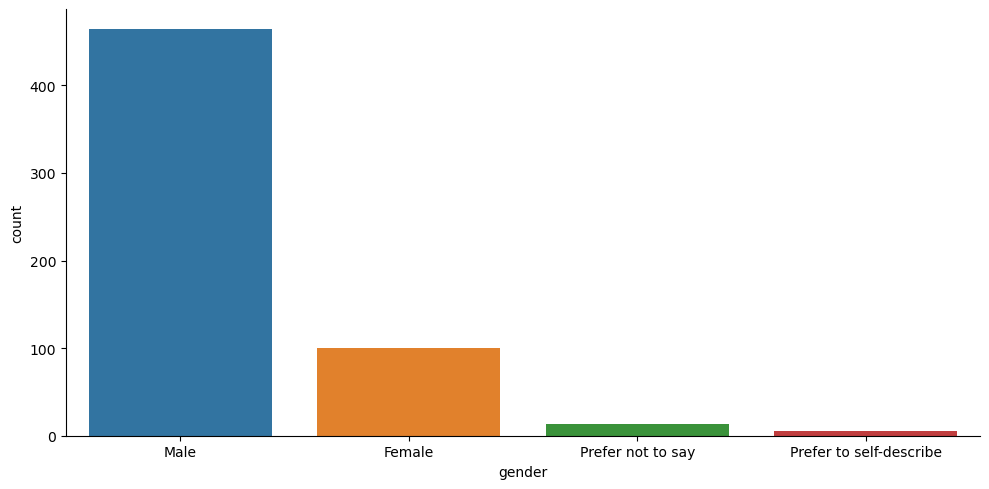

In [407]:
sns.catplot(data = df, x = 'gender', kind = 'count', aspect= 2)
plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


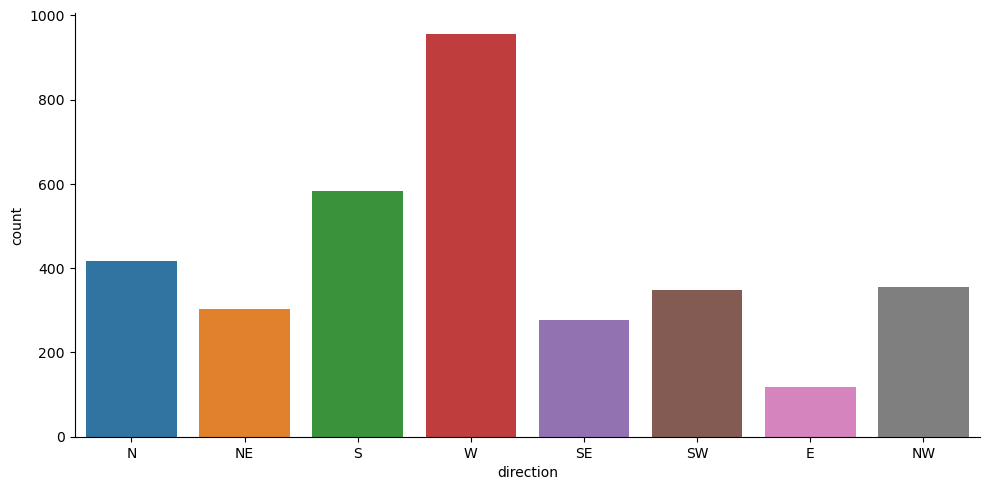

In [408]:
sns.catplot(data = df, x = 'direction', kind = 'count', aspect= 2)
plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


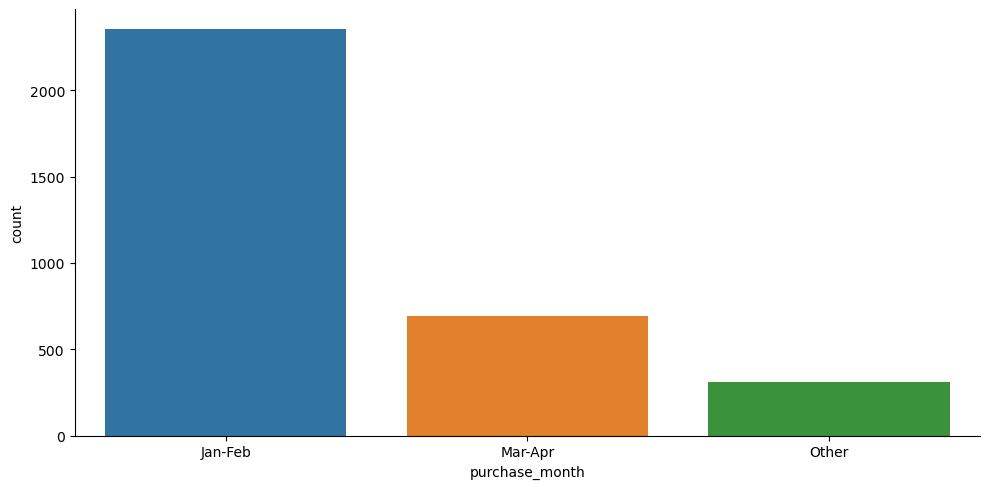

In [409]:
sns.catplot(data = df, x = 'purchase_month', kind = 'count', aspect= 2)
plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


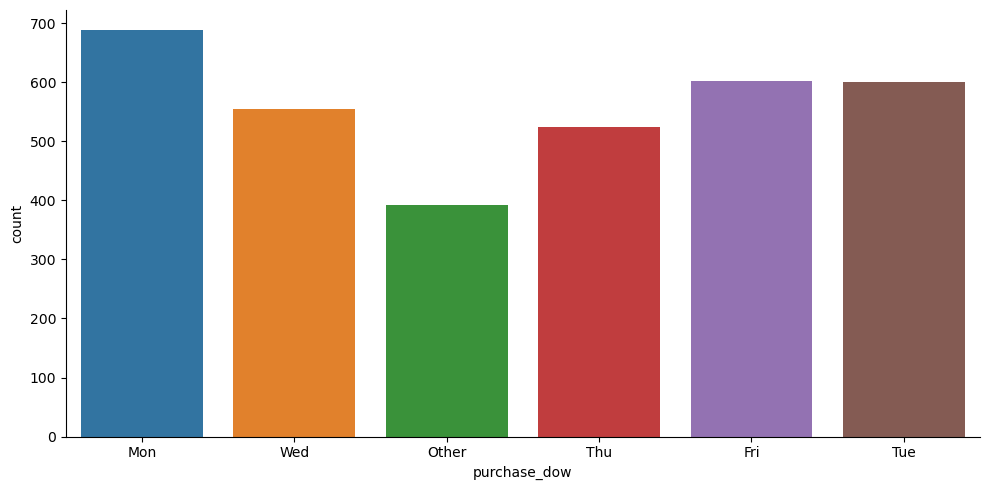

In [410]:
sns.catplot(data = df, x = 'purchase_dow', kind = 'count', aspect= 2)
plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


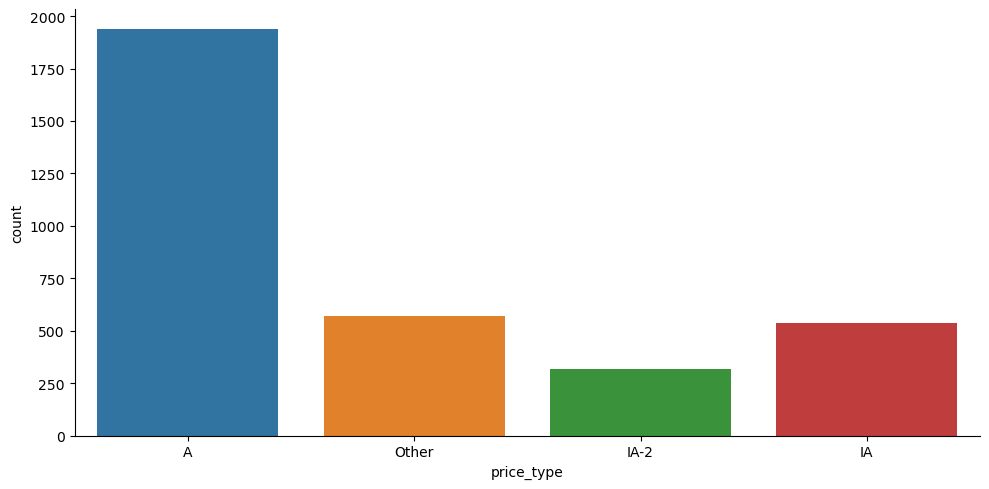

In [411]:
sns.catplot(data = df, x = 'price_type', kind = 'count', aspect= 2)
plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


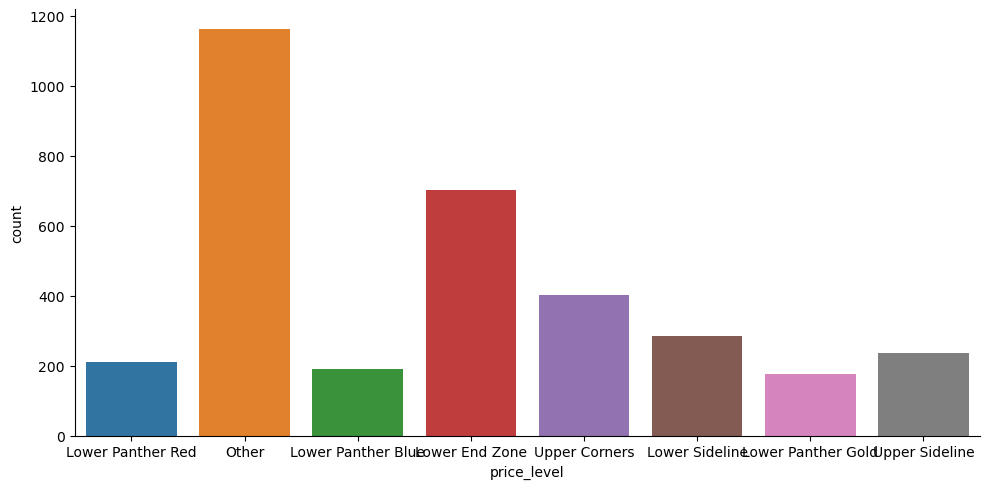

In [412]:
sns.catplot(data = df, x = 'price_level', kind = 'count', aspect= 2)
plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


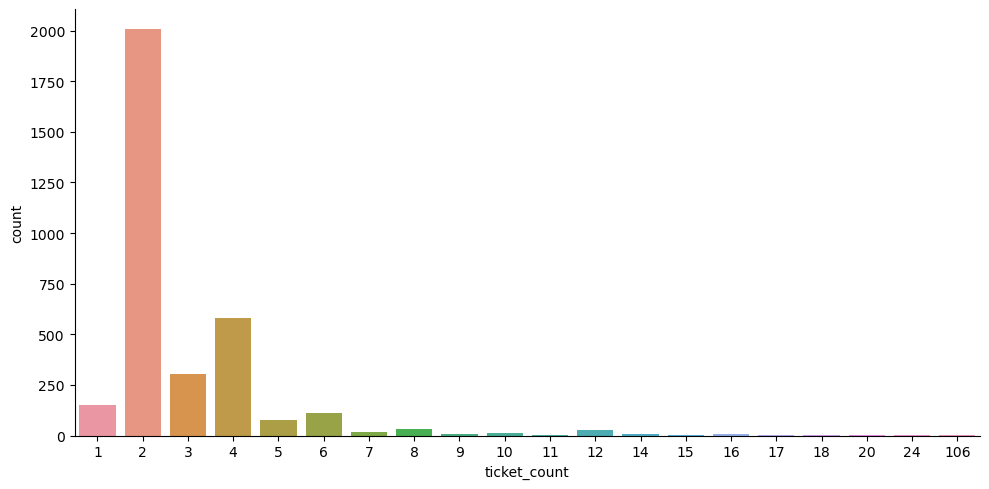

In [413]:
sns.catplot(data = df, x = 'ticket_count', kind = 'count', aspect= 2)
plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


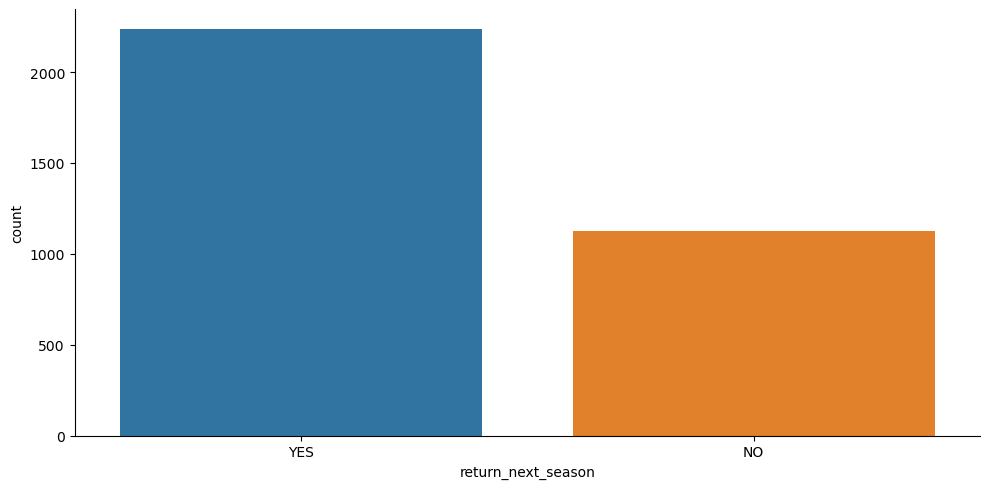

In [414]:
sns.catplot(data = df, x = 'return_next_season', kind = 'count', aspect= 2)
plt.show()

Above we have the counts for all categorical variables. This gives us a starting point on the distribution of counts

## Visualizing Continuous Variables

There are indeed many ways to visualize continuous variables as well as the reltaionships between two continuous variables. Those include:
*  Histograms
*  Scatter Plot
*  Heatmap

## Continuous Variables

* age
* distancemiles
* peak_drivetime
* offpeak_drivetime
* price_per_ticket

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


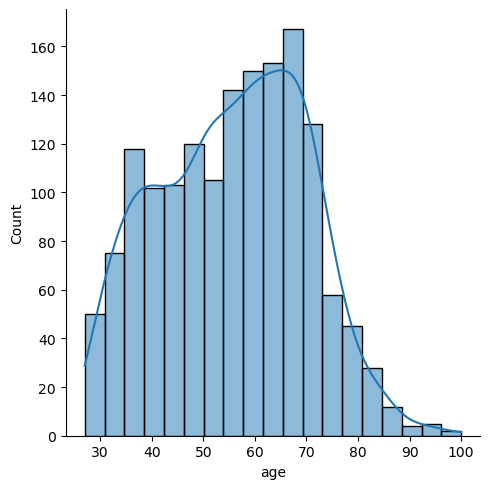

In [415]:
sns.displot(data = df, x = 'age', kind = 'hist', kde = True)
plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


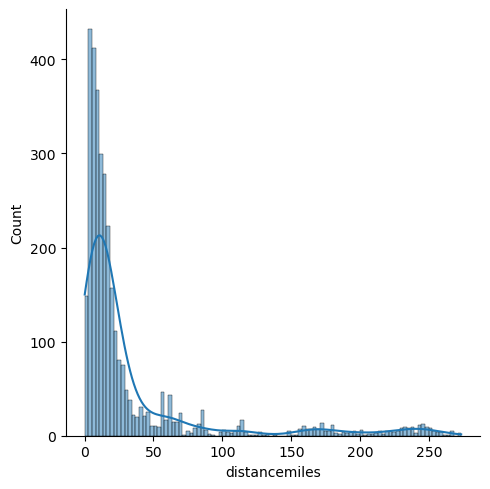

In [416]:
sns.displot(data = df, x = 'distancemiles', kind = 'hist', kde = True)
plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


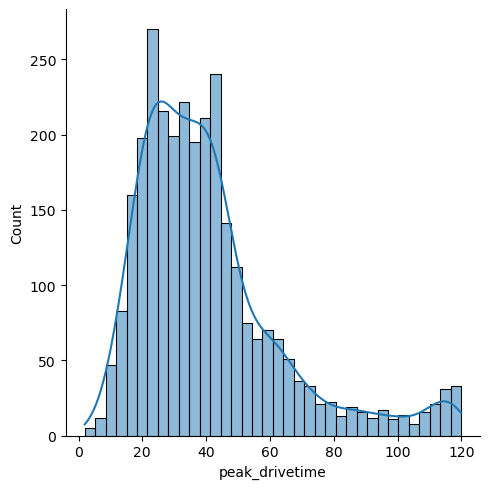

In [417]:
sns.displot(data = df, x = 'peak_drivetime', kind = 'hist', kde = True)
plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


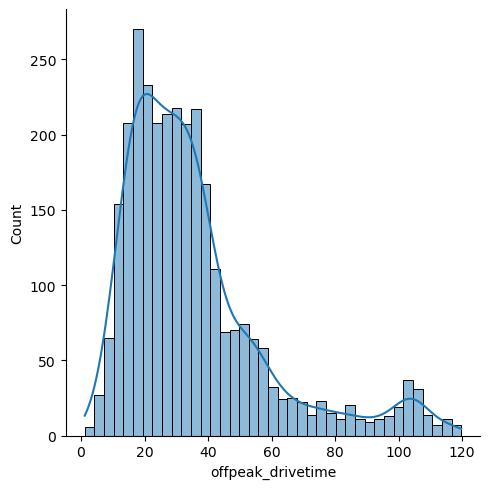

In [418]:
sns.displot(data = df, x = 'offpeak_drivetime', kind = 'hist', kde = True)
plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


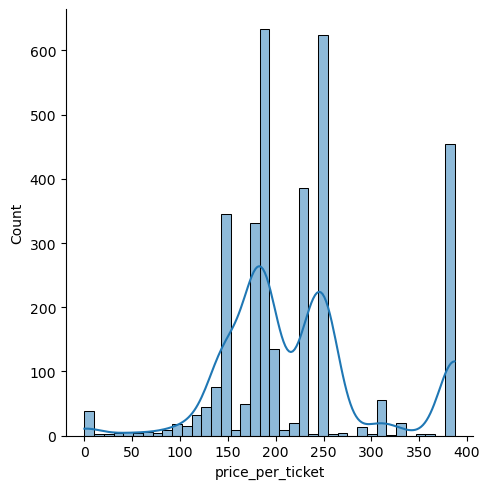

In [419]:
sns.displot(data = df, x = 'price_per_ticket', kind = 'hist', kde = True)
plt.show()

We show all the histograms for the continuous variables since it shows the counts as well as the kde to visualize the trend all across the variables

### Visualize relationships between continuous variables

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


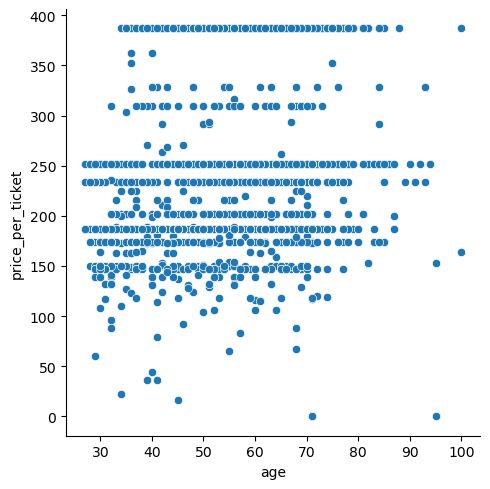

In [420]:
sns.relplot(data = df, x='age', y='price_per_ticket')

plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


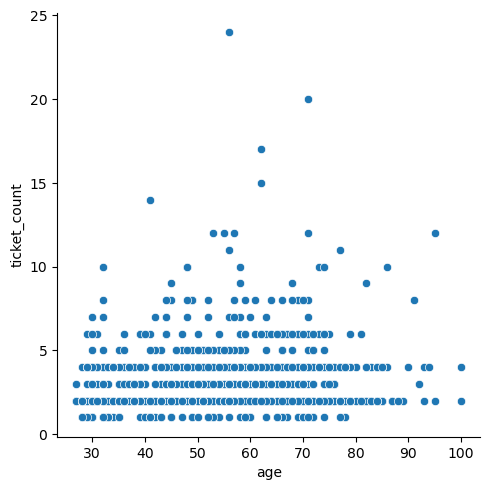

In [421]:
sns.relplot(data = df, x='age', y='ticket_count')

plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


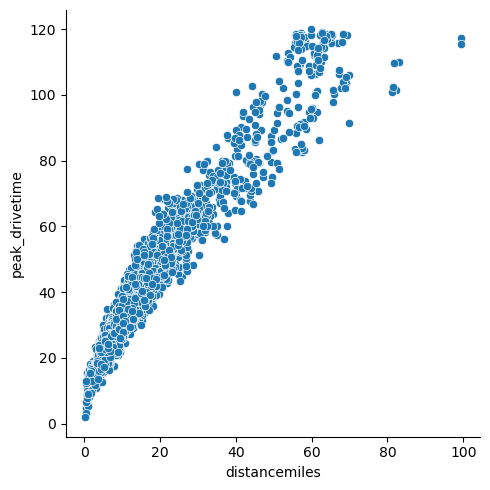

In [422]:
sns.relplot(data = df, x='distancemiles', y='peak_drivetime', kind='scatter')

plt.show()

The figure above represent the relationship between 2 continuous variables which shows the same type for all variables when comparing the relationship. As you can see, we can visualize the the amoutn of people that buy a certain priced ticket based on age as well as how manu tickets are purchased based on age as well

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


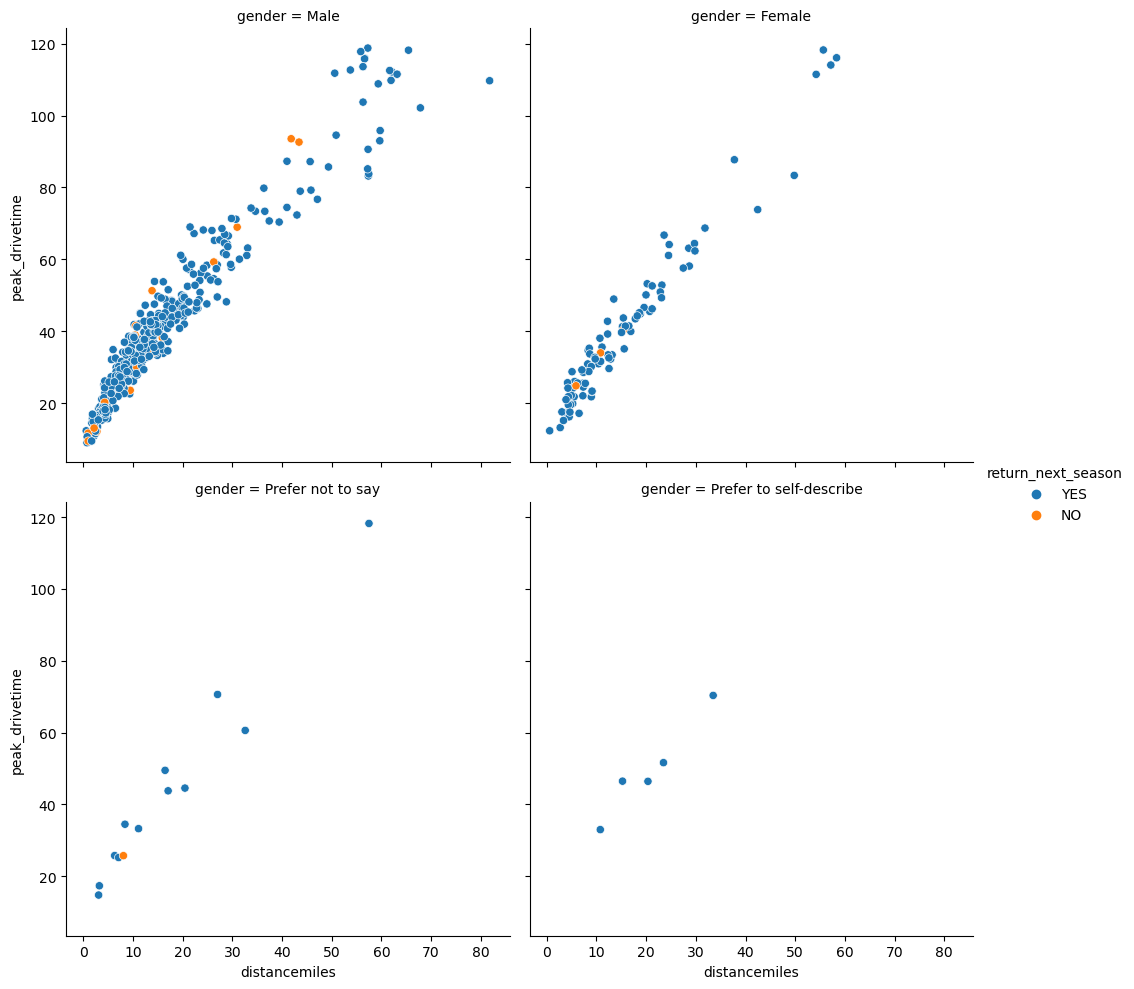

In [423]:
sns.relplot(data = df, x = 'distancemiles', y = 'peak_drivetime', hue = 'return_next_season', col = 'gender', 
            col_wrap = 2)
plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


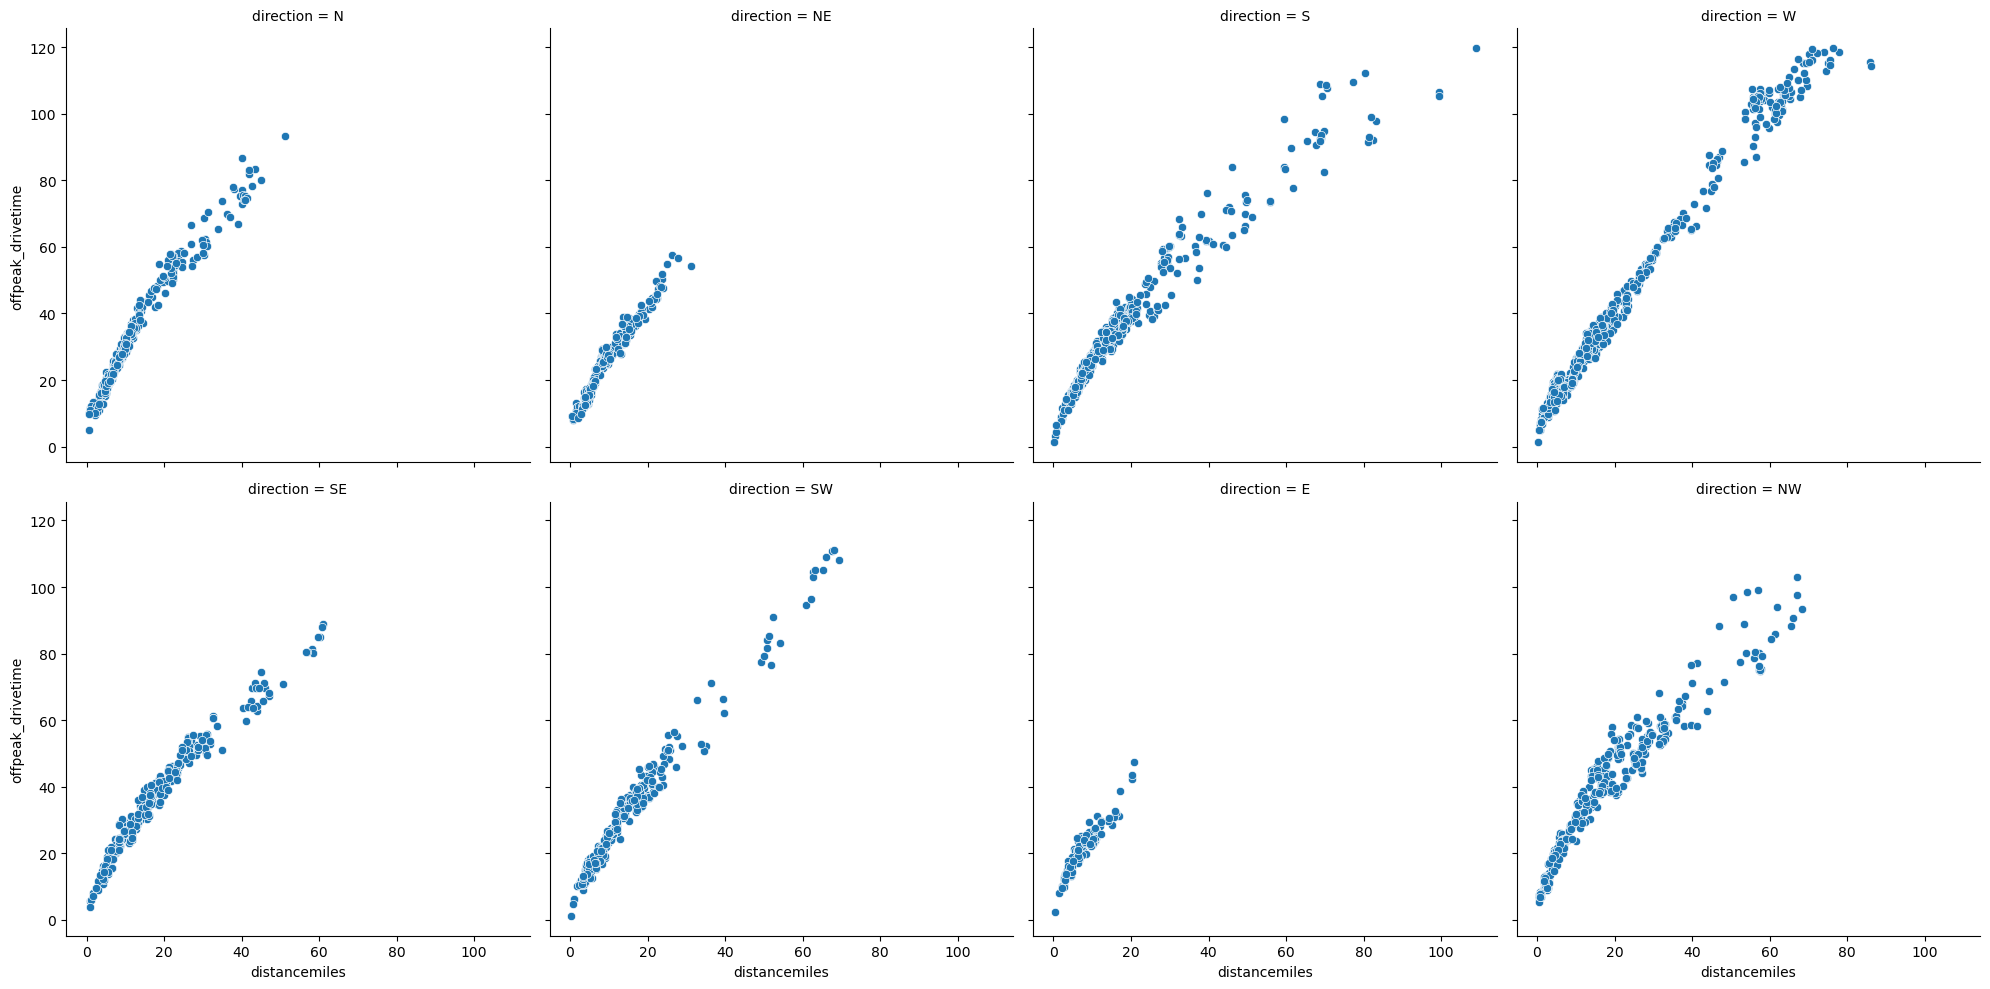

In [424]:
sns.relplot(data = df, x='distancemiles', y='offpeak_drivetime', col='direction', col_wrap=4, kind='scatter')

plt.show()

We show the relationship between 2 continuous variables grouped by 2 categroical variables using a relplot. Important because it allows us to see the association between these continuous variables based on categorical variables as well

The second scatter plot shows what the relationship between 2 continuous variables but with only 1 categorical variable

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


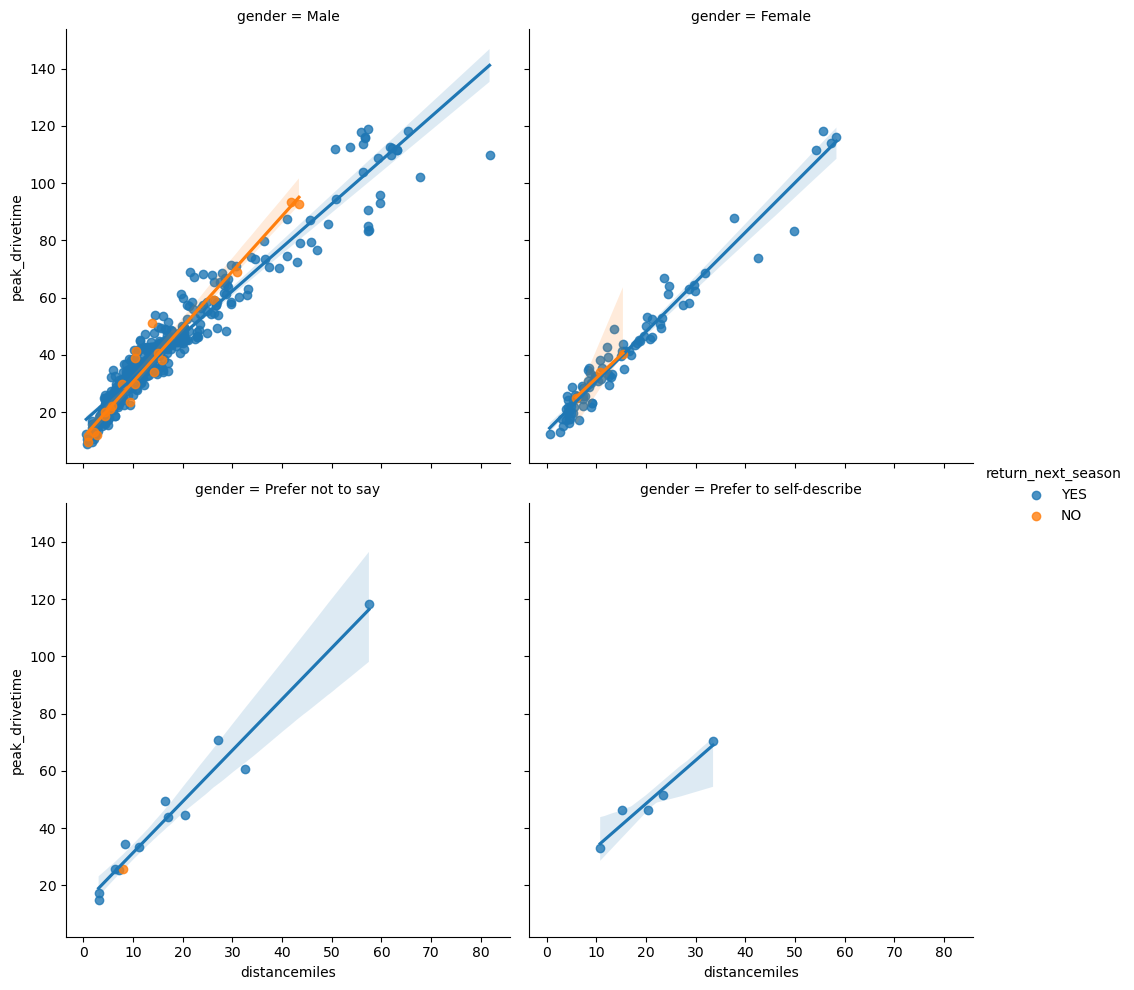

In [425]:
sns.lmplot(data = df, x = 'distancemiles', y = 'peak_drivetime', hue = 'return_next_season',  
           col = 'gender',
           col_wrap = 2)
plt.show()

Here we visualize the same variables between categorical and continuous but we have a linear regression line that shows us a more useful association between the variables

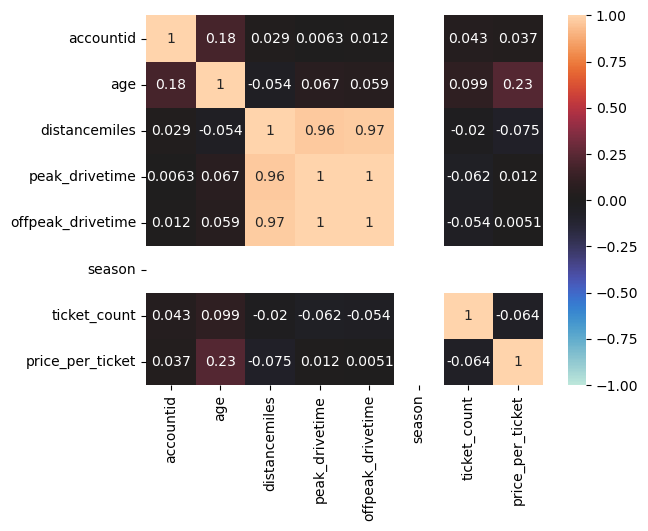

In [426]:
fig, ax = plt.subplots()
sns.heatmap(data = df.corr(numeric_only = True),
            vmin=-1, vmax=1, center = 0,
            annot=True, annot_kws={'size': 10},
            ax=ax)
plt.show()

This shows a correlation between all continuous variables however we do have accountid and will later visualize the correlation heatmap without accountid to see if any values change

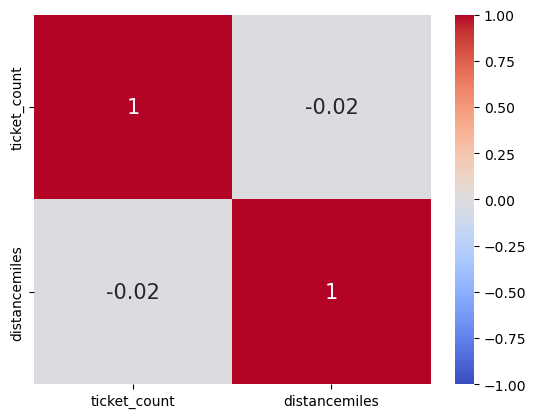

In [427]:
fig, ax = plt.subplots()

sns.heatmap(data = df.loc[:, ['ticket_count', 'distancemiles']].corr(),
            vmin=-1, vmax=1, center = 0,
            cmap='coolwarm',
            annot=True, annot_kws={'size': 15},
            ax=ax)

plt.show()

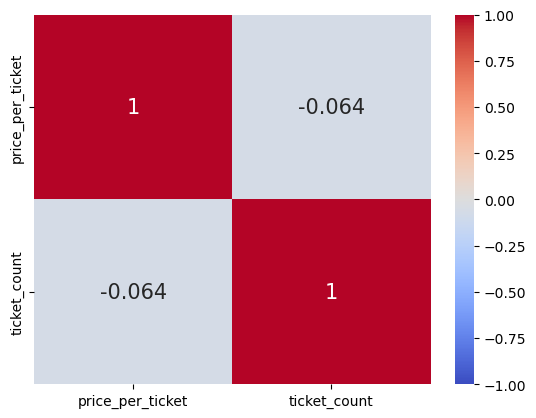

In [428]:
fig, ax = plt.subplots()

sns.heatmap(data = df.loc[:, ['price_per_ticket', 'ticket_count']].corr(),
            vmin=-1, vmax=1, center = 0,
            cmap='coolwarm',
            annot=True, annot_kws={'size': 15},
            ax=ax)

plt.show()

Above we have some more correlation heatmaps to see the relationships between 2 continuous variables and not all of them

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


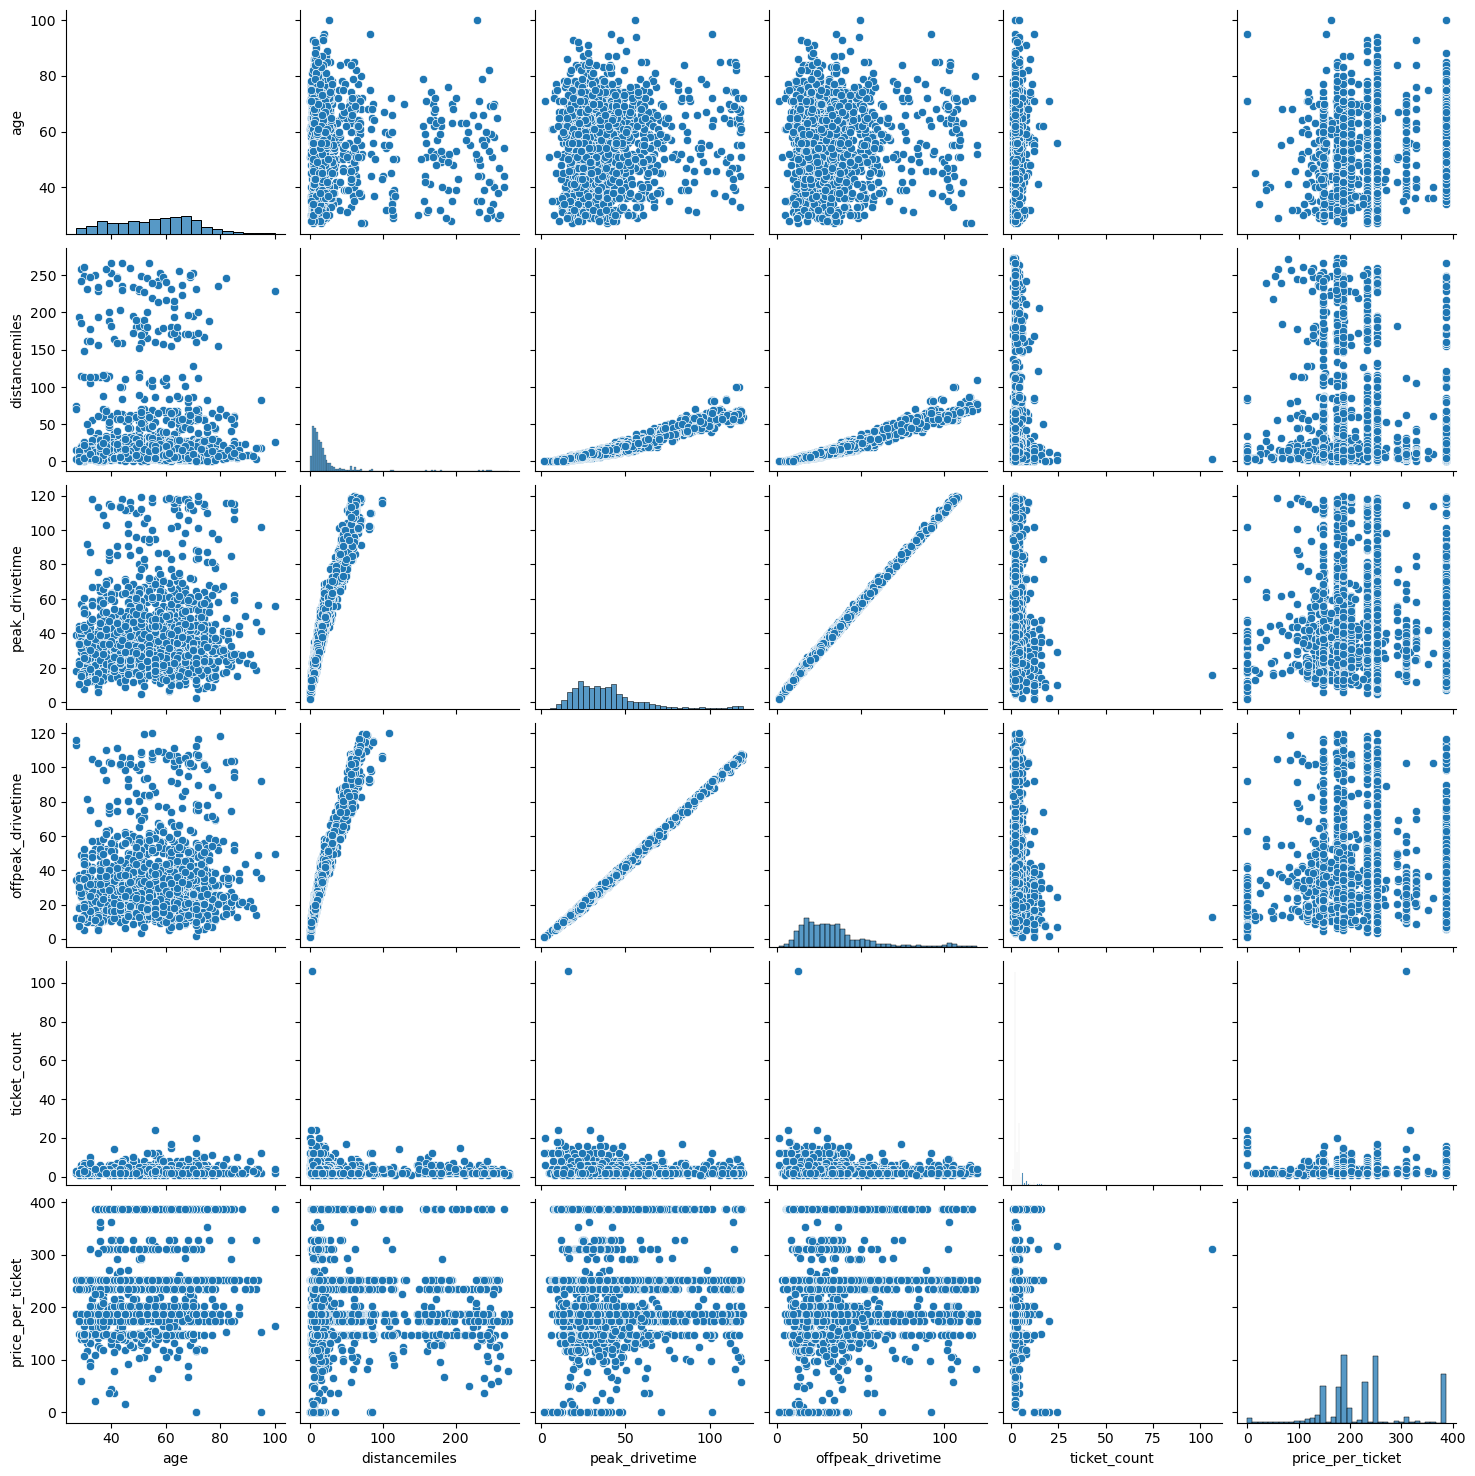

In [429]:
sns.pairplot(data = df, vars = ['age', 'distancemiles', 'peak_drivetime', 'offpeak_drivetime', 'ticket_count','price_per_ticket'],
             diag_kws = {'common_norm' : False})
plt.show()

Finally we have a pair plot that shows all the relationships between continiuous variables

## Visualizing Categorical to Continuous Relationships

There are many ways to visualize categorical to continuous relationships. We will visualize using:
* Distribution plots
* Boxplots
* Pointplot
* Violin Plot

#### First we will visualize using Distribution Plots

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


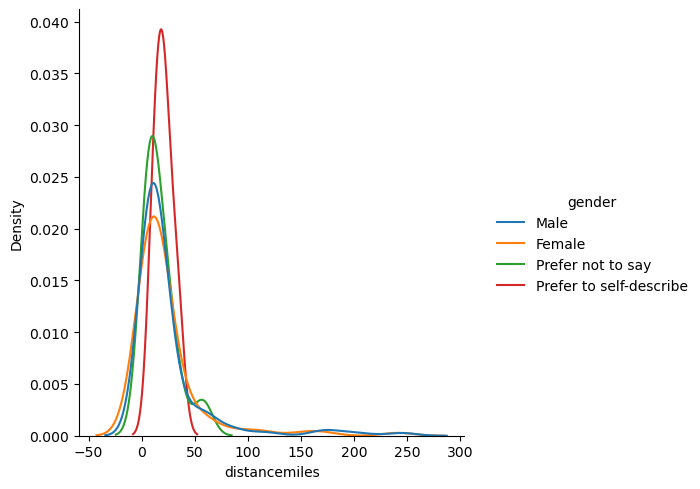

In [430]:
sns.displot(data=df, x='distancemiles', 
            hue='gender', 
            kind='kde',
           common_norm=False,)
plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


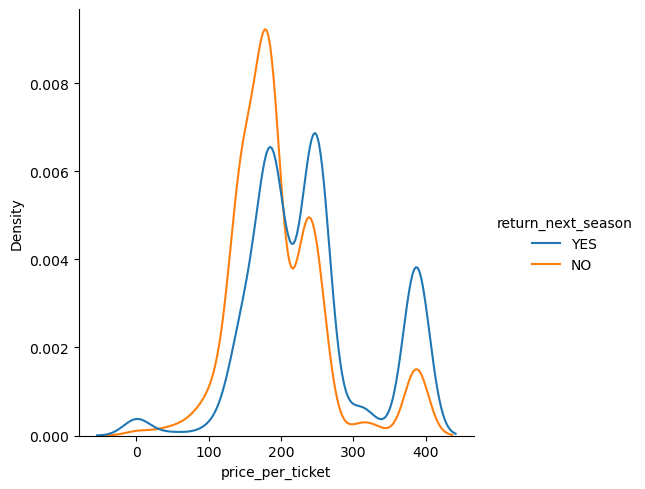

In [431]:
sns.displot(data=df, x='price_per_ticket', 
            hue='return_next_season', 
            kind='kde',
           common_norm=False,)
plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


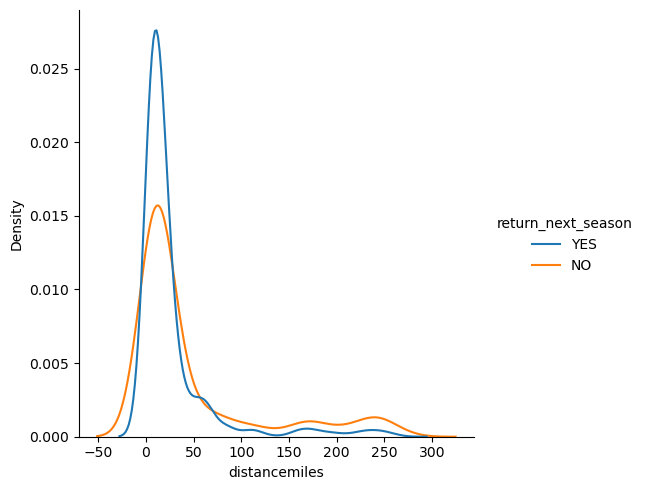

In [432]:
sns.displot(data=df, x='distancemiles', 
            hue='return_next_season', 
            kind='kde',
           common_norm=False,)
plt.show()

These relationships are important to keep since I believe these inputs have an influence on the general outcome of this project

#### Visualize using Boxplots

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


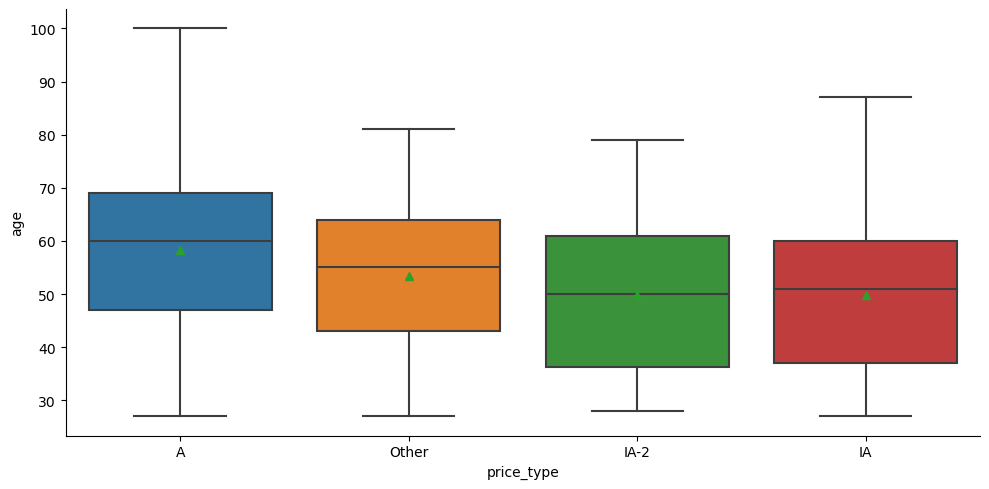

In [433]:
sns.catplot(data=df, x='price_type', y='age', kind='box',
           showmeans=True, aspect=2)
plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


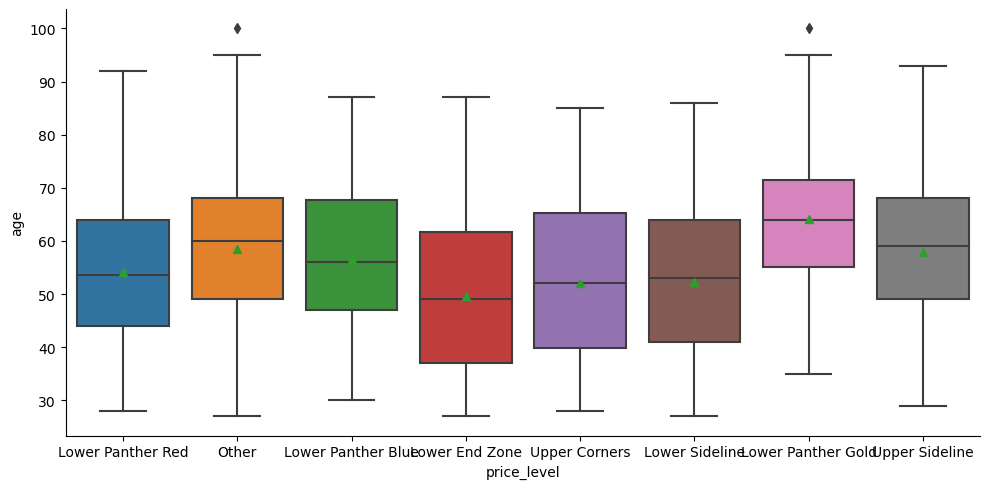

In [434]:
sns.catplot(data=df, x='price_level', y='age', kind='box',
           showmeans=True, aspect=2)
plt.show()

The median age and age range for the "Other" category are higher compared to the "Lower Panther Gold" and "Lower Panther Blue End Zone" categories. The "Upper Corners" and "Lower Sideline" categories have similar age ranges and medians. The "Lower Panther Red" and "Upper Sideline" categories exhibit a single age range and median. There are two notable outliers, with ages near 100, in the "Other" and "Lower Panther Gold" categories.

#### Visualize using pointplots

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


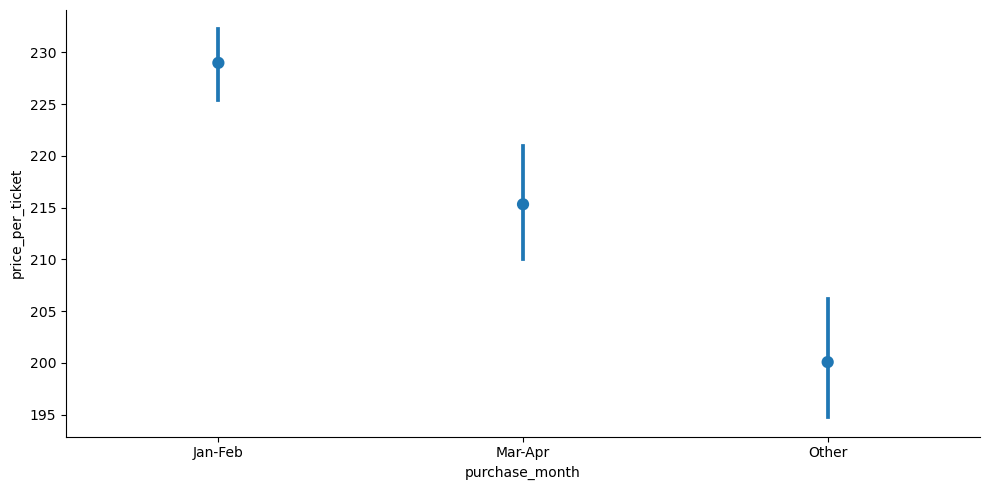

In [435]:
sns.catplot(data=df, x='purchase_month', y='price_per_ticket', kind='point', join=False, aspect=2)
plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


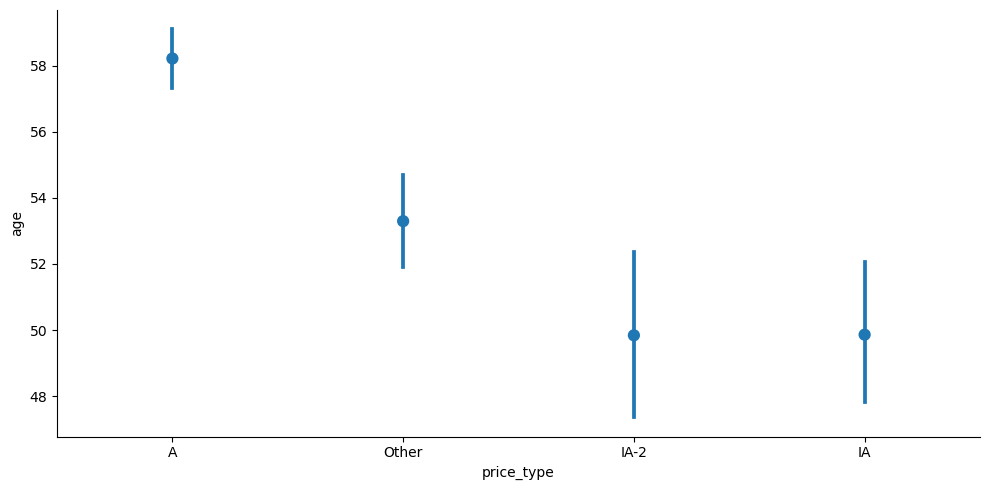

In [436]:
sns.catplot(data=df, x='price_type', y='age', kind='point', join=False, aspect=2)
plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


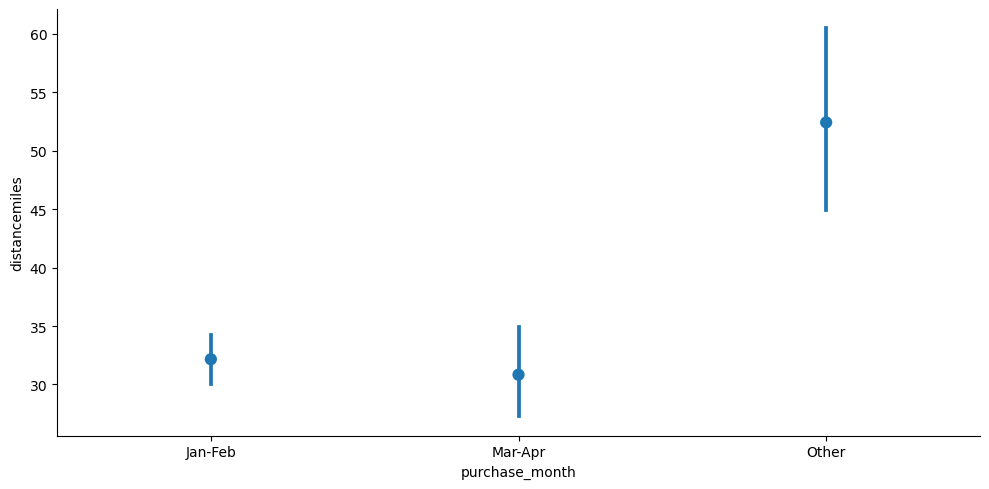

In [437]:
sns.catplot(data=df, x='purchase_month', y='distancemiles', kind='point', join=False, aspect=2)
plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


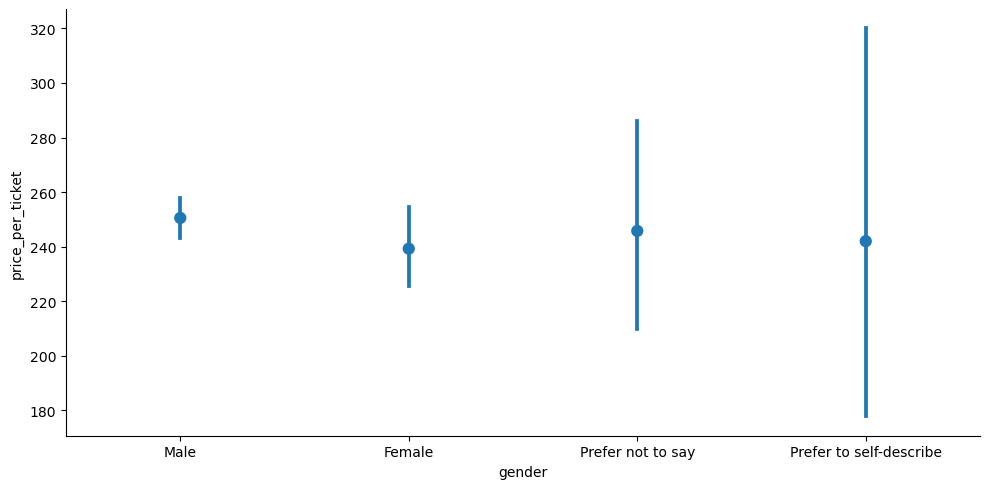

In [438]:
sns.catplot(data=df, x='gender', y='price_per_ticket', kind='point', join=False, aspect=2)
plt.show()

#### Visualize using Violin Plots

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


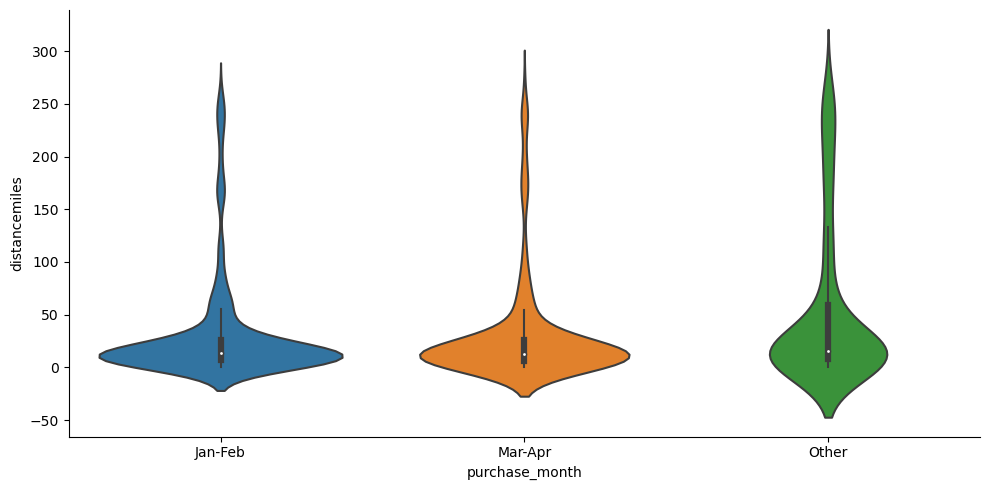

In [439]:
sns.catplot(data=df, x='purchase_month', y='distancemiles', kind='violin',
           showmeans=True, aspect=2)
plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


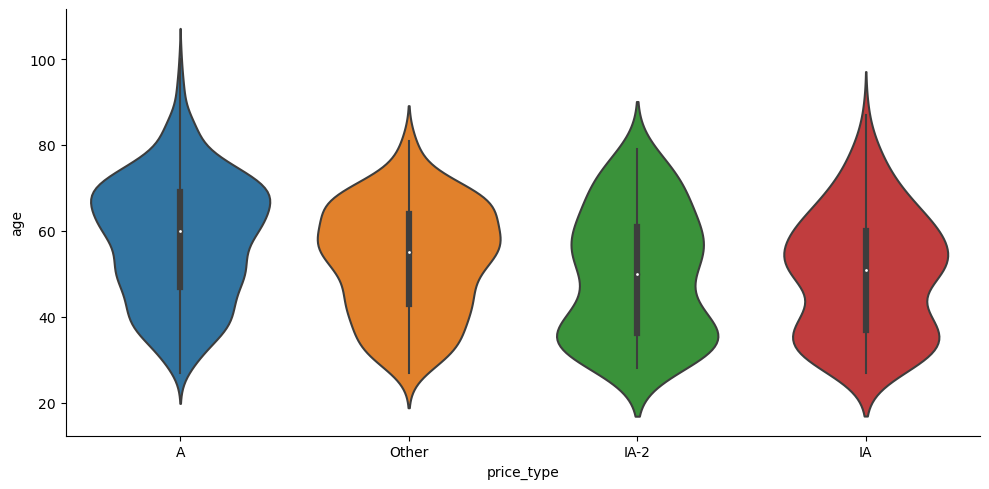

In [440]:
sns.catplot(data=df, x='price_type', y='age', kind='violin',
           showmeans=True, aspect=2)
plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


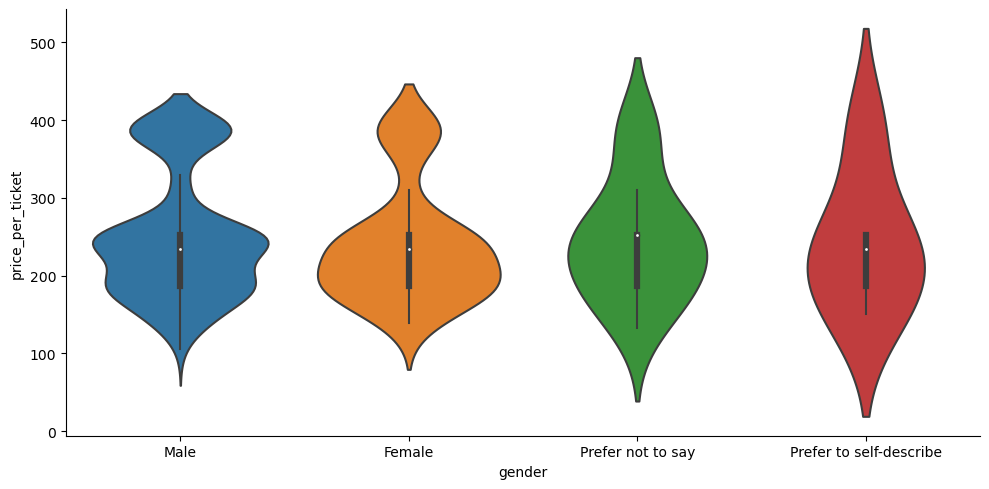

In [441]:
sns.catplot(data=df, x='gender', y='price_per_ticket', kind='violin',
           showmeans=True, aspect=2)
plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


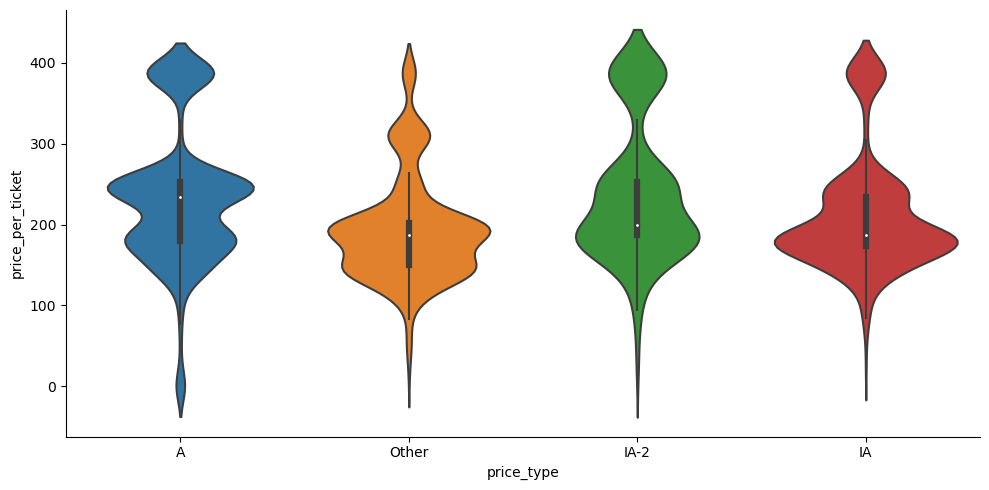

In [442]:
sns.catplot(data=df, x='price_type', y='price_per_ticket', kind='violin',
           showmeans=True, aspect=2)
plt.show()

## Missings

Now we will deal with the missings of our project. As we know, the sample size is greatly reduced if we drop all the missings which does not yield good data. 

We will find and see what needs to be dropped and how we will deal with these missings. 

Then we will visualize the variables to see if there are any drastic changes to the data

First lets see what the missings are:

In [443]:
df.isna().sum()

accountid                0
age                   1793
gender                2778
distancemiles            0
direction                0
peak_drivetime         402
offpeak_drivetime      364
season                   0
purchase_month           0
purchase_dow             0
price_type               0
price_level              0
ticket_count             0
price_per_ticket         0
return_next_season       0
dtype: int64

In [444]:
df.isna().mean().round(3)

accountid             0.000
age                   0.534
gender                0.827
distancemiles         0.000
direction             0.000
peak_drivetime        0.120
offpeak_drivetime     0.108
season                0.000
purchase_month        0.000
purchase_dow          0.000
price_type            0.000
price_level           0.000
ticket_count          0.000
price_per_ticket      0.000
return_next_season    0.000
dtype: float64

* age missings: 1793, 53%
* gender missings: 2778, 83%
* peak_drivetime: 402, 12%
* offpeak_drivetime: 364, 11%

Since gender has the most missings we will figure out how to deal with that category first

In [445]:
df.gender.nunique(dropna=False)

5

In [446]:
df.gender.value_counts(dropna=False)

gender
NaN                        2778
Male                        464
Female                      100
Prefer not to say            13
Prefer to self-describe       5
Name: count, dtype: int64

In [447]:
df.gender.value_counts(dropna=False, normalize=True)

gender
NaN                        0.826786
Male                       0.138095
Female                     0.029762
Prefer not to say          0.003869
Prefer to self-describe    0.001488
Name: proportion, dtype: float64

About 83% of the gender category are filled with missing entries!



In [448]:
df.gender.value_counts(normalize=True)

gender
Male                       0.797251
Female                     0.171821
Prefer not to say          0.022337
Prefer to self-describe    0.008591
Name: proportion, dtype: float64

In [449]:
df.gender.fillna(value='UNKNOWN')

0       UNKNOWN
1       UNKNOWN
2          Male
3       UNKNOWN
4       UNKNOWN
         ...   
3355    UNKNOWN
3356    UNKNOWN
3357    UNKNOWN
3358    UNKNOWN
3359    UNKNOWN
Name: gender, Length: 3360, dtype: object

In [450]:
df.gender.fillna(value='(MISSING)')

0       (MISSING)
1       (MISSING)
2            Male
3       (MISSING)
4       (MISSING)
          ...    
3355    (MISSING)
3356    (MISSING)
3357    (MISSING)
3358    (MISSING)
3359    (MISSING)
Name: gender, Length: 3360, dtype: object

In [451]:
df.gender.fillna(value='(MISSING)').value_counts(dropna=True)

gender
(MISSING)                  2778
Male                        464
Female                      100
Prefer not to say            13
Prefer to self-describe       5
Name: count, dtype: int64

In [452]:
df.gender.fillna(value='(MISSING)').value_counts(dropna=True, normalize=True)

gender
(MISSING)                  0.826786
Male                       0.138095
Female                     0.029762
Prefer not to say          0.003869
Prefer to self-describe    0.001488
Name: proportion, dtype: float64

After creating a value named `MISSING` we can now make a copy of the data frame to work with

In [453]:
df_copy = df.copy()

In [454]:
df_copy.gender.fillna(value='(MISSING)', inplace=True)

In [455]:
df_copy.gender.value_counts()

gender
(MISSING)                  2778
Male                        464
Female                      100
Prefer not to say            13
Prefer to self-describe       5
Name: count, dtype: int64

Now lets provide additional EDA to visualize and compare the results from the original data to the updated missing values

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


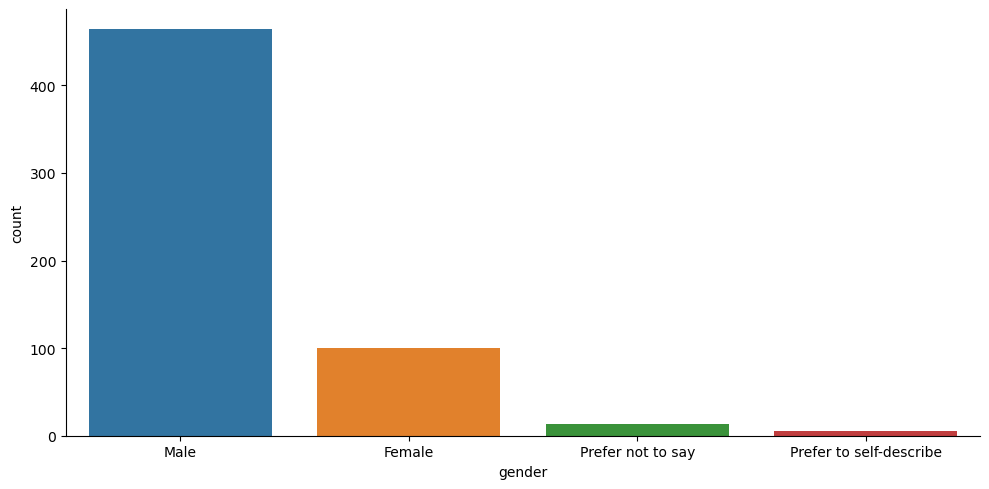

In [456]:
sns.catplot(data=df, x='gender', kind='count', aspect=2)
plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


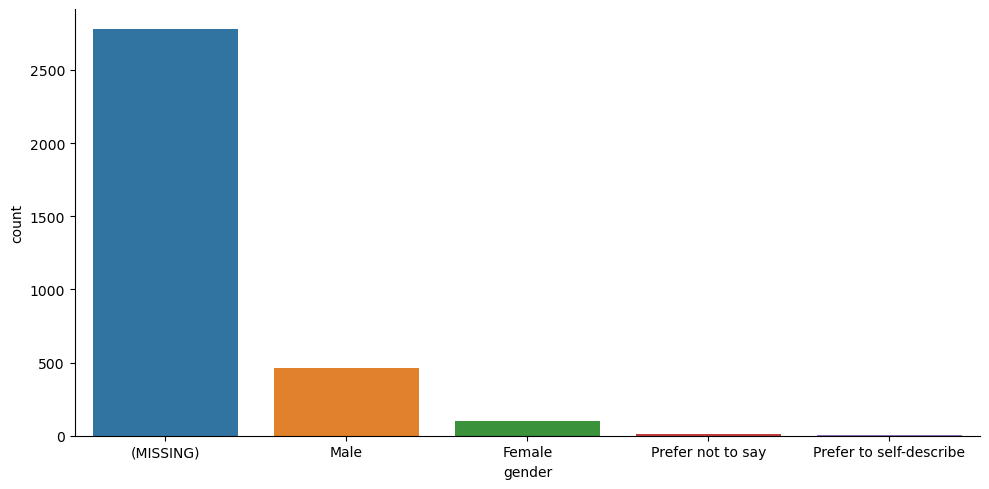

In [457]:
sns.catplot(data=df_copy, x='gender', kind='count', aspect=2)
plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


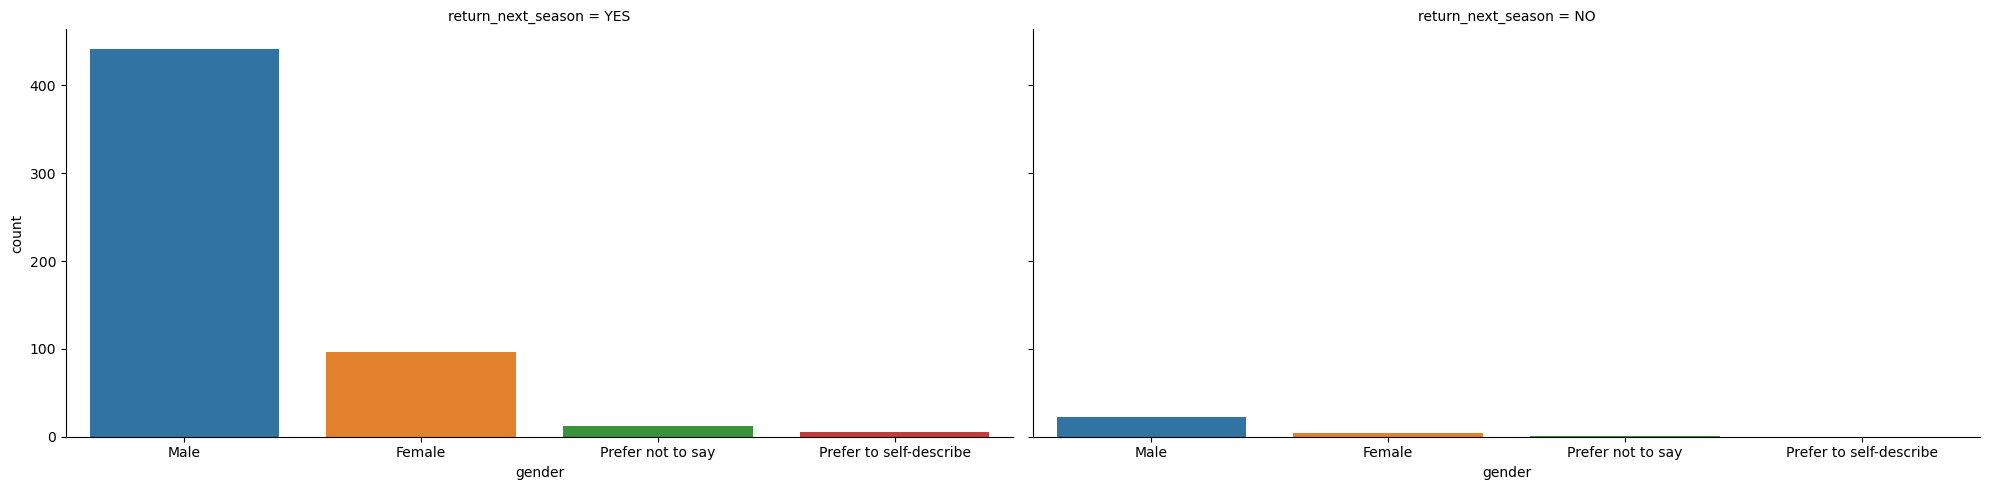

In [458]:
sns.catplot(data = df, x='gender', col='return_next_season', kind='count', aspect=2)

plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


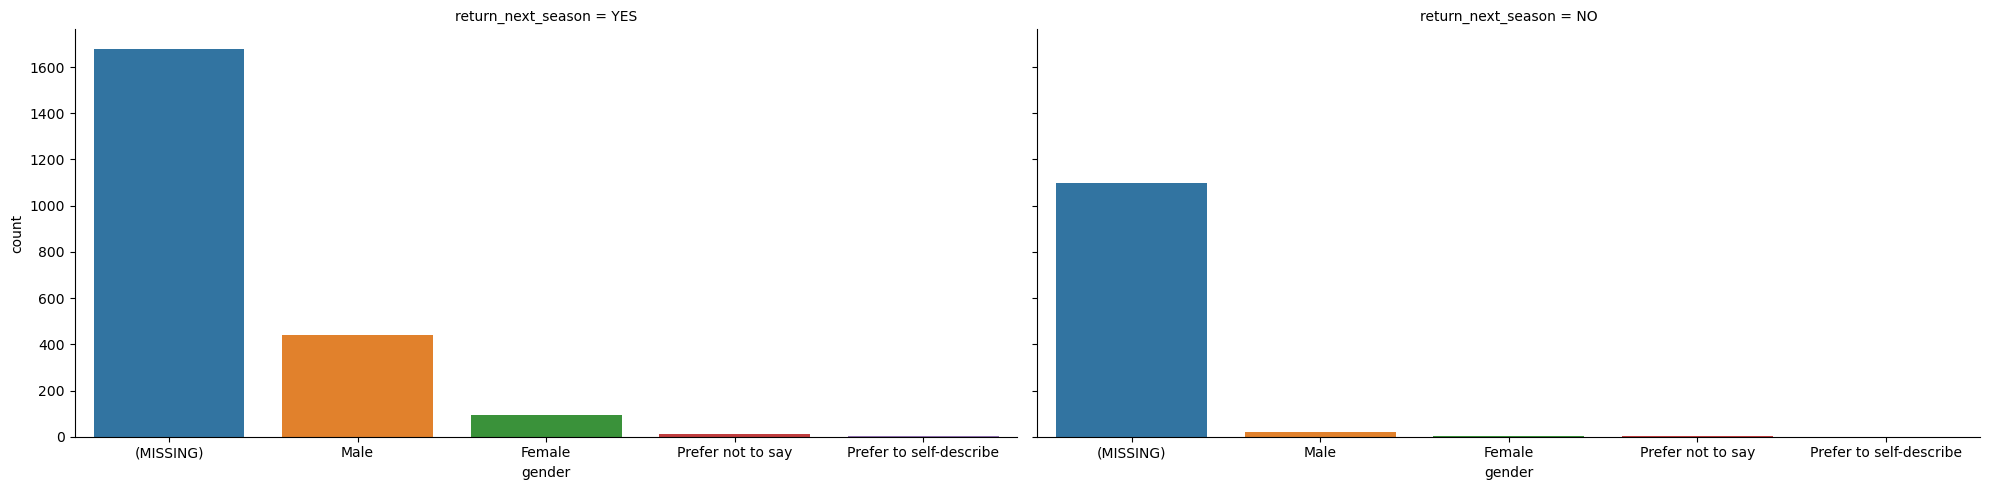

In [459]:
sns.catplot(data = df_copy, x='gender', col='return_next_season', kind='count', aspect=2)

plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


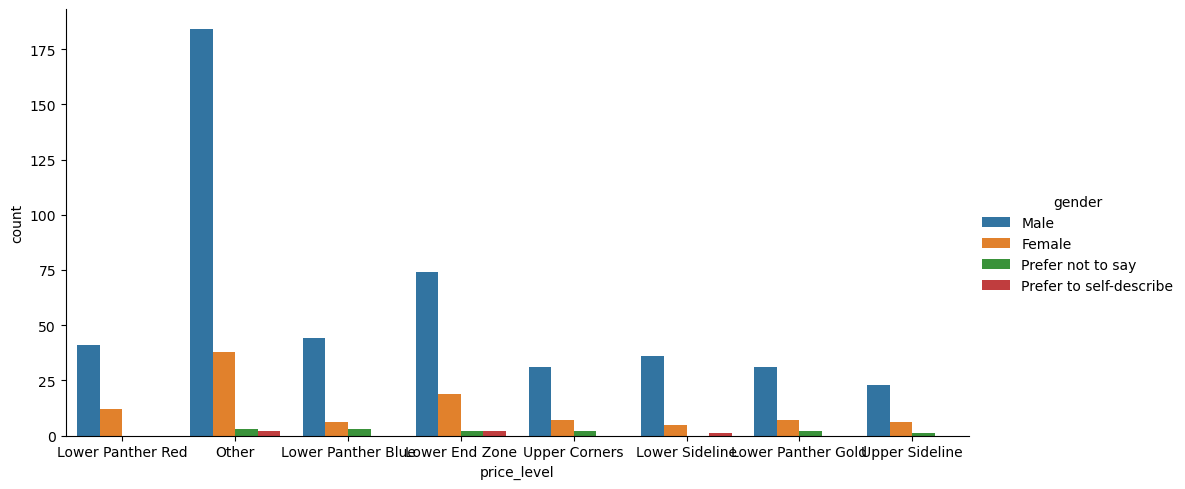

In [460]:
sns.catplot( data = df, x='price_level', hue='gender', kind='count',aspect=2 )

plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


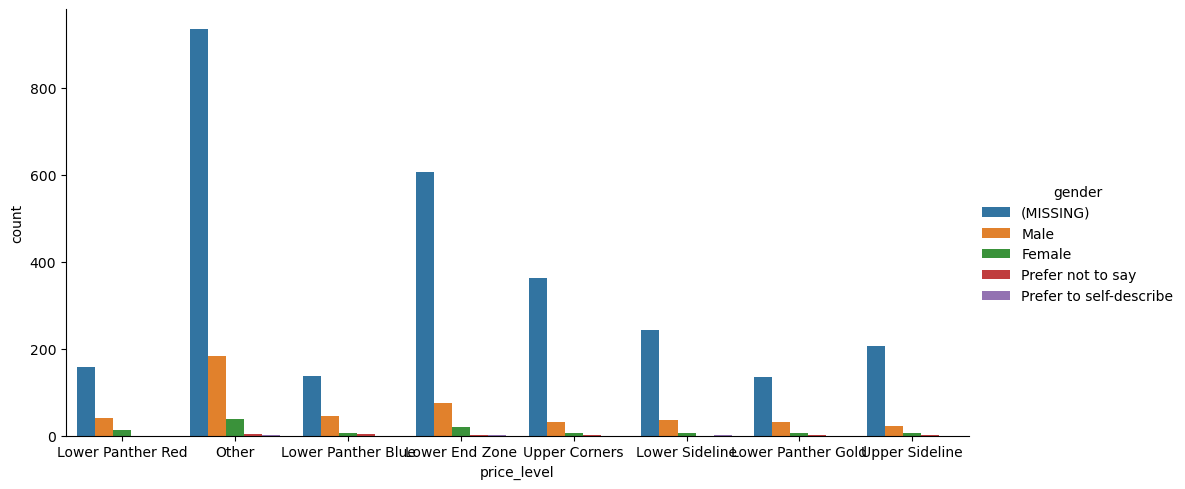

In [461]:
sns.catplot( data = df_copy, x='price_level', hue='gender', kind='count',aspect=2 )

plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


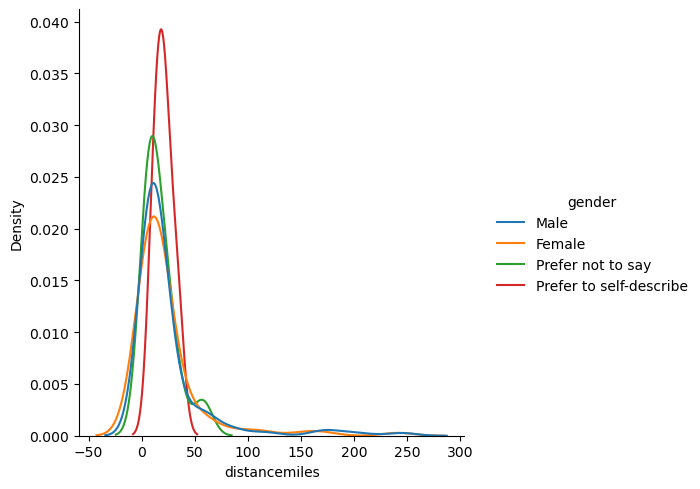

In [462]:
sns.displot(data=df, x='distancemiles', 
            hue='gender', 
            kind='kde',
           common_norm=False,)
plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


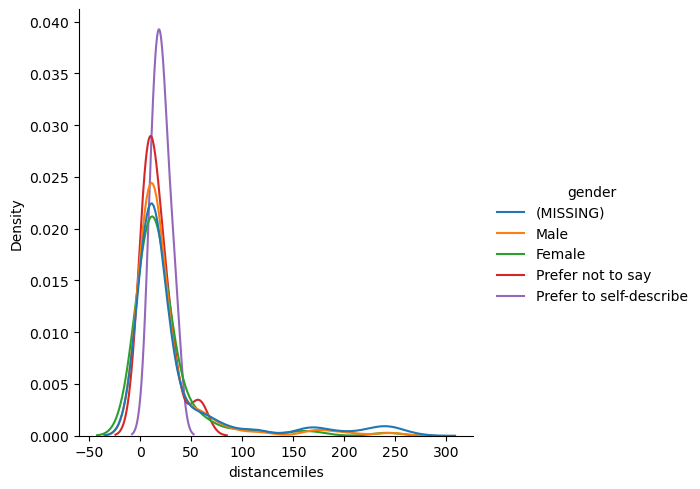

In [463]:
sns.displot(data=df_copy, x='distancemiles', 
            hue='gender', 
            kind='kde',
           common_norm=False,)
plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


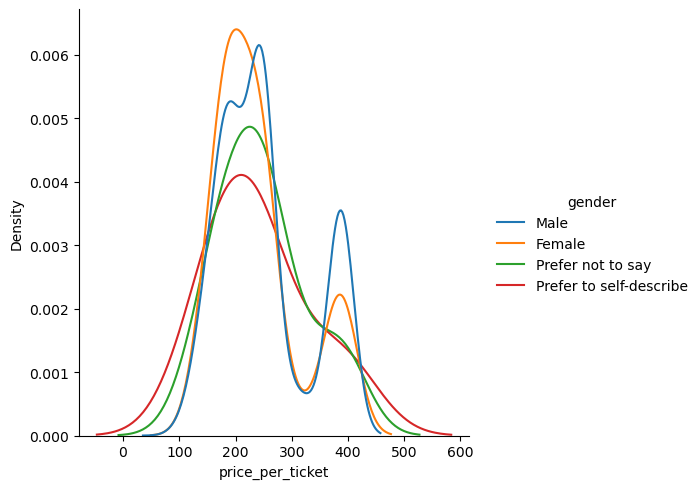

In [464]:
sns.displot(data=df, x='price_per_ticket', 
            hue='gender', 
            kind='kde',
           common_norm=False,)
plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


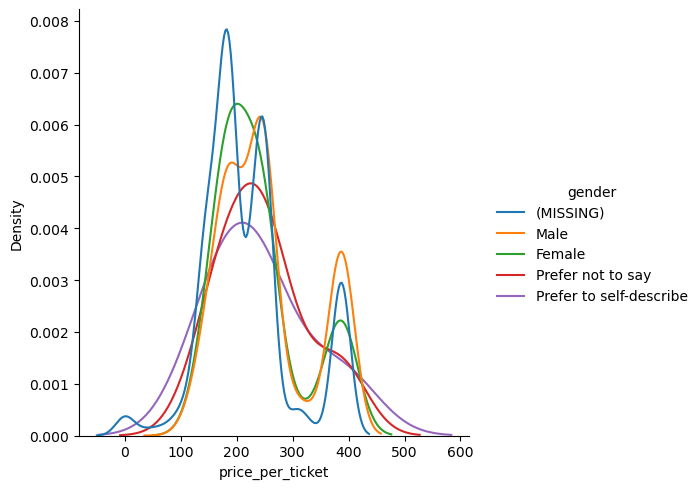

In [465]:
sns.displot(data=df_copy, x='price_per_ticket', 
            hue='gender', 
            kind='kde',
           common_norm=False,)
plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


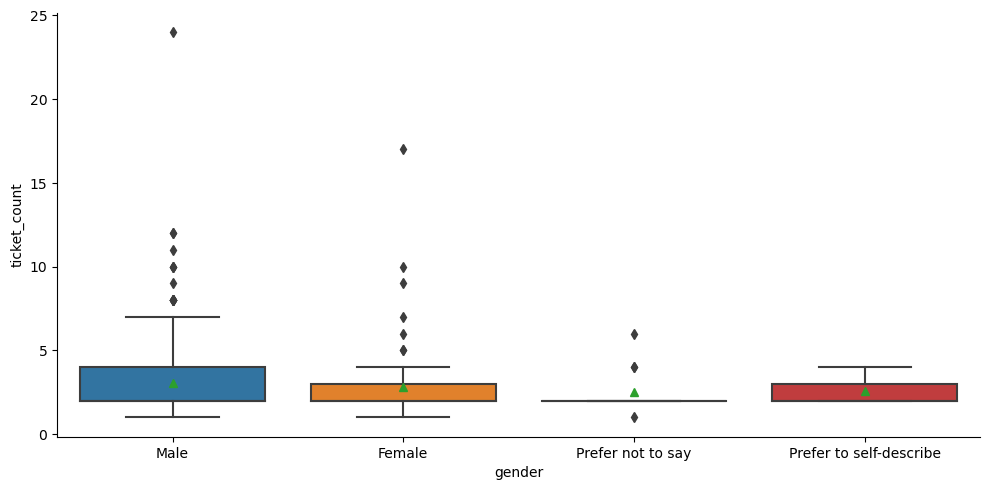

In [466]:
sns.catplot(data=df, x='gender', y='ticket_count', kind='box',
           showmeans=True, aspect=2)
plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


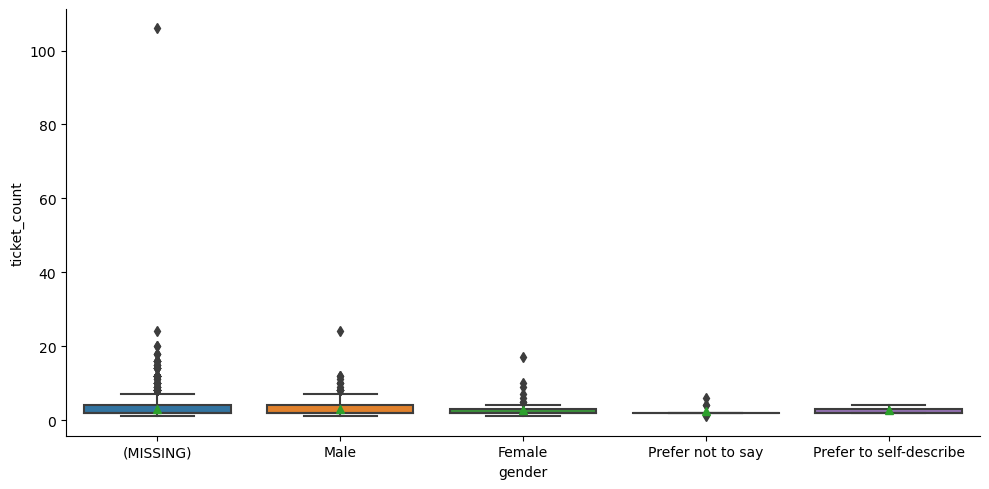

In [467]:
sns.catplot(data=df_copy, x='gender', y='ticket_count', kind='box',
           showmeans=True, aspect=2)
plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


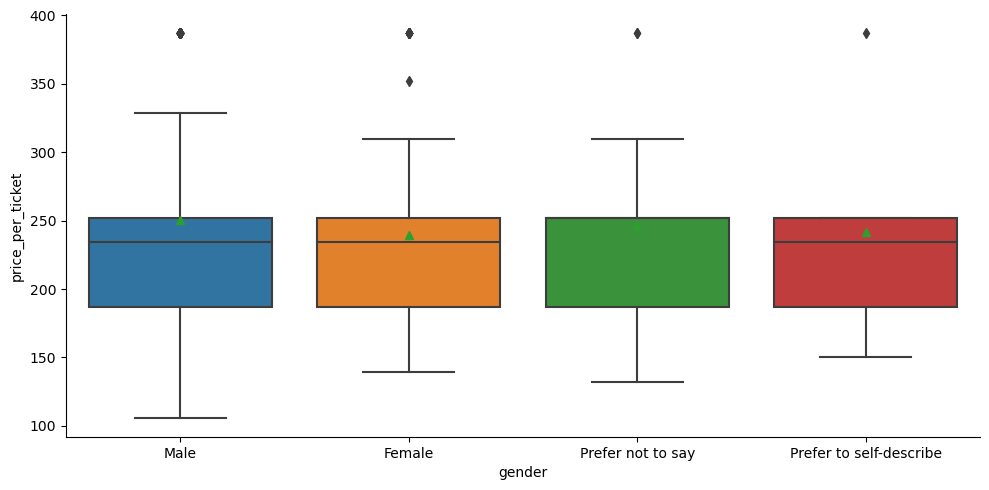

In [468]:
sns.catplot(data=df, x='gender', y='price_per_ticket', kind='box',
           showmeans=True, aspect=2)
plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


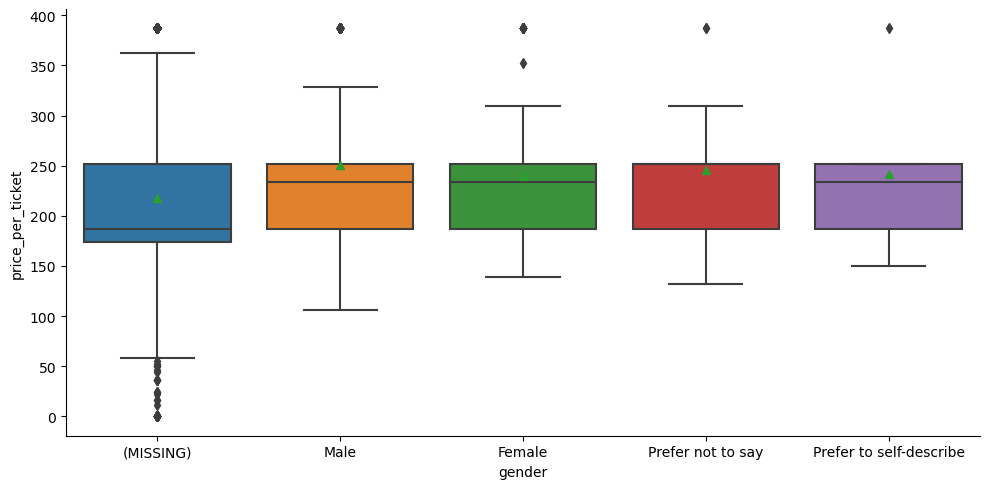

In [469]:
sns.catplot(data=df_copy, x='gender', y='price_per_ticket', kind='box',
           showmeans=True, aspect=2)
plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


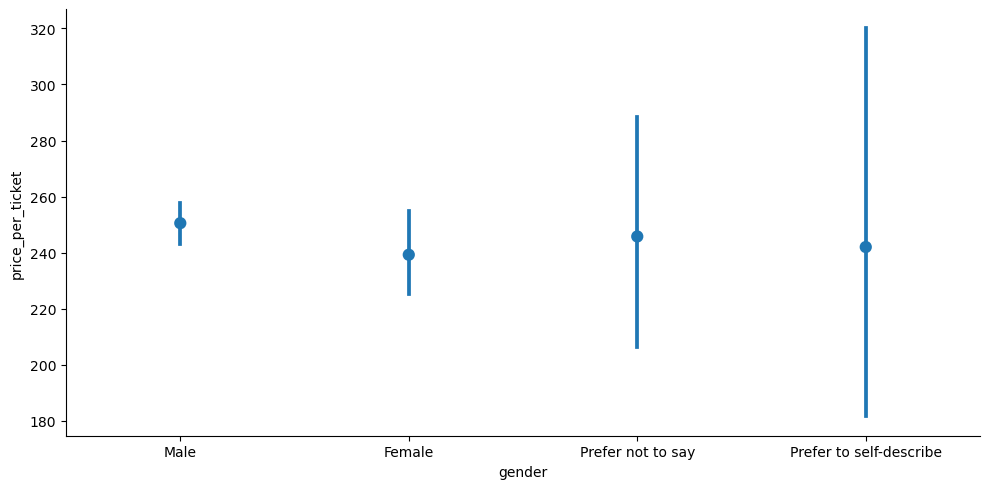

In [470]:
sns.catplot(data=df, x='gender', y='price_per_ticket', kind='point', join=False, aspect=2)
plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


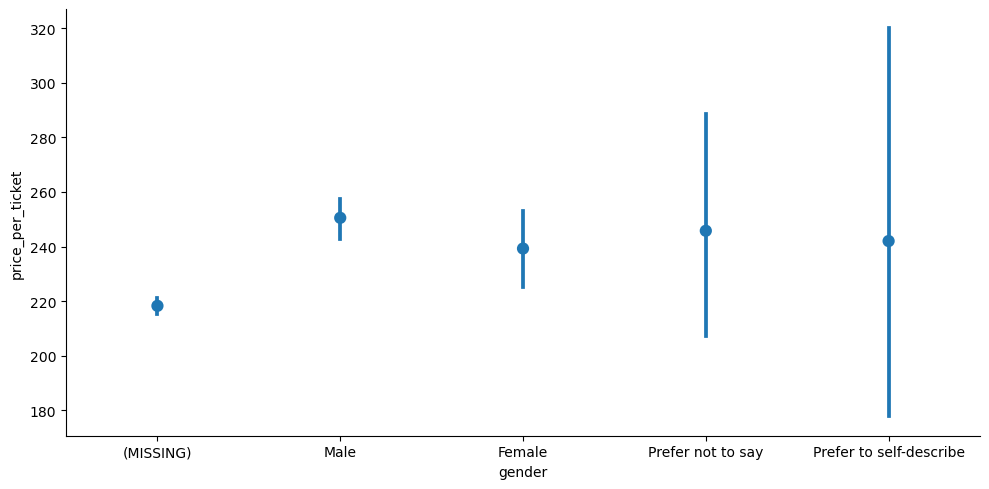

In [471]:
sns.catplot(data=df_copy, x='gender', y='price_per_ticket', kind='point', join=False, aspect=2)
plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


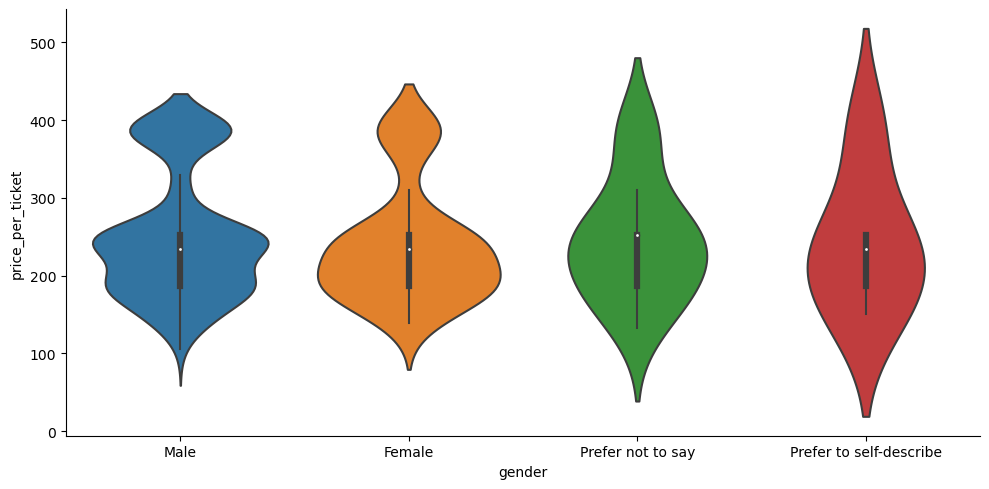

In [472]:
sns.catplot(data=df, x='gender', y='price_per_ticket', kind='violin',
           showmeans=True, aspect=2)
plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


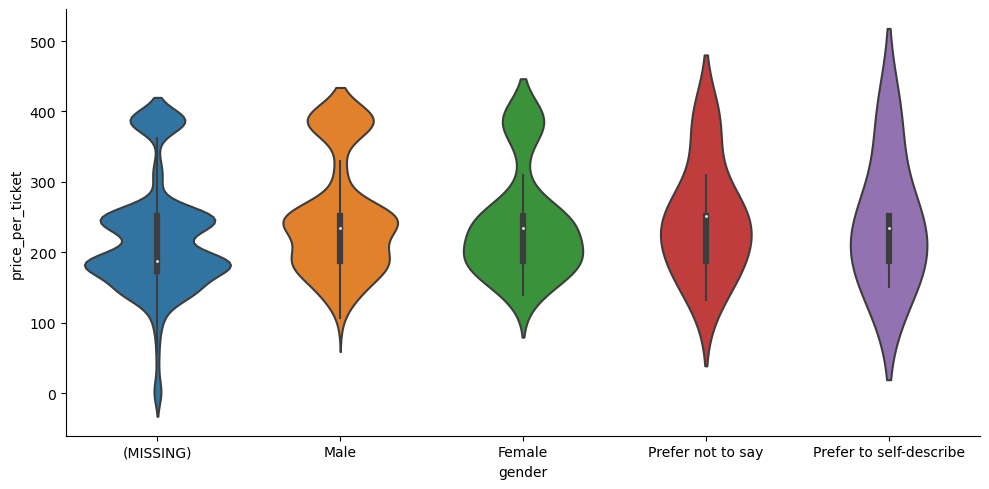

In [473]:
sns.catplot(data=df_copy, x='gender', y='price_per_ticket', kind='violin',
           showmeans=True, aspect=2)
plt.show()

## Dropping Columns

Now we will deal with missings for offpeak_drivetime and peak_drivetime. Since there are 2 variables we will use the strategy of ignoring variables due to other variables

Since the description claims if the mailing address of the attendee is greater than 120 miles we will have missings. So we need to also include distancemiles to filter out any missings we encounter as well

In [474]:
df.loc[:, ['peak_drivetime', 'offpeak_drivetime']].isna().sum()

peak_drivetime       402
offpeak_drivetime    364
dtype: int64

In [475]:
df.loc[: , ['distancemiles', 'peak_drivetime', 'offpeak_drivetime']].isna().sum()

distancemiles          0
peak_drivetime       402
offpeak_drivetime    364
dtype: int64

In [476]:
np.mean( df.distancemiles > 120 ).round(3)

0.078

In [477]:
df.loc[: , ['distancemiles', 'peak_drivetime', 'offpeak_drivetime']].isna().mean().round(3)

distancemiles        0.000
peak_drivetime       0.120
offpeak_drivetime    0.108
dtype: float64

Not all _drivetime MISSINGS are associated with the distancemiles greater than 120.

In [478]:
df.loc[: , ['distancemiles', 'peak_drivetime', 'offpeak_drivetime']].isna().mean().round(3)

distancemiles        0.000
peak_drivetime       0.120
offpeak_drivetime    0.108
dtype: float64

In [479]:
df.loc[ df.peak_drivetime.isna() , ['distancemiles', 'peak_drivetime', 'offpeak_drivetime']]

distancemiles  peak_drivetime  offpeak_drivetime
20       212.846940             NaN                NaN
24       160.924230             NaN                NaN
25       165.636302             NaN                NaN
26       189.125498             NaN                NaN
31       247.660537             NaN                NaN
...             ...             ...                ...
3289     242.507836             NaN                NaN
3307     180.243978             NaN                NaN
3316     100.377034             NaN                NaN
3318      99.219372             NaN                NaN
3331     167.365256             NaN                NaN

[402 rows x 3 columns]

In [480]:
df.loc[ (df.peak_drivetime.isna()) & (df.distancemiles<120) , ['distancemiles', 'peak_drivetime', 'offpeak_drivetime']]

distancemiles  peak_drivetime  offpeak_drivetime
52        55.434331             NaN             107.51
85        84.018853             NaN                NaN
102       85.891991             NaN                NaN
183      115.526226             NaN                NaN
197       85.791273             NaN             115.47
...             ...             ...                ...
3209      65.926630             NaN             109.08
3216     108.870907             NaN             119.74
3242     111.801980             NaN                NaN
3316     100.377034             NaN                NaN
3318      99.219372             NaN                NaN

[140 rows x 3 columns]

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


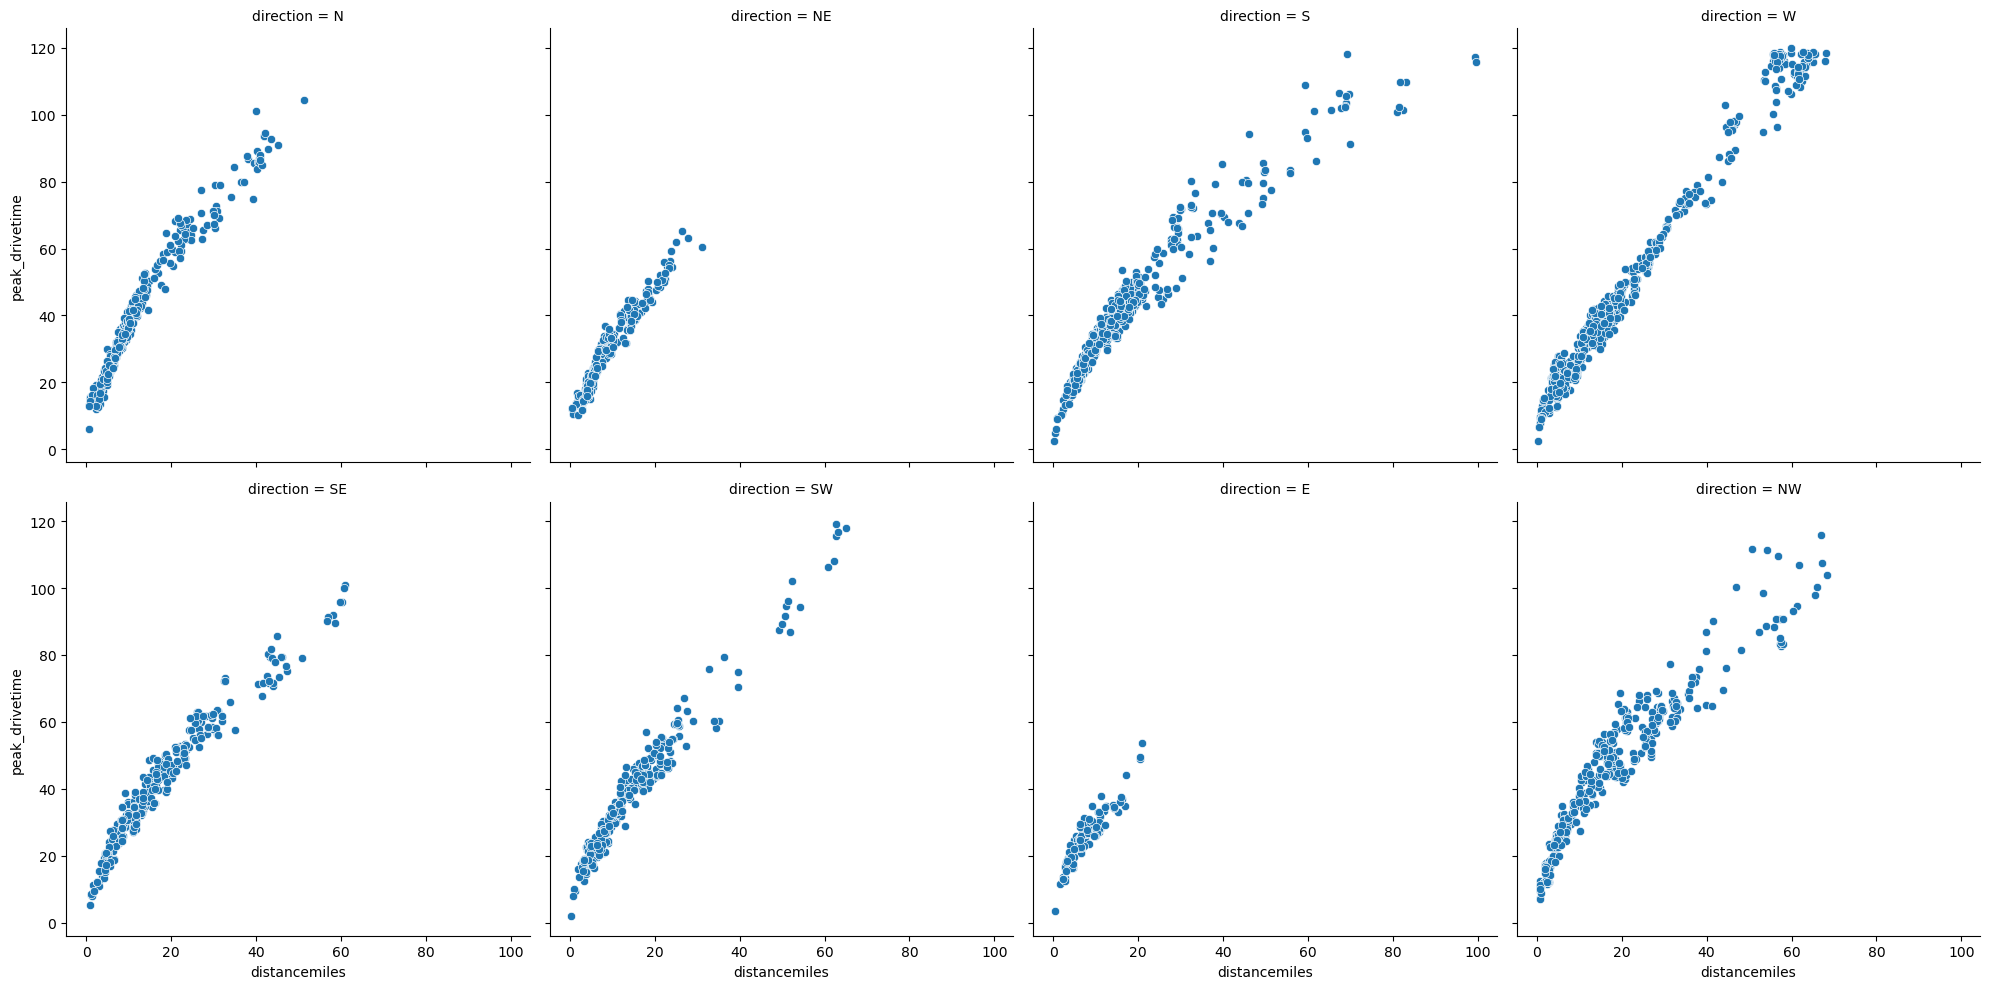

In [481]:
sns.relplot(data = df, x='distancemiles', y='peak_drivetime', col='direction', col_wrap=4, kind='scatter', aspect = 1)

plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


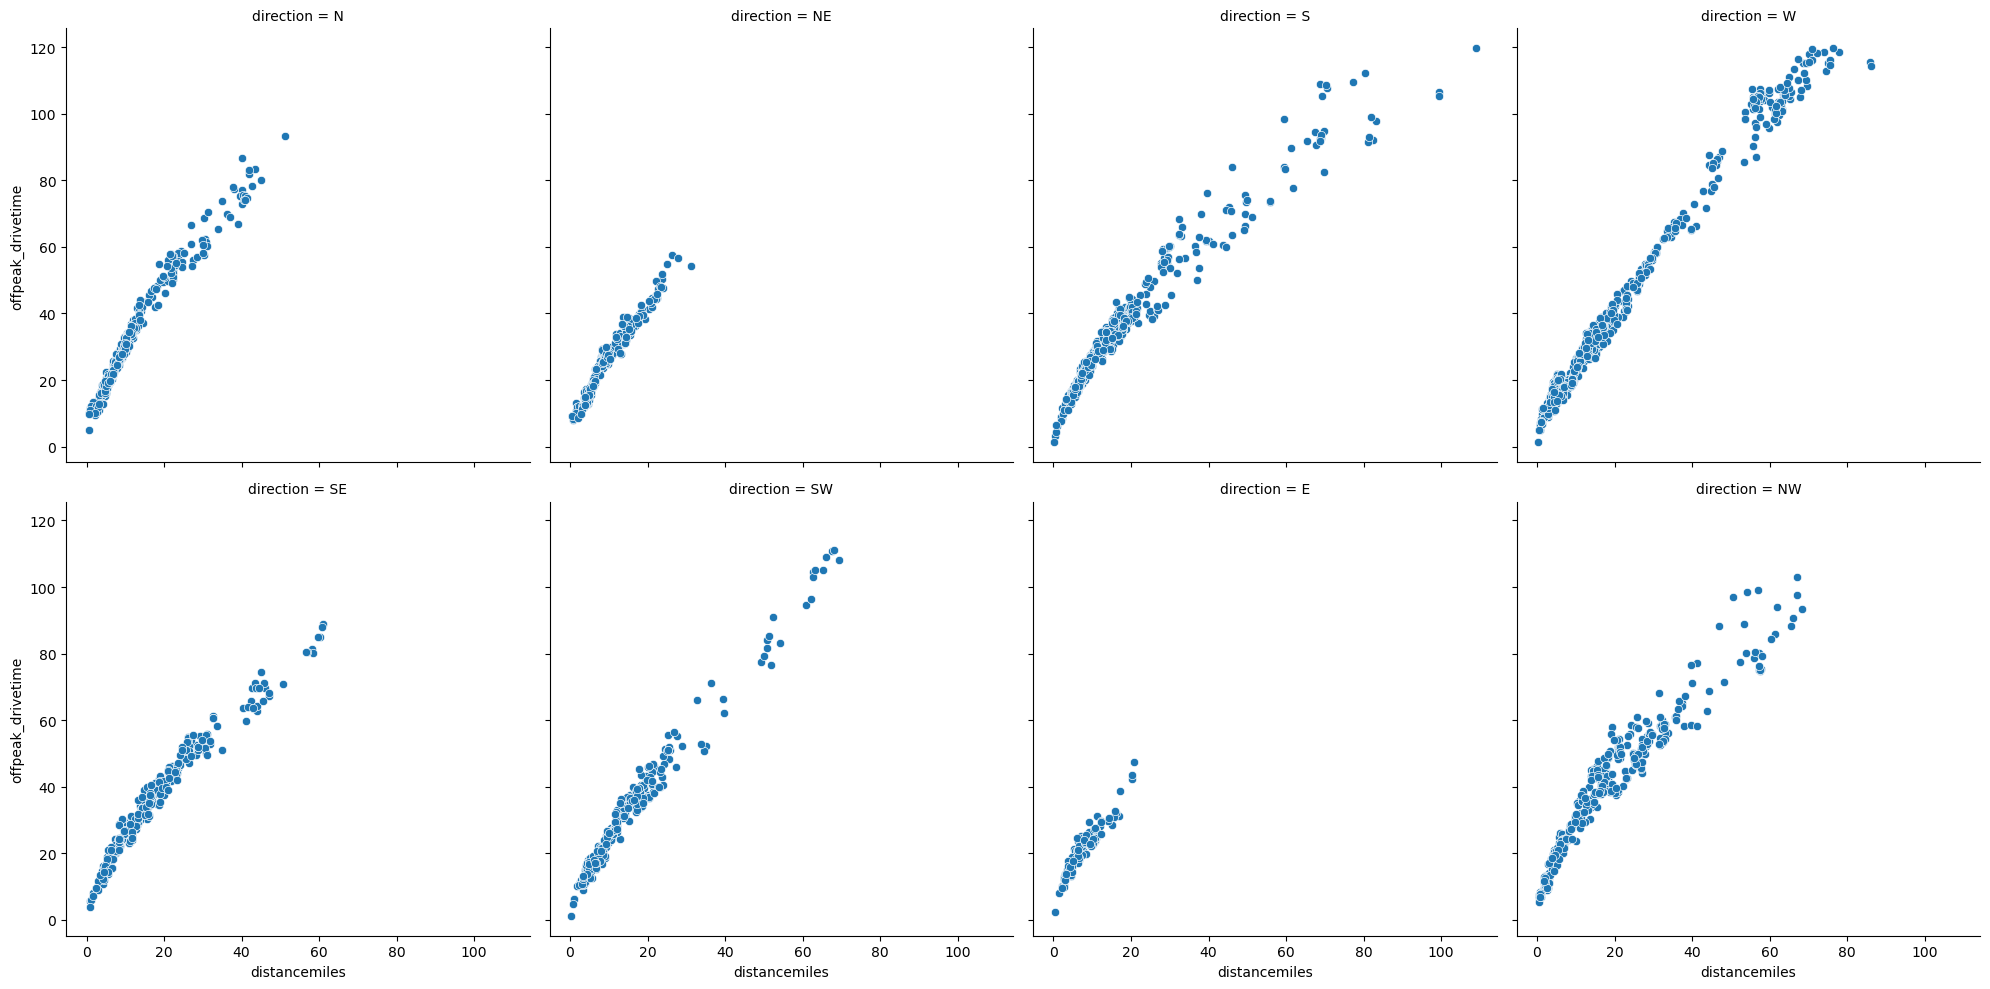

In [482]:
sns.relplot(data = df, x='distancemiles', y='offpeak_drivetime', col='direction', col_wrap=4, kind='scatter', aspect = 1)

plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


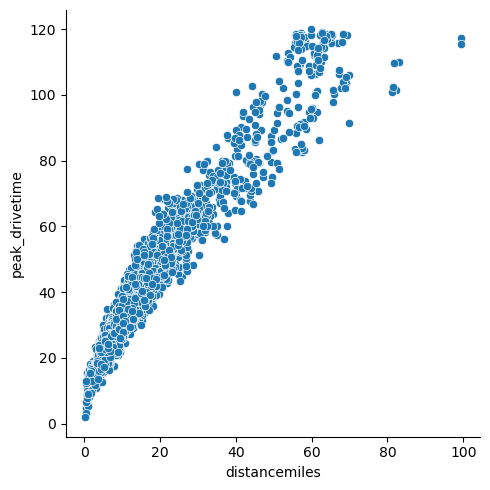

In [483]:
sns.relplot(data = df, x='distancemiles', y='peak_drivetime', kind='scatter')

plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


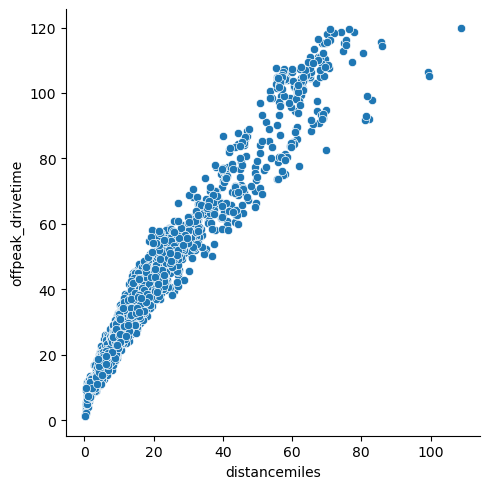

In [484]:
sns.relplot(data = df, x='distancemiles', y='offpeak_drivetime', kind='scatter')

plt.show()

Based on these visualizations that I have provided, we can see that distancemiles AND direction closely correlate to the drivetime columns. Therefore we will we be ignoring these variables and will not include them in our predictive models. This way we can only focus on the last variable that has missings which would be age



Now we will take a look at age and deal with its missings. We can approach this with the strategy of converting numeric to a categorical

In [485]:
df.age.isna().mean()

0.5336309523809524

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


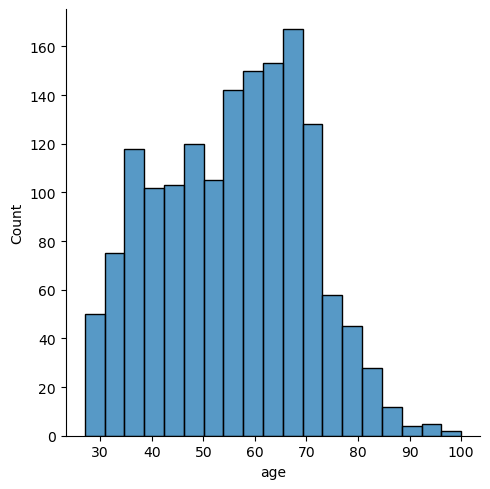

In [486]:
sns.displot(data = df, x='age', kind='hist')

plt.show()

In [487]:
pd.cut( df.age, bins=2, include_lowest=True )

0                  NaN
1                  NaN
2        (63.5, 100.0]
3       (26.926, 63.5]
4                  NaN
             ...      
3355               NaN
3356     (63.5, 100.0]
3357    (26.926, 63.5]
3358     (63.5, 100.0]
3359    (26.926, 63.5]
Name: age, Length: 3360, dtype: category
Categories (2, interval[float64, right]): [(26.926, 63.5] < (63.5, 100.0]]

In [488]:
pd.cut( df.age, bins=2, include_lowest=True, ordered=False, labels=['A', 'B'])

0       NaN
1       NaN
2         B
3         A
4       NaN
       ... 
3355    NaN
3356      B
3357      A
3358      B
3359      A
Name: age, Length: 3360, dtype: category
Categories (2, object): ['A', 'B']

In [489]:
df_copy['bin_age'] = pd.cut( df.age, bins=2, include_lowest=True, ordered=False, labels=['A', 'B'])

In [490]:
df_copy.bin_age.value_counts(dropna=False)

bin_age
NaN    1793
A      1045
B       522
Name: count, dtype: int64

In [491]:
df_copy.bin_age.value_counts(dropna=False, normalize=True)

bin_age
NaN    0.533631
A      0.311012
B      0.155357
Name: proportion, dtype: float64

In [492]:
df_copy.bin_age = df_copy.bin_age.astype('object')

In [493]:
df_copy.bin_age.dtype

dtype('O')

In [494]:
df_copy.bin_age.fillna(value='(MISSING)', inplace=True)

In [495]:
df_copy.bin_age.isna().sum()

0

In [496]:
df_copy.bin_age.value_counts(dropna=False)

bin_age
(MISSING)    1793
A            1045
B             522
Name: count, dtype: int64

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


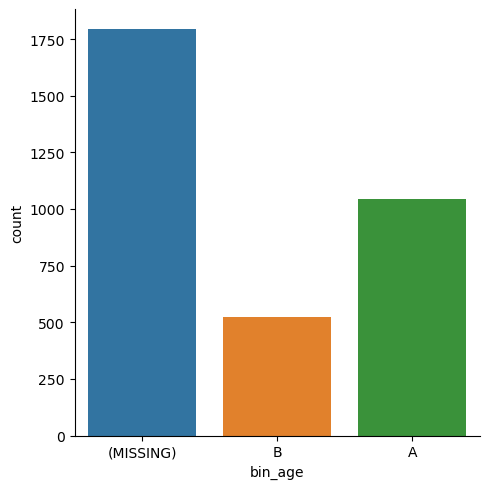

In [497]:
sns.catplot(data = df_copy, x='bin_age', kind='count')

plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


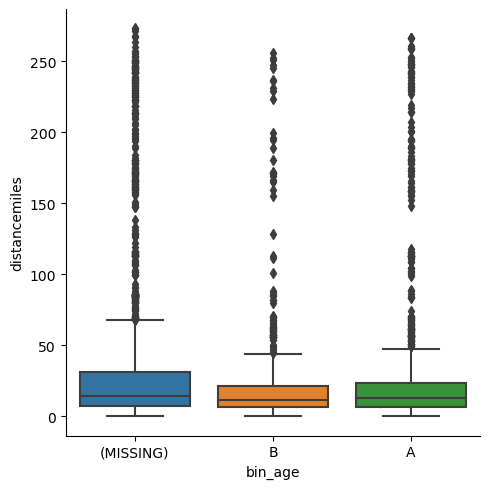

In [498]:
sns.catplot(data = df_copy, x='bin_age', y='distancemiles', kind='box')

plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


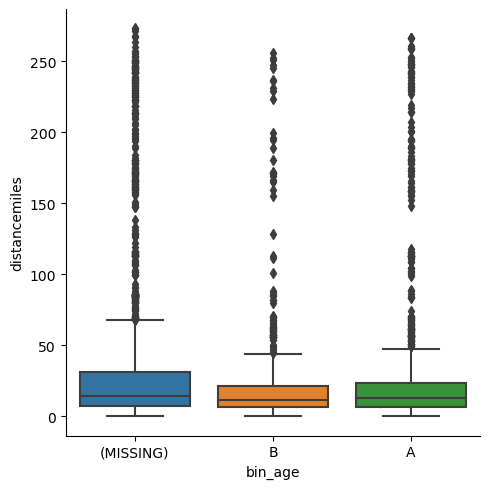

In [499]:
sns.catplot(data = df_copy, x='bin_age', y='distancemiles', kind='box')

plt.show()

Now we will explore combinations or bin_age with other non_numeric variables and visualize the outcome

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


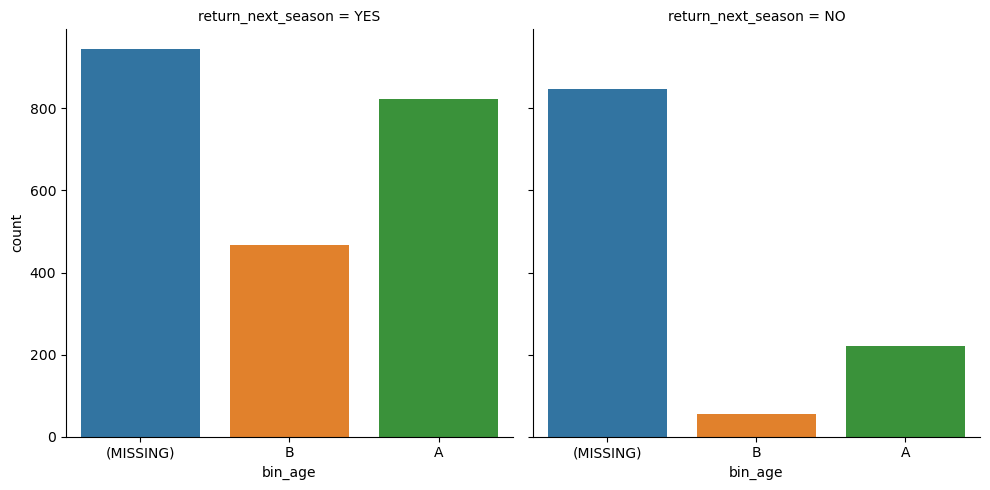

In [500]:
sns.catplot(data = df_copy, x='bin_age', col = 'return_next_season', kind='count')

plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


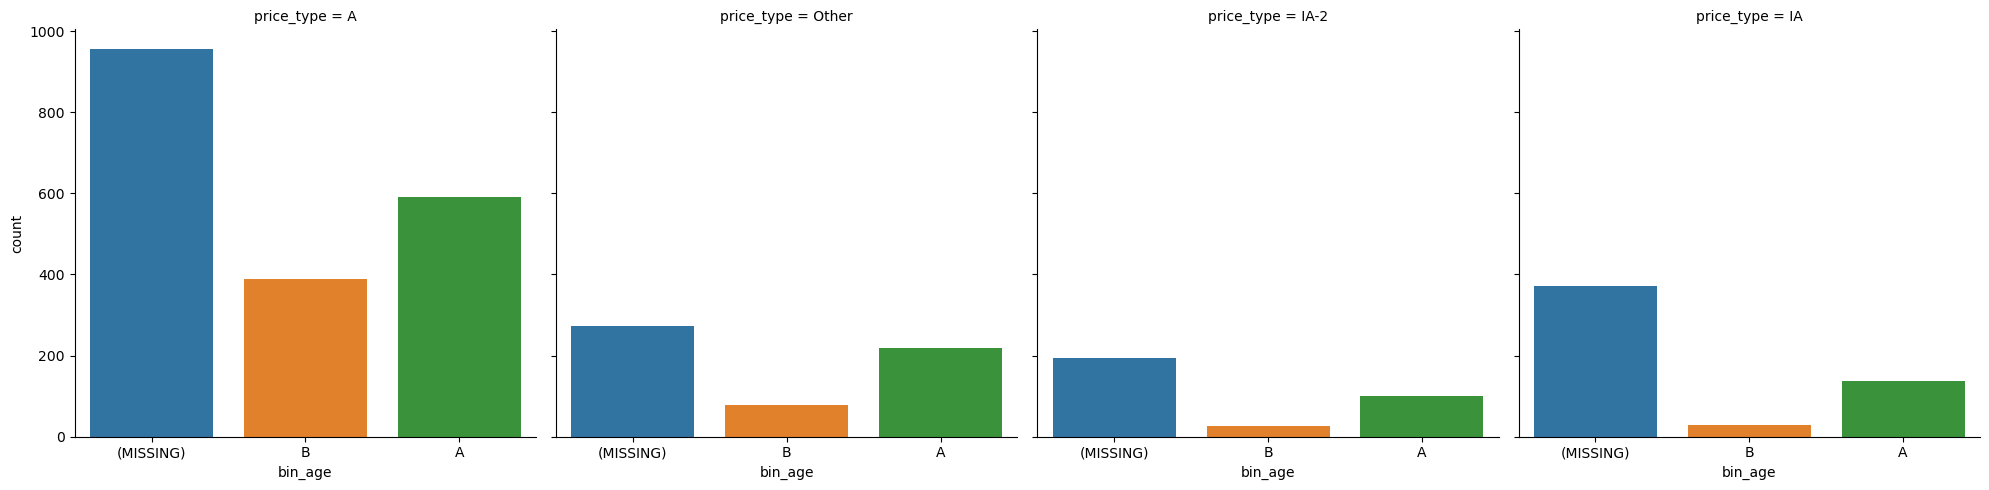

In [501]:
sns.catplot(data = df_copy, x='bin_age', col = 'price_type', kind='count')

plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


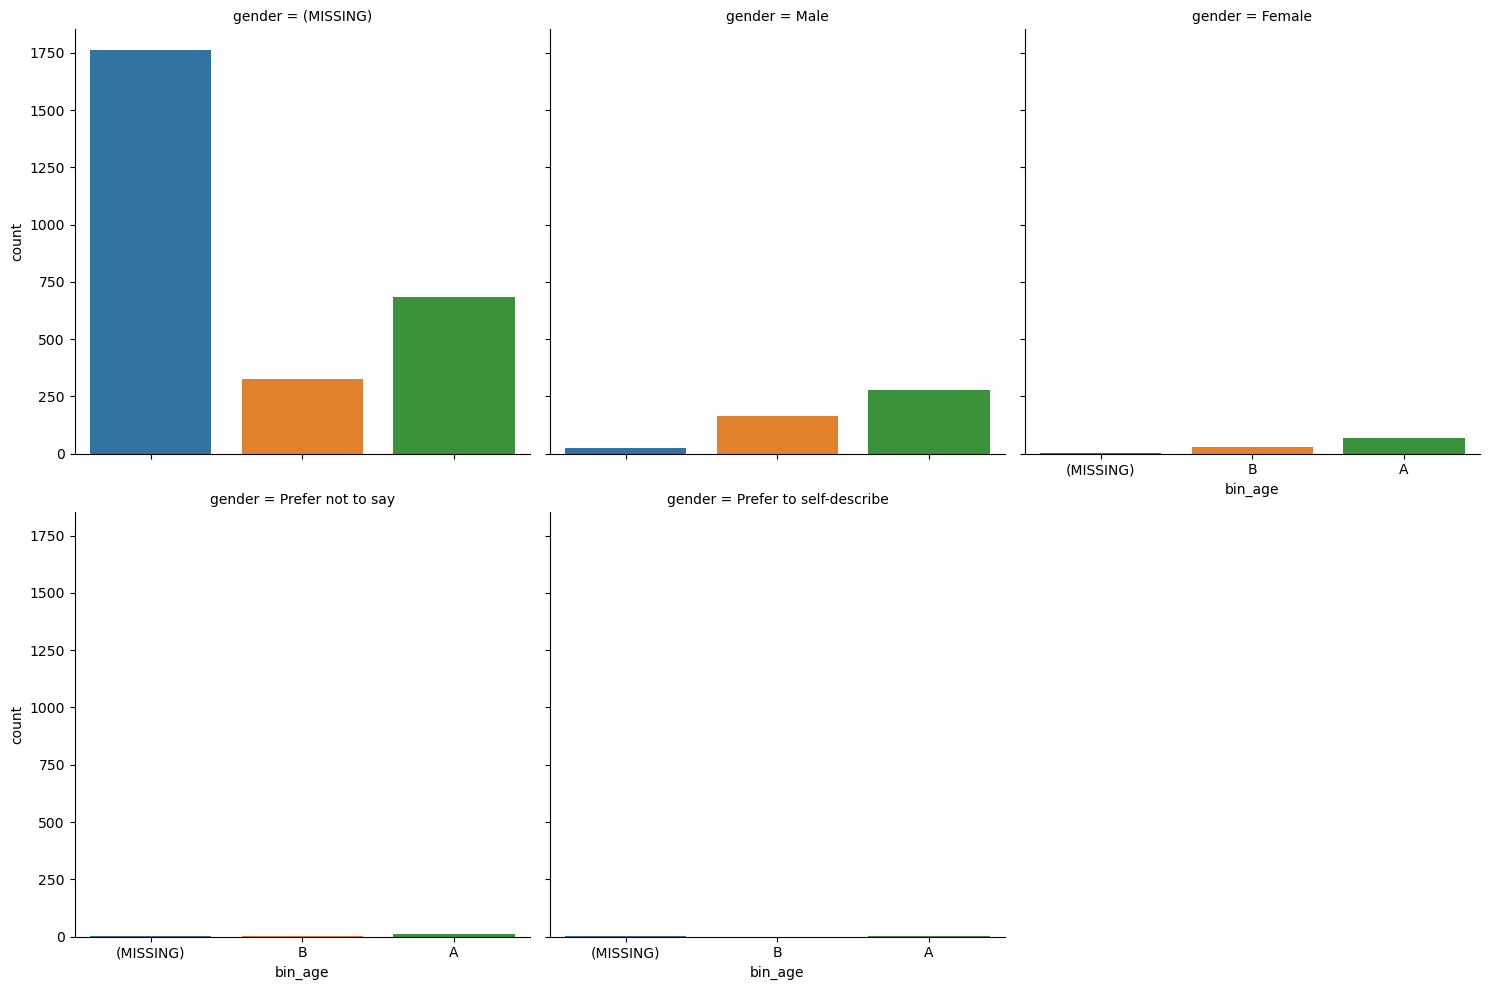

In [502]:
sns.catplot(data = df_copy, x='bin_age', col = 'gender', kind='count', col_wrap = 3)

plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


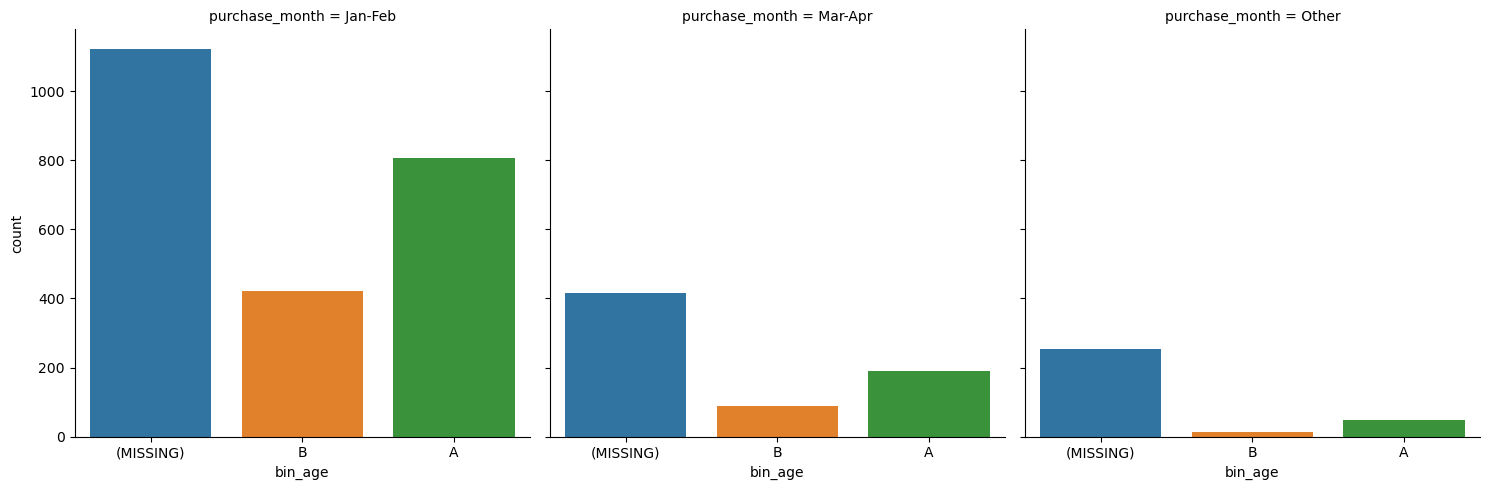

In [503]:
sns.catplot(data = df_copy, x='bin_age', col = 'purchase_month', kind='count')

plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


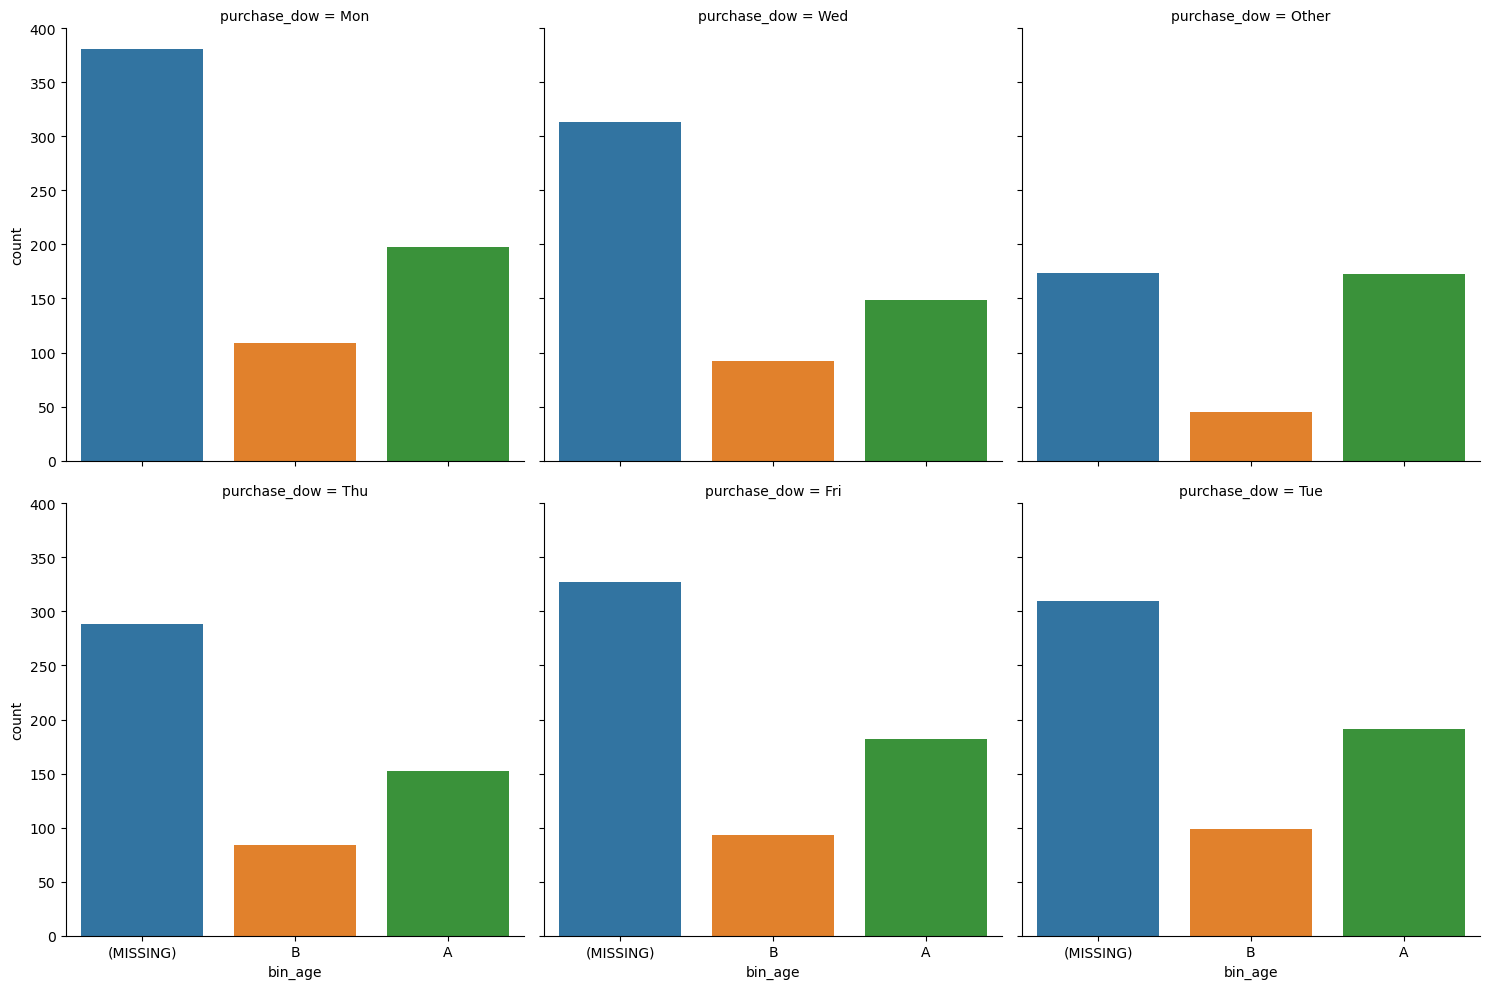

In [504]:
sns.catplot(data = df_copy, x='bin_age', col = 'purchase_dow', kind='count', col_wrap = 3)

plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


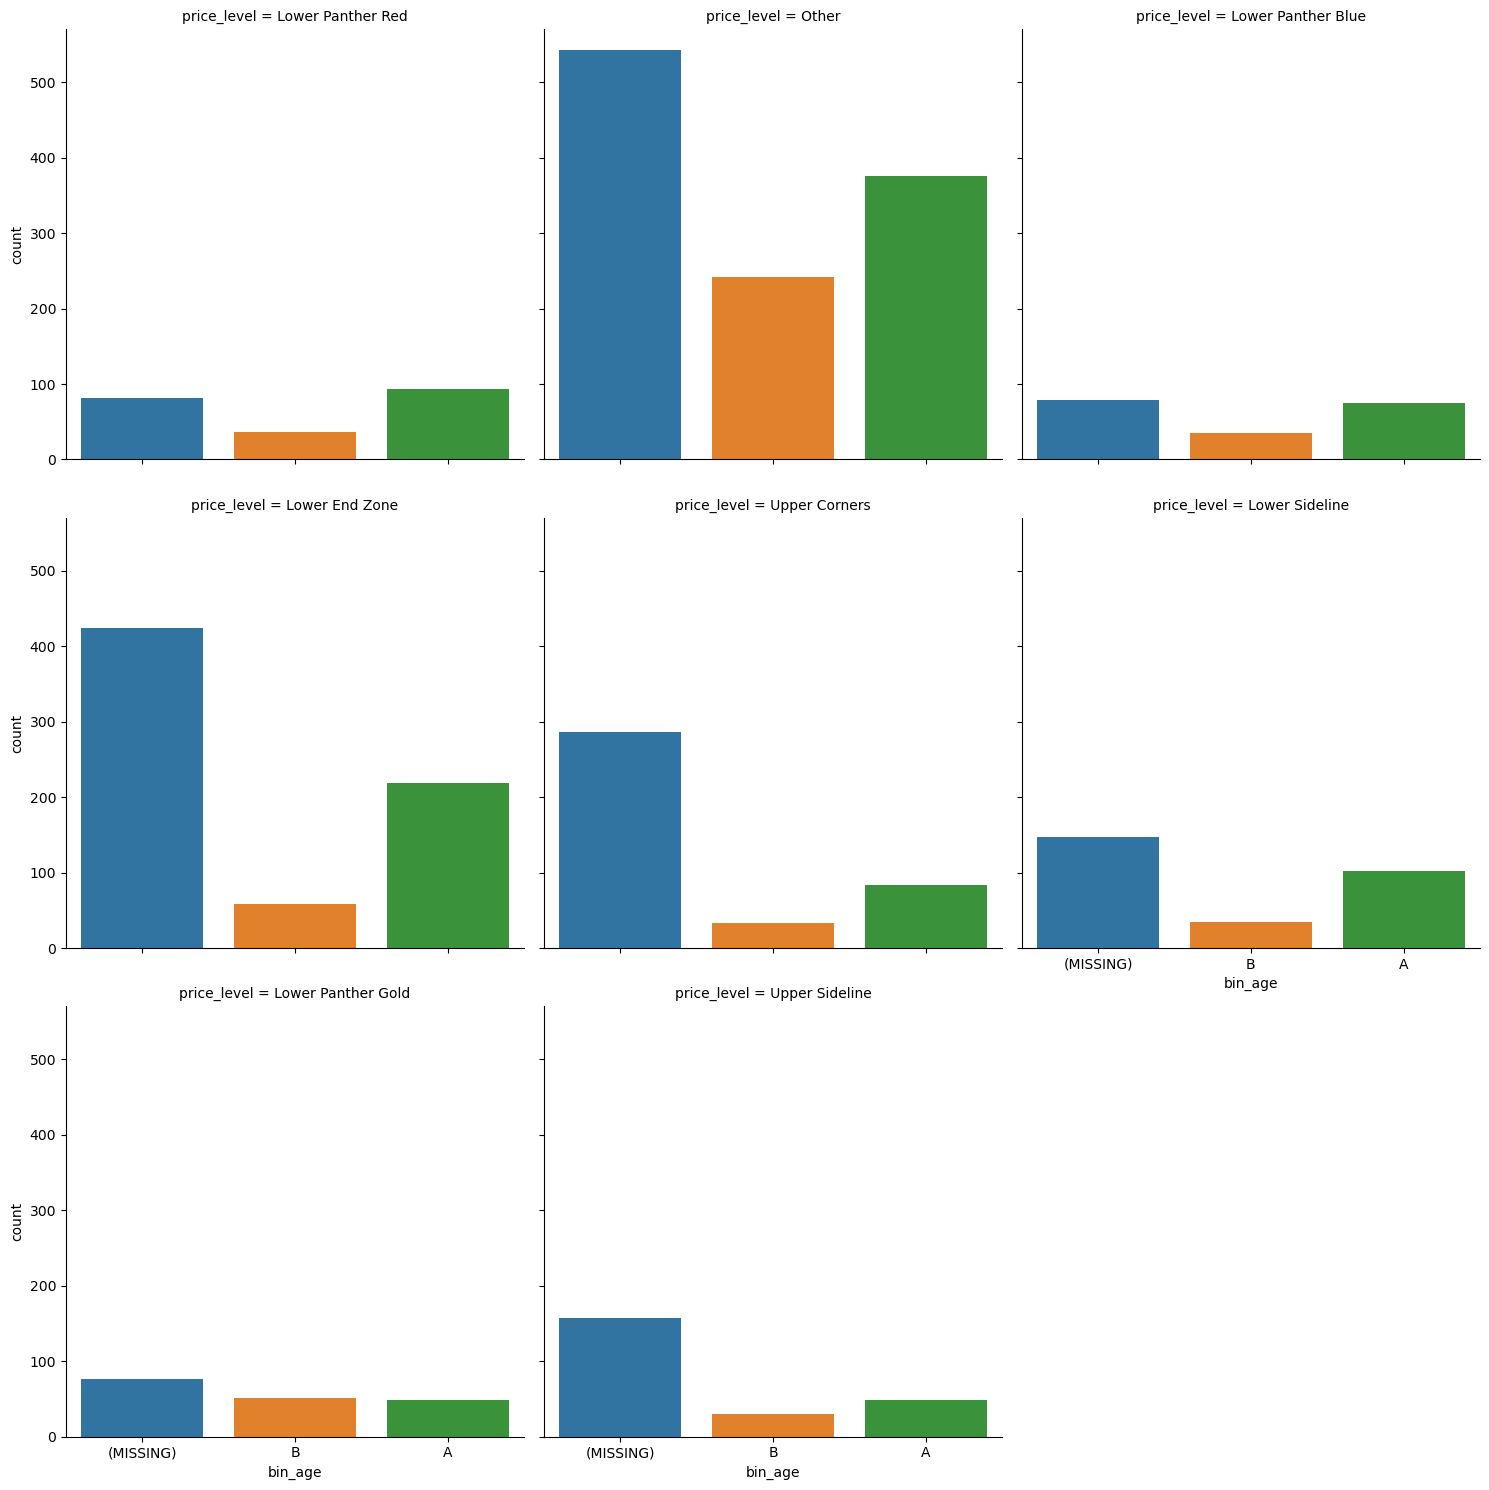

In [505]:
sns.catplot(data = df_copy, x='bin_age', col = 'price_level', kind='count', col_wrap = 3)

plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


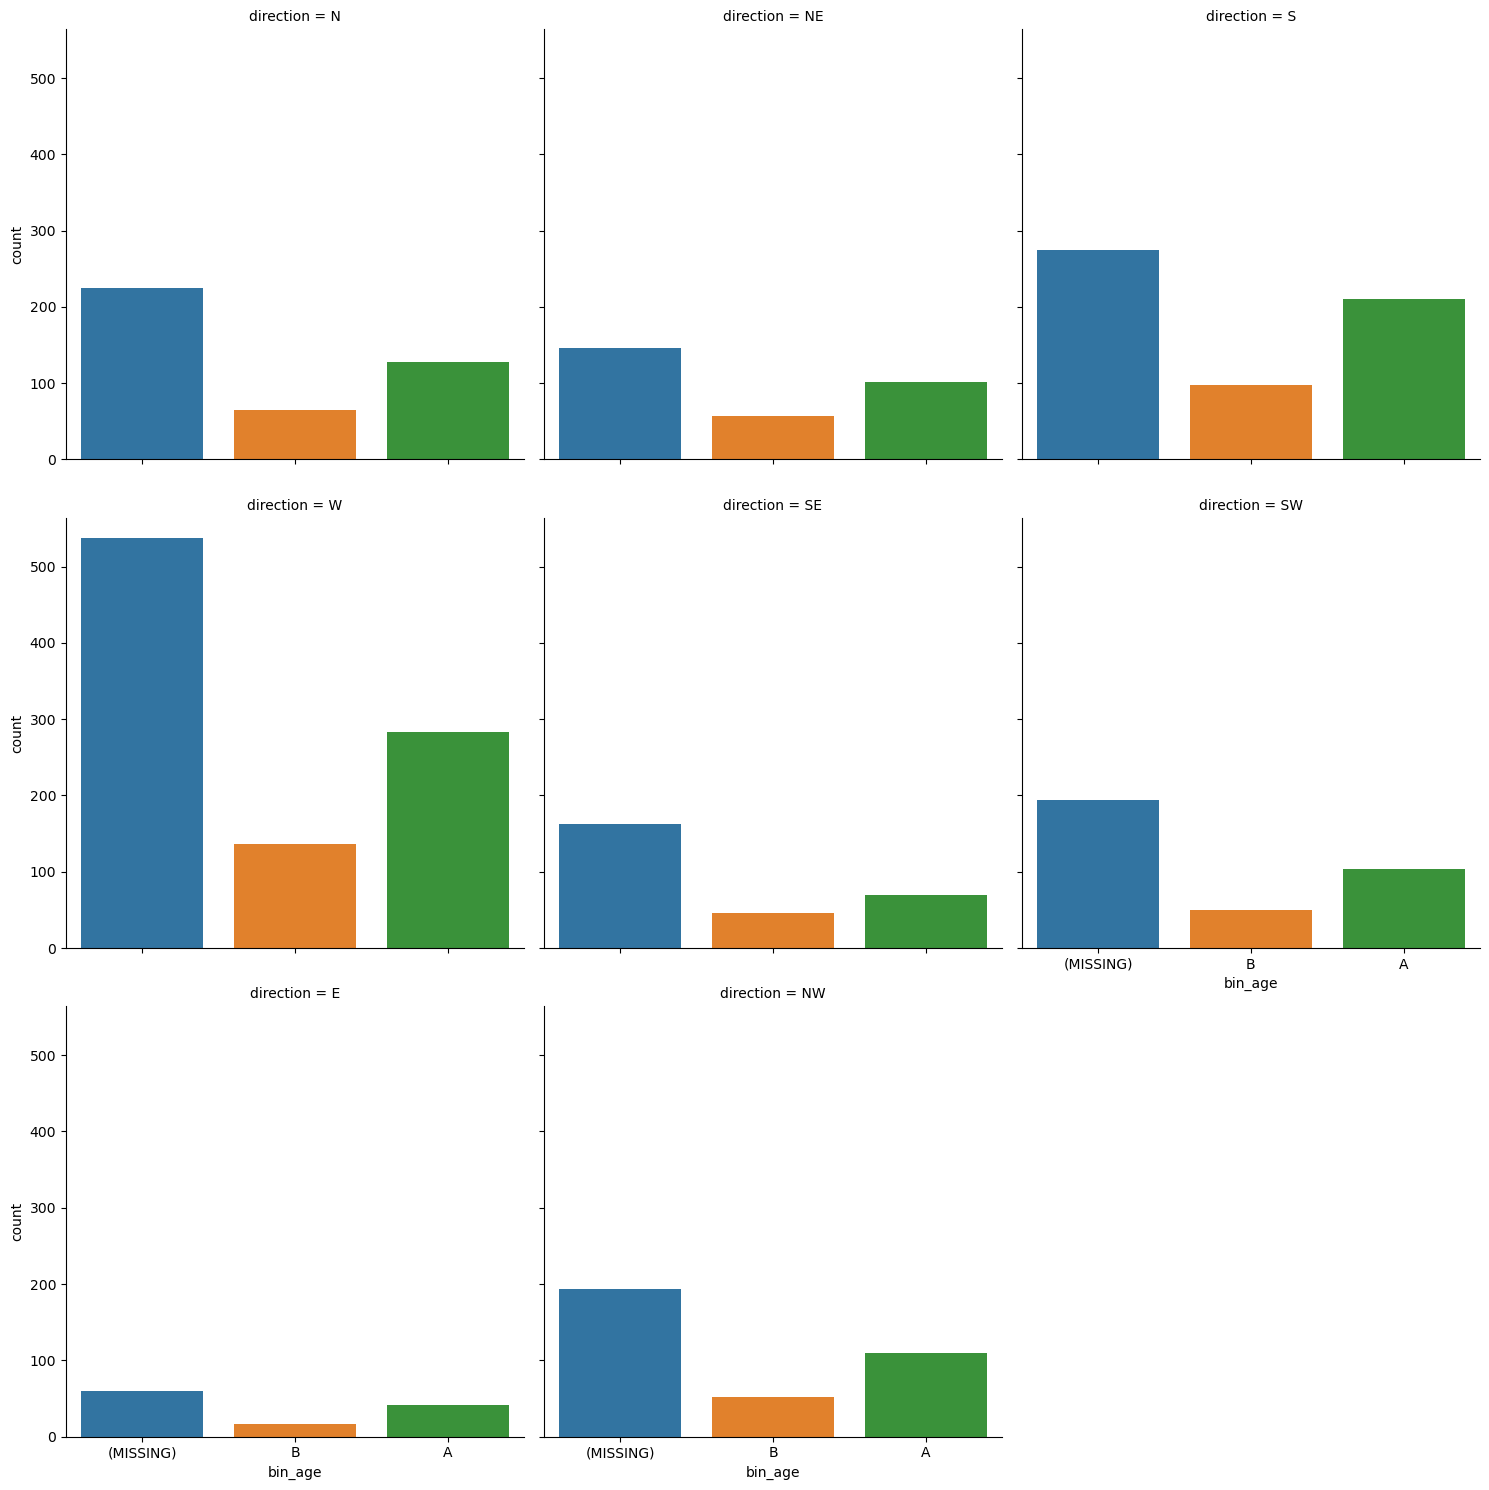

In [506]:
sns.catplot(data = df_copy, x='bin_age', col = 'direction', kind='count', col_wrap = 3)

plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


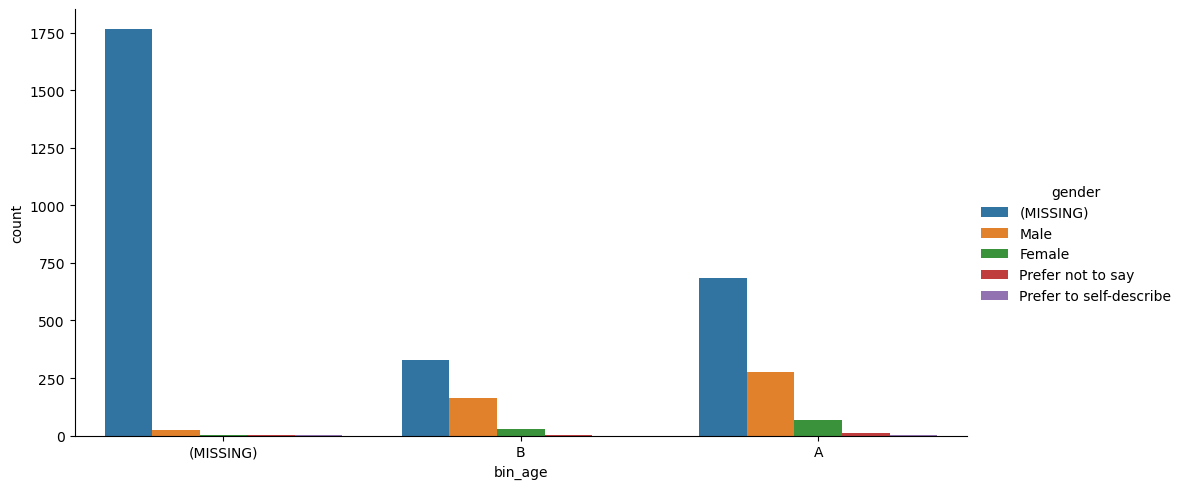

In [507]:
sns.catplot(data = df_copy, x = 'bin_age', hue = 'gender', kind = 'count', aspect = 2)
plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


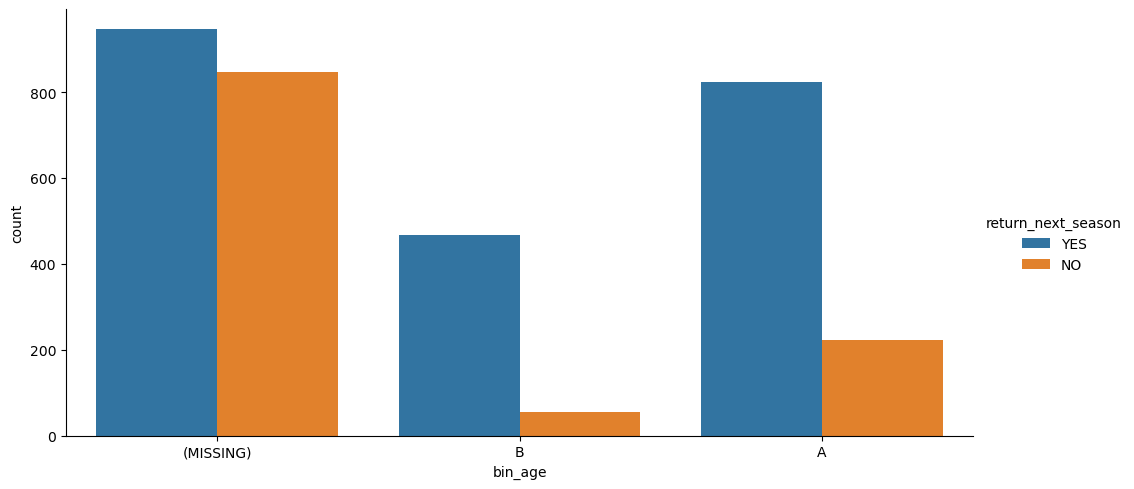

In [508]:
sns.catplot(data = df_copy, x = 'bin_age', hue = 'return_next_season', kind = 'count', aspect = 2)
plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


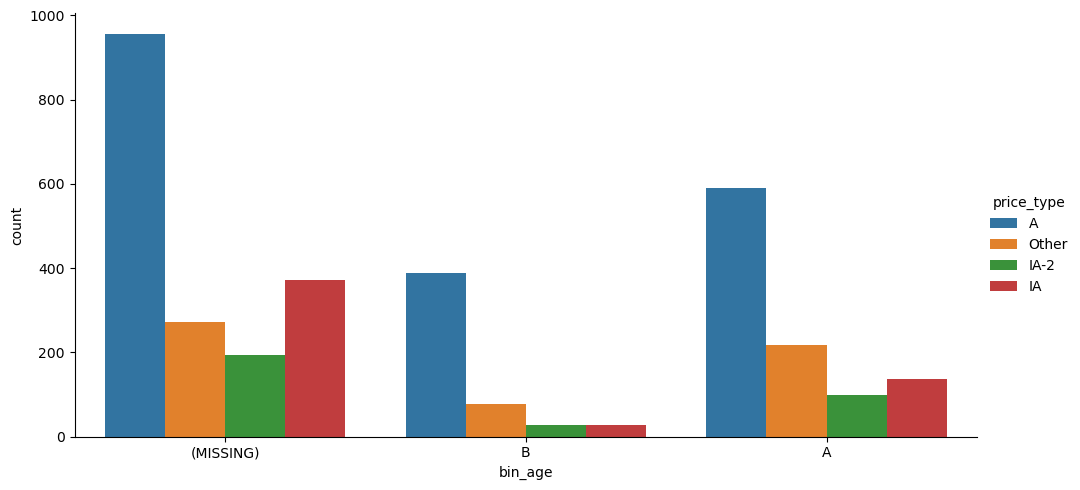

In [509]:
sns.catplot(data = df_copy, x = 'bin_age', hue = 'price_type', kind = 'count', aspect = 2)
plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


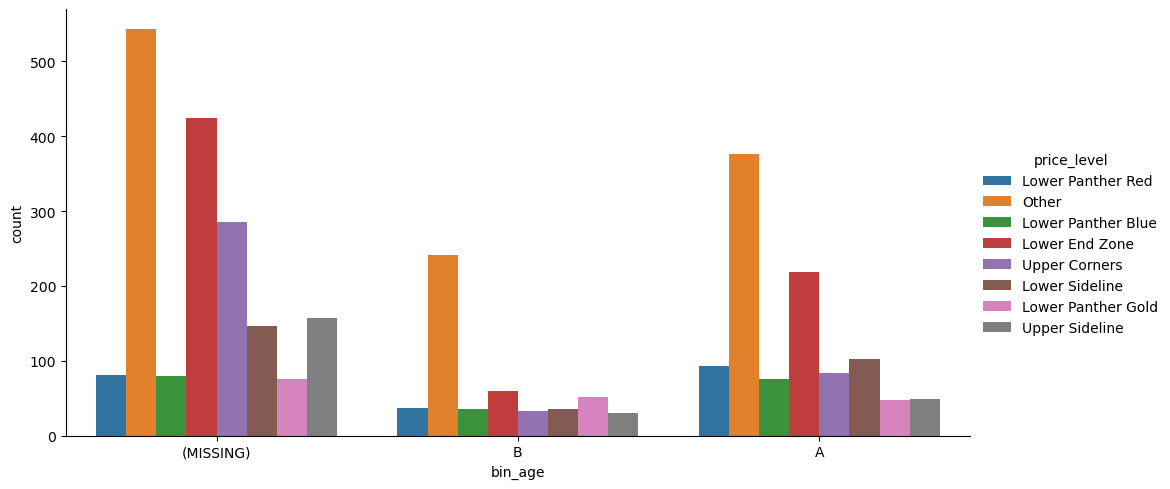

In [510]:
sns.catplot(data = df_copy, x = 'bin_age', hue = 'price_level', kind = 'count', aspect = 2)
plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


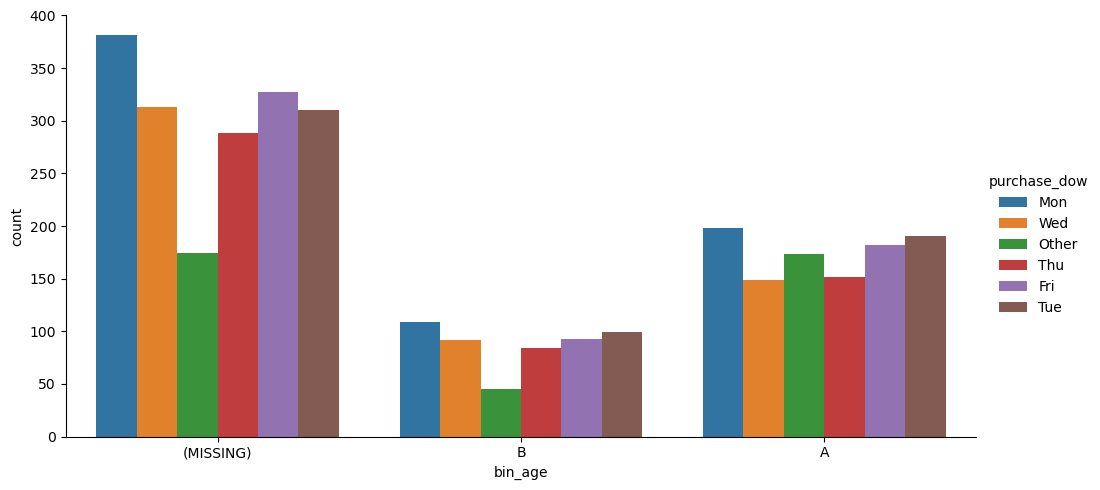

In [511]:
sns.catplot(data = df_copy, x = 'bin_age', hue = 'purchase_dow', kind = 'count', aspect = 2)
plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


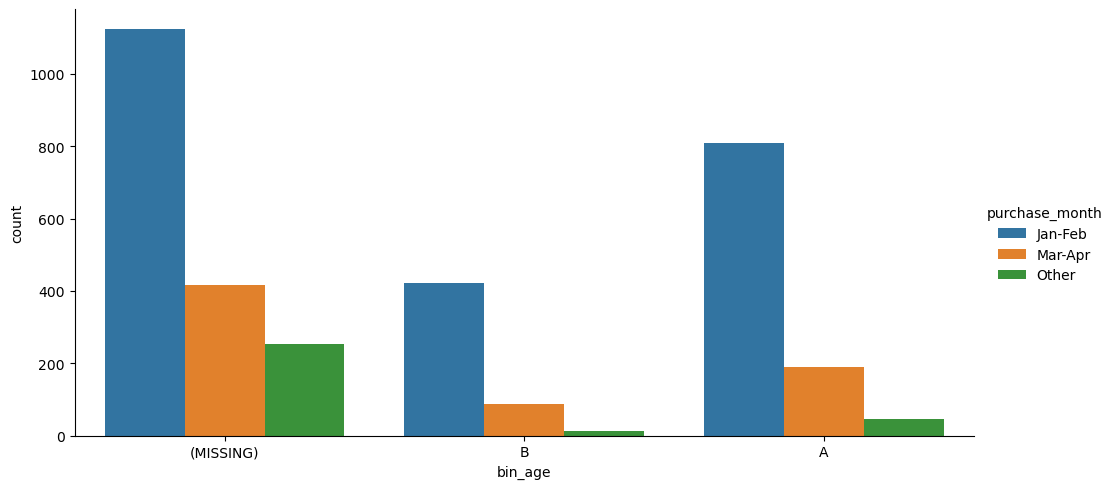

In [512]:
sns.catplot(data = df_copy, x = 'bin_age', hue = 'purchase_month', kind = 'count', aspect = 2)
plt.show()

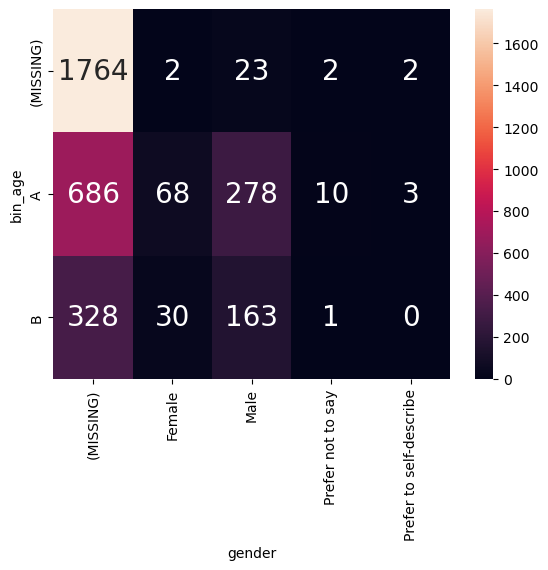

In [513]:
fig, ax = plt.subplots()
sns.heatmap(pd.crosstab(df_copy.bin_age, df_copy.gender),
            annot = True, annot_kws = {'fontsize': 20}, fmt = 'd',
            ax = ax)
plt.show()

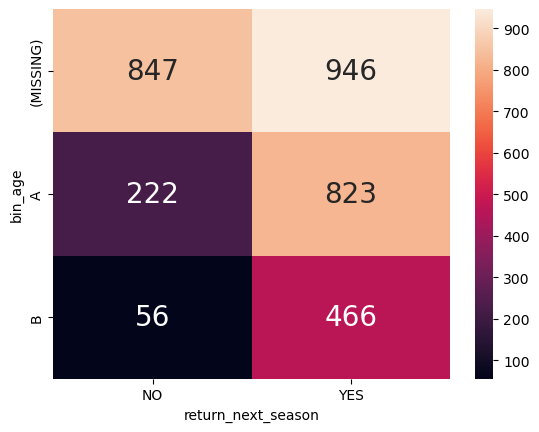

In [514]:
fig, ax = plt.subplots()
sns.heatmap(pd.crosstab(df_copy.bin_age, df_copy.return_next_season),
            annot = True, annot_kws = {'fontsize': 20}, fmt = 'd',
            ax = ax)
plt.show()

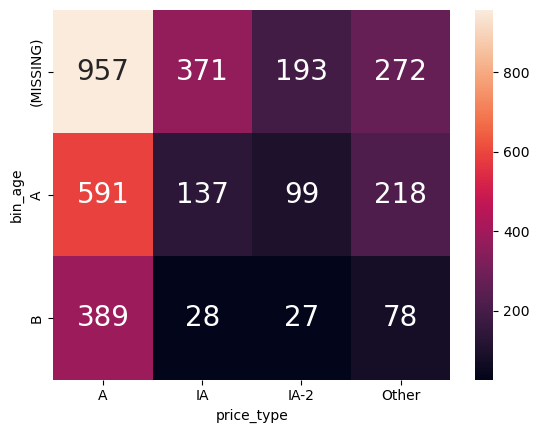

In [515]:
fig, ax = plt.subplots()
sns.heatmap(pd.crosstab(df_copy.bin_age, df_copy.price_type),
            annot = True, annot_kws = {'fontsize': 20}, fmt = 'd',
            ax = ax)
plt.show()

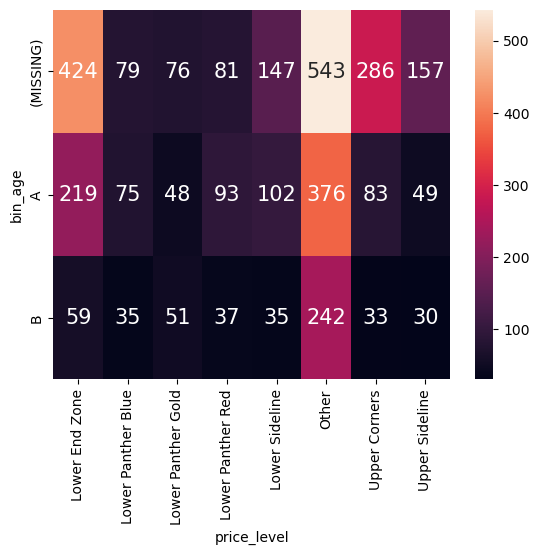

In [516]:
fig, ax = plt.subplots()
sns.heatmap(pd.crosstab(df_copy.bin_age, df_copy.price_level),
            annot = True, annot_kws = {'fontsize': 15}, fmt = 'd',
            ax = ax)
plt.show()

Now lets return the filled gender variable

In [517]:
df_copy.gender.value_counts(dropna=False, normalize=True)

gender
(MISSING)                  0.826786
Male                       0.138095
Female                     0.029762
Prefer not to say          0.003869
Prefer to self-describe    0.001488
Name: proportion, dtype: float64

In [518]:
np.where( df.gender.isna(), '(MISSING)', '(NON-MISSING)')

array(['(MISSING)', '(MISSING)', '(NON-MISSING)', ..., '(MISSING)',
       '(MISSING)', '(MISSING)'], dtype='<U13')

In [519]:
np.where( df_copy.gender == '(MISSING)', df_copy.gender, '(NON-MISSING)')

array(['(MISSING)', '(MISSING)', '(NON-MISSING)', ..., '(MISSING)',
       '(MISSING)', '(MISSING)'], dtype=object)

Let's assign the result to a new column named lump_gender.

In [520]:
df_copy['lump_gender'] = np.where( df_copy.gender == '(MISSING)', df_copy.gender, '(NON-MISSING)')

In [521]:
df_copy.lump_gender.value_counts(dropna=False)

lump_gender
(MISSING)        2778
(NON-MISSING)     582
Name: count, dtype: int64

In [522]:
df_copy.lump_gender.value_counts(dropna=False, normalize=True)

lump_gender
(MISSING)        0.826786
(NON-MISSING)    0.173214
Name: proportion, dtype: float64

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


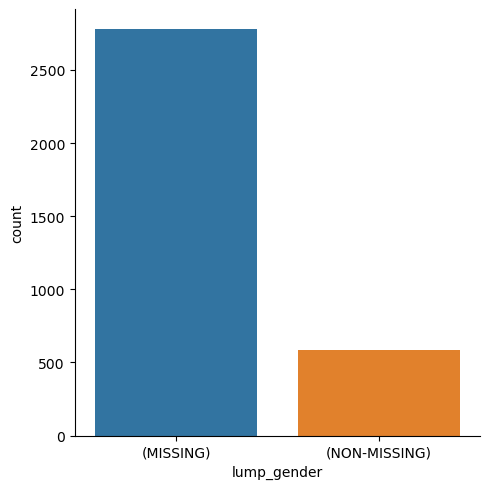

In [523]:
sns.catplot(data = df_copy, x='lump_gender', kind='count')

plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


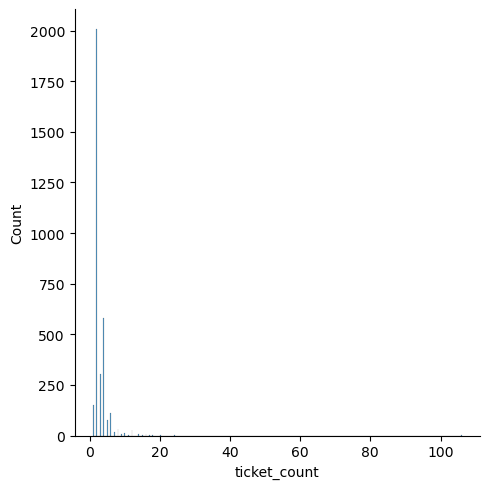

In [524]:
sns.displot(data = df, x='ticket_count', kind='hist')

plt.show()

In [525]:
df.ticket_count.value_counts(normalize=True)

ticket_count
2      0.597024
4      0.172619
3      0.090774
1      0.045238
6      0.033631
5      0.023214
8      0.009226
12     0.008333
7      0.005060
10     0.003869
14     0.002381
9      0.002083
16     0.002083
18     0.000893
11     0.000893
15     0.000893
24     0.000595
20     0.000595
106    0.000298
17     0.000298
Name: proportion, dtype: float64

In [526]:
df.ticket_count.value_counts(normalize=True).cumsum()

ticket_count
2      0.597024
4      0.769643
3      0.860417
1      0.905655
6      0.939286
5      0.962500
8      0.971726
12     0.980060
7      0.985119
10     0.988988
14     0.991369
9      0.993452
16     0.995536
18     0.996429
11     0.997321
15     0.998214
24     0.998810
20     0.999405
106    0.999702
17     1.000000
Name: proportion, dtype: float64

In [527]:
np.where( df.ticket_count > 4, '5 or more', df.ticket_count.astype('str') )

array(['3', '2', '2', ..., '2', '2', '2'], dtype=object)

In [528]:
df_copy['lump_ticket_count'] = np.where( df.ticket_count > 4, '5 or more', df.ticket_count.astype('str') )

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


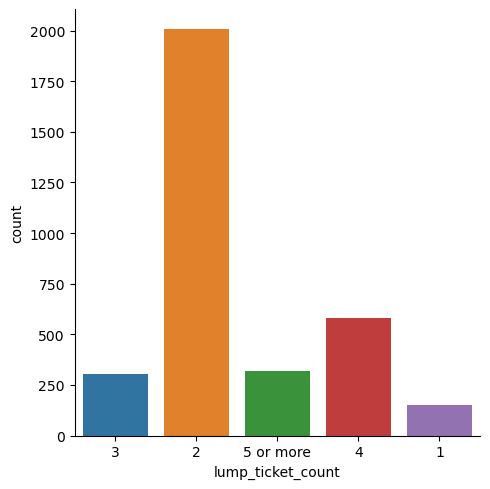

In [529]:
sns.catplot(data = df_copy, x='lump_ticket_count', kind='count')

plt.show()

In [530]:
df.price_level.value_counts()

price_level
Other                 1161
Lower End Zone         702
Upper Corners          402
Lower Sideline         284
Upper Sideline         236
Lower Panther Red      211
Lower Panther Blue     189
Lower Panther Gold     175
Name: count, dtype: int64

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


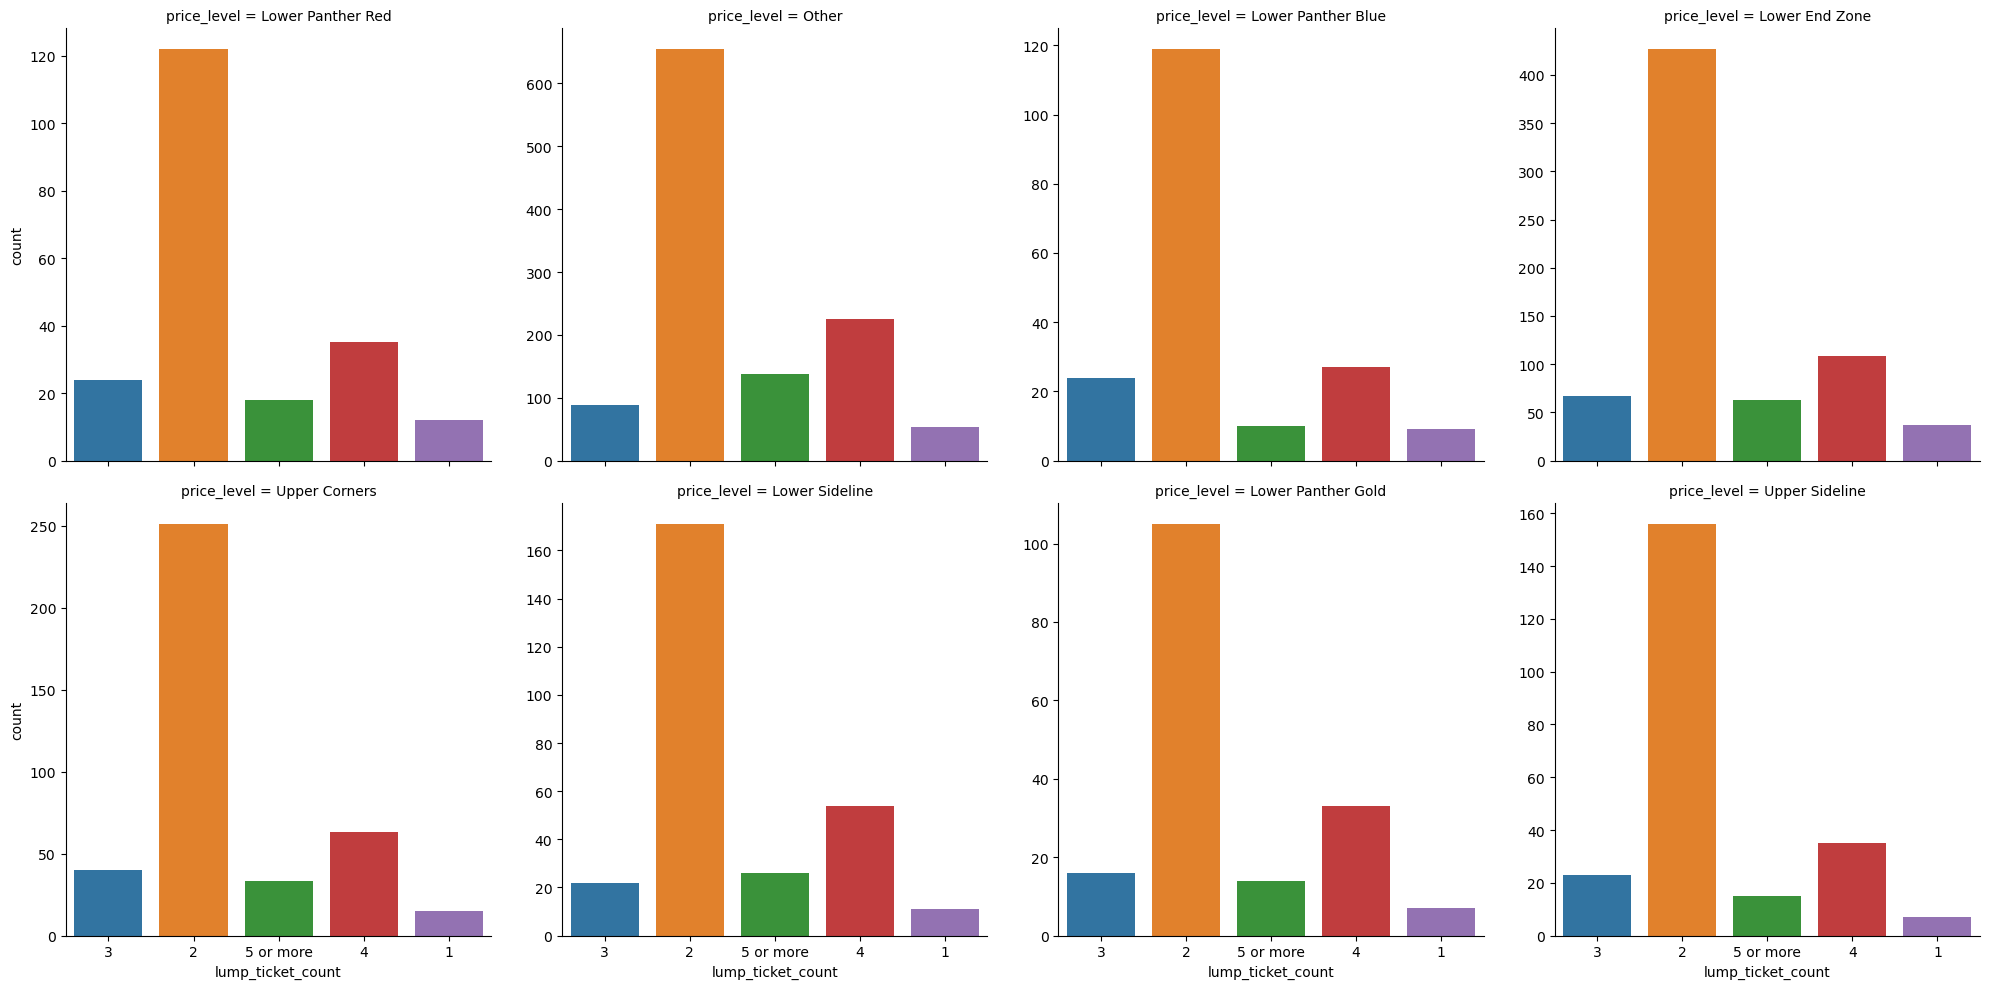

In [531]:
sns.catplot(data = df_copy, x='lump_ticket_count', col='price_level', col_wrap=4, kind='count', sharey=False)

plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


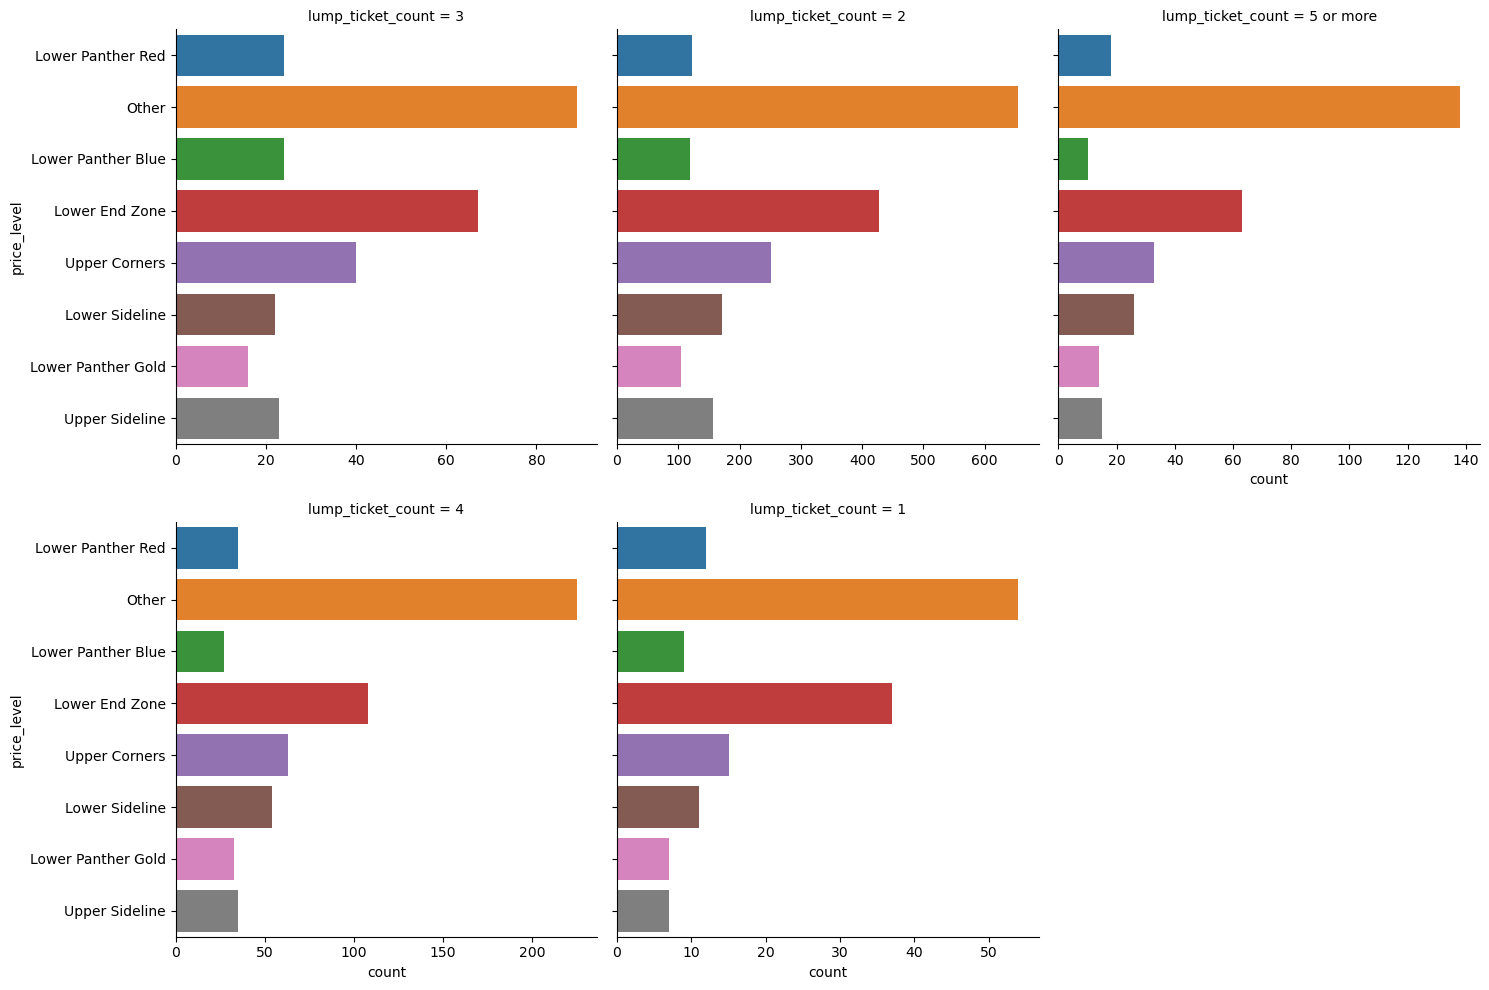

In [532]:
sns.catplot(data = df_copy, y='price_level', col='lump_ticket_count', col_wrap=3, kind='count', sharex=False)

plt.show()

The `price_per_ticket` column represents the cost of each ticket bought by customers. Its distribution is unusual, displaying multiple "spikes" at certain price points. The Kernel Density Estimate (KDE) below illustrates how these spikes are smoothed out, potentially overlooking some "gaps." Nonetheless, the KDE modes (peaks) generally align with the most prominent spikes observed in the histogram.

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


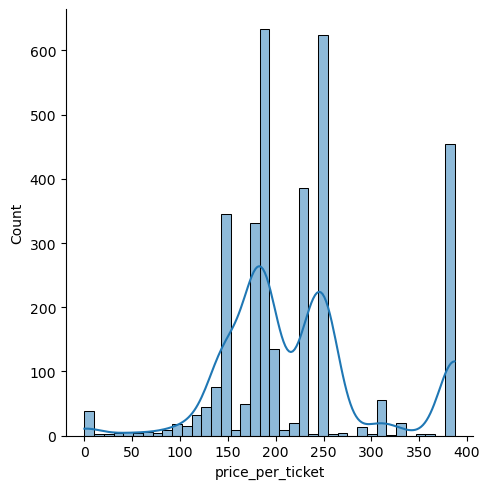

In [533]:
sns.displot(data = df, x='price_per_ticket', kind='hist', kde=True)

plt.show()

In [534]:
df.price_type.value_counts()

price_type
A        1937
Other     568
IA        536
IA-2      319
Name: count, dtype: int64

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


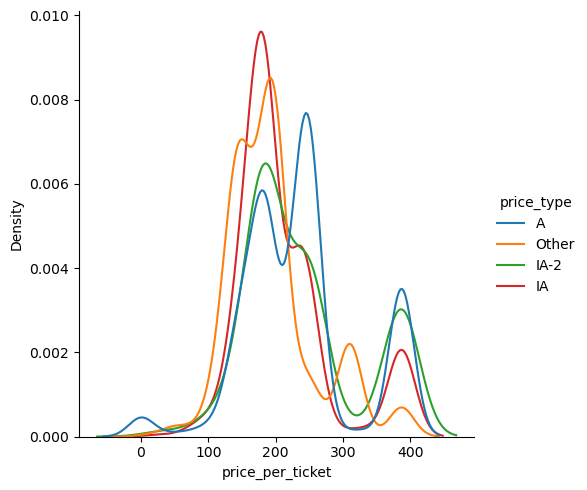

In [535]:
sns.displot(data = df, x='price_per_ticket', hue='price_type', kind='kde', common_norm=False)

plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


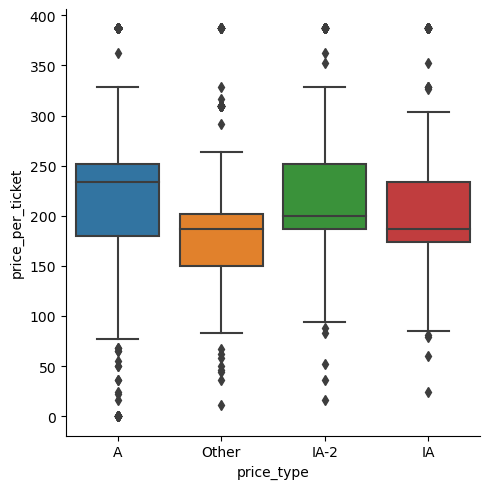

In [536]:
sns.catplot(data = df, x='price_type', y='price_per_ticket', kind='box')

plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


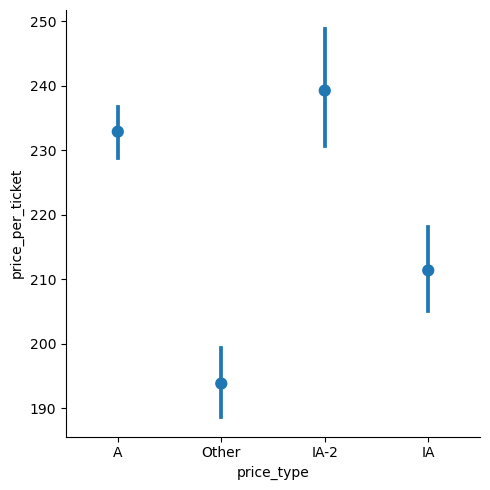

In [537]:
sns.catplot(data = df, x='price_type', y='price_per_ticket', kind='point', join=False)

plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


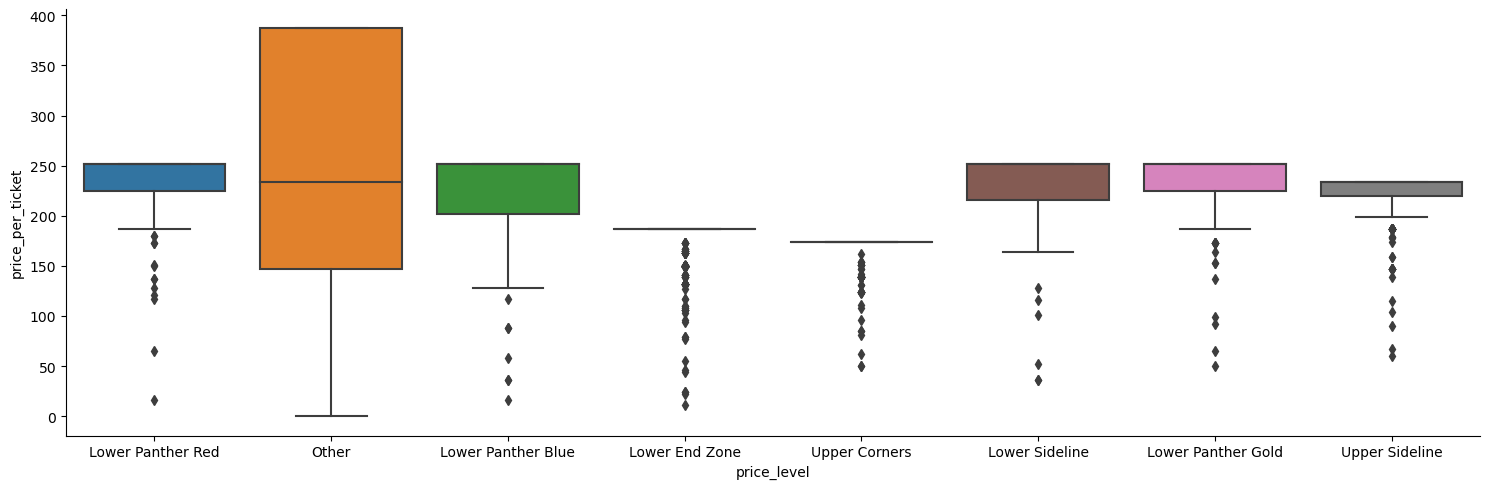

In [538]:
sns.catplot(data = df, x ='price_level', y='price_per_ticket', kind='box', aspect = 3)

plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


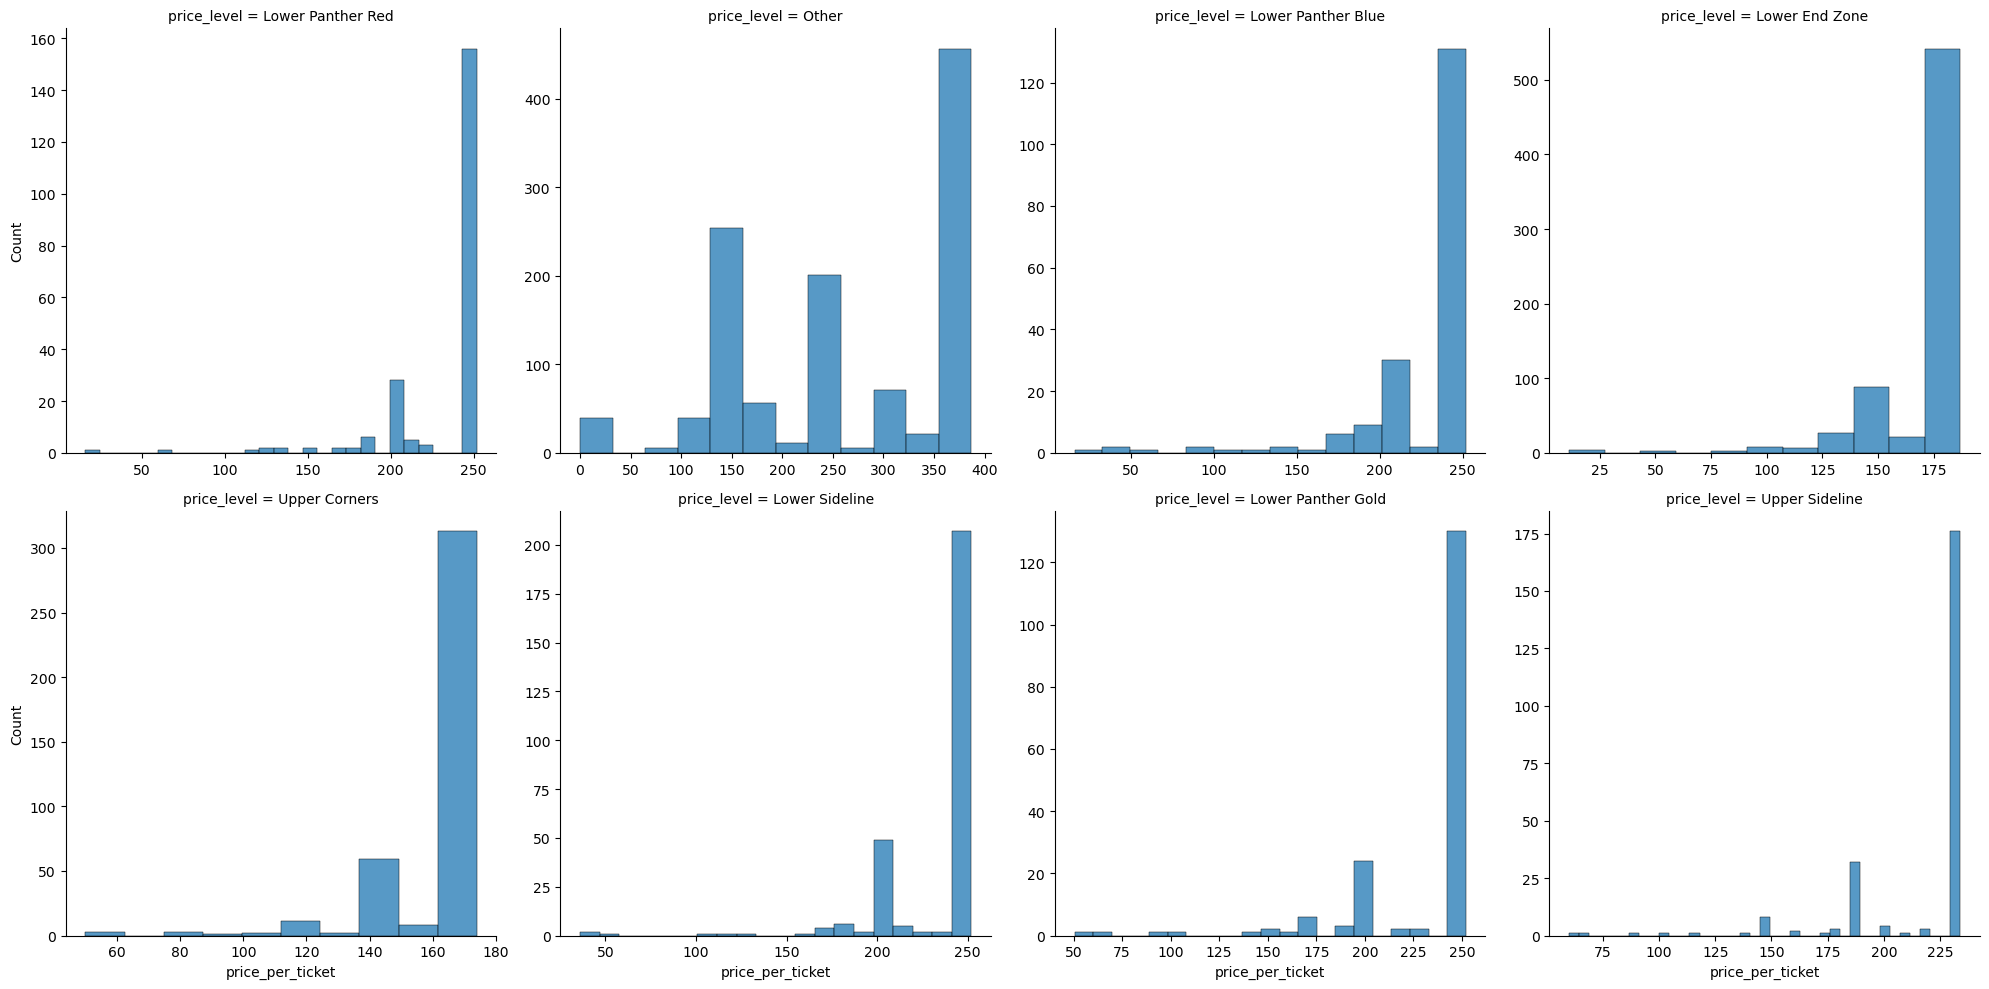

In [539]:
sns.displot(data = df, x='price_per_ticket', col='price_level', col_wrap=4,
            facet_kws={'sharex': False, 'sharey': False}, 
            common_bins=False)

plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


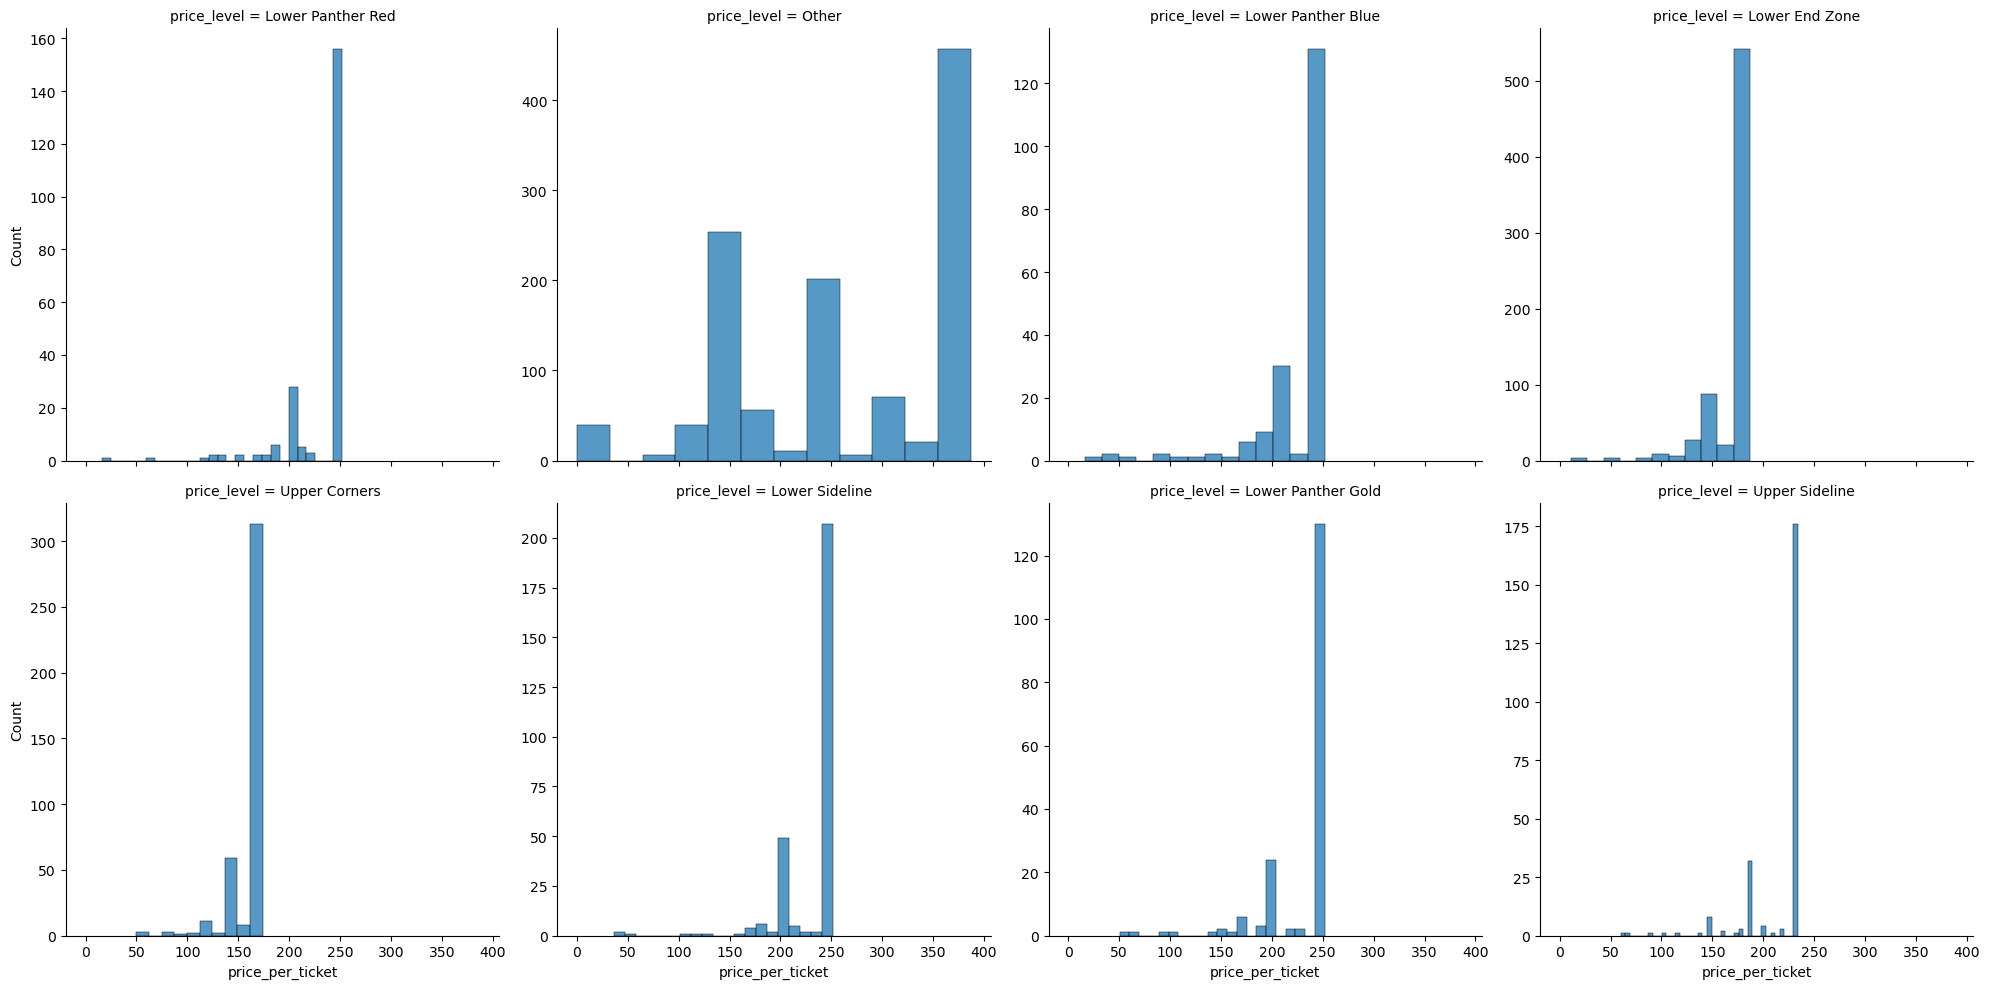

In [540]:
sns.displot(data = df, x='price_per_ticket', col='price_level', col_wrap=4,
            facet_kws={'sharex': True, 'sharey': False}, 
            common_bins=False)

plt.show()

Consider the relationship between the number of purchased tickets and the price.

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


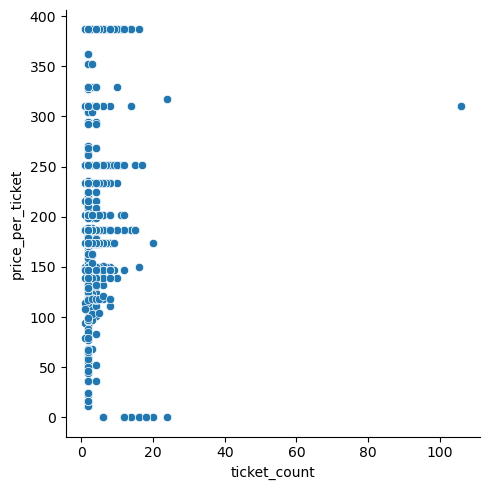

In [541]:
sns.relplot(data = df, x='ticket_count', y='price_per_ticket')

plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


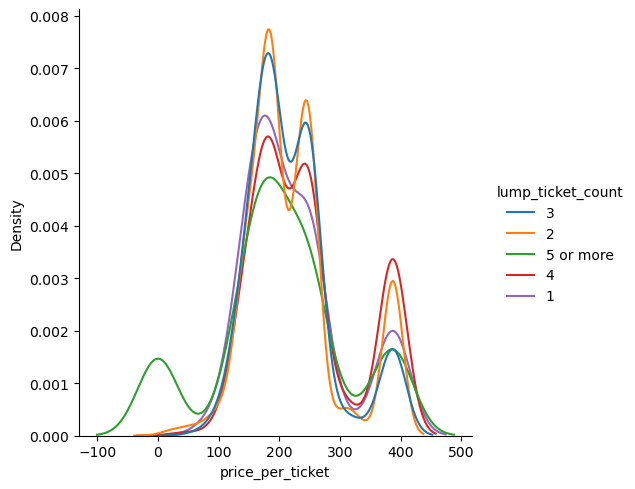

In [542]:
sns.displot(data = df_copy, x='price_per_ticket', hue='lump_ticket_count', kind='kde', common_norm=False)

plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


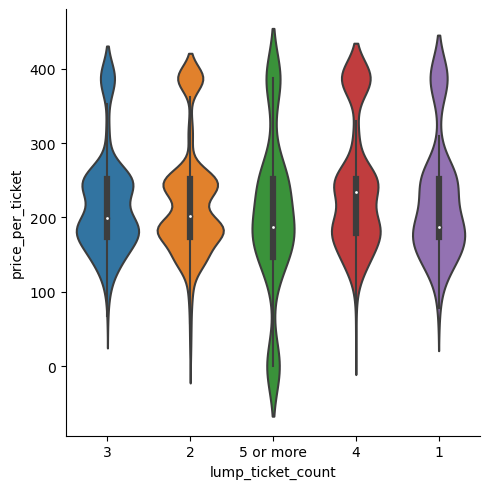

In [543]:
sns.catplot(data = df_copy, x='lump_ticket_count', y='price_per_ticket', kind='violin')

plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


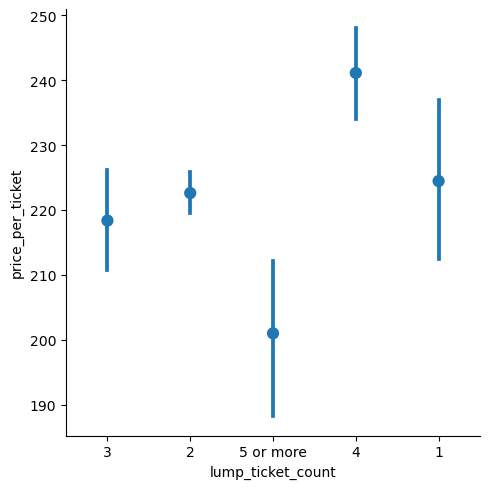

In [544]:
sns.catplot(data = df_copy, x='lump_ticket_count', y='price_per_ticket', kind='point', join=False)

plt.show()

However, we have overlooked the location where the tickets were purchased! The point plot below incorporates the effect of `price_level` through facets. Thus, the point plot displays the average `price_per_ticket` for each combination of `lump_ticket_price` and `price_level`. Visually, the `price_level=='Other'` category shows the greatest difference in the average `price_per_ticket` based on the number of tickets purchased.

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


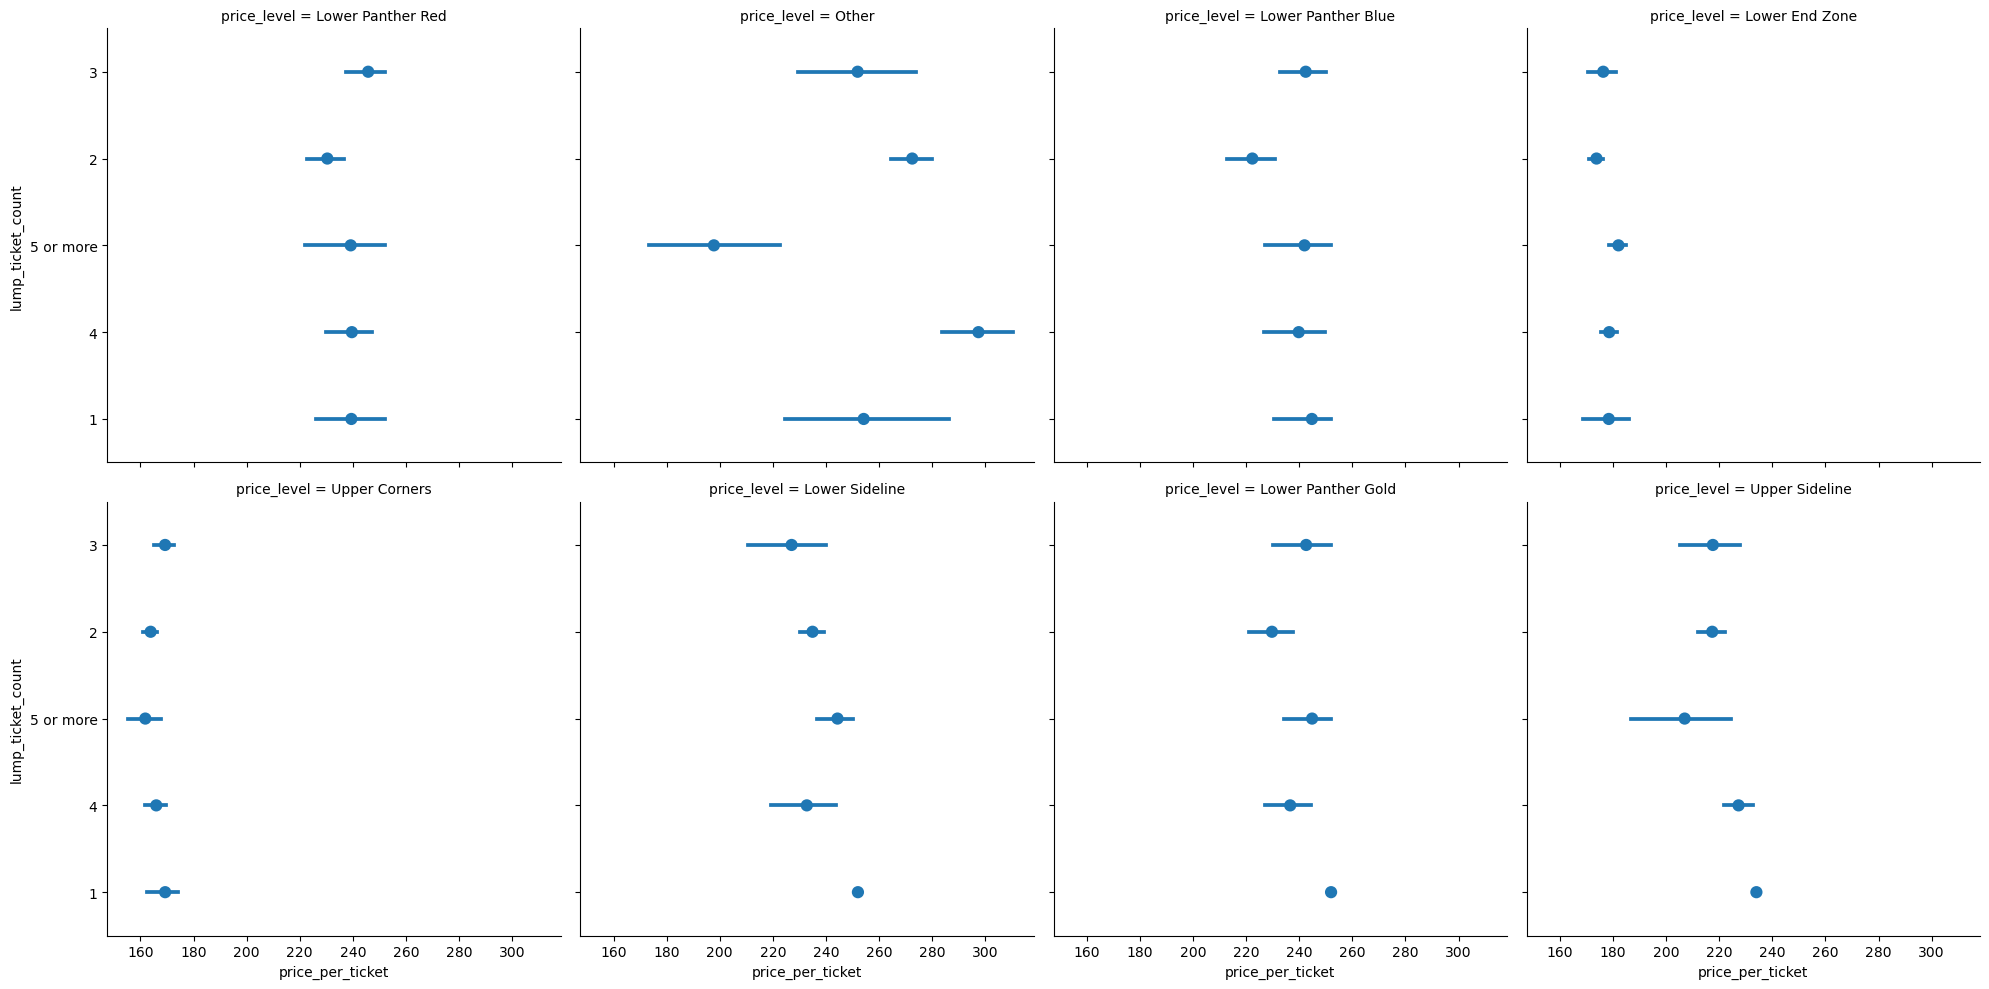

In [545]:
sns.catplot(data = df_copy, y='lump_ticket_count', x='price_per_ticket', 
            col='price_level', col_wrap=4, kind='point', join=False)

plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


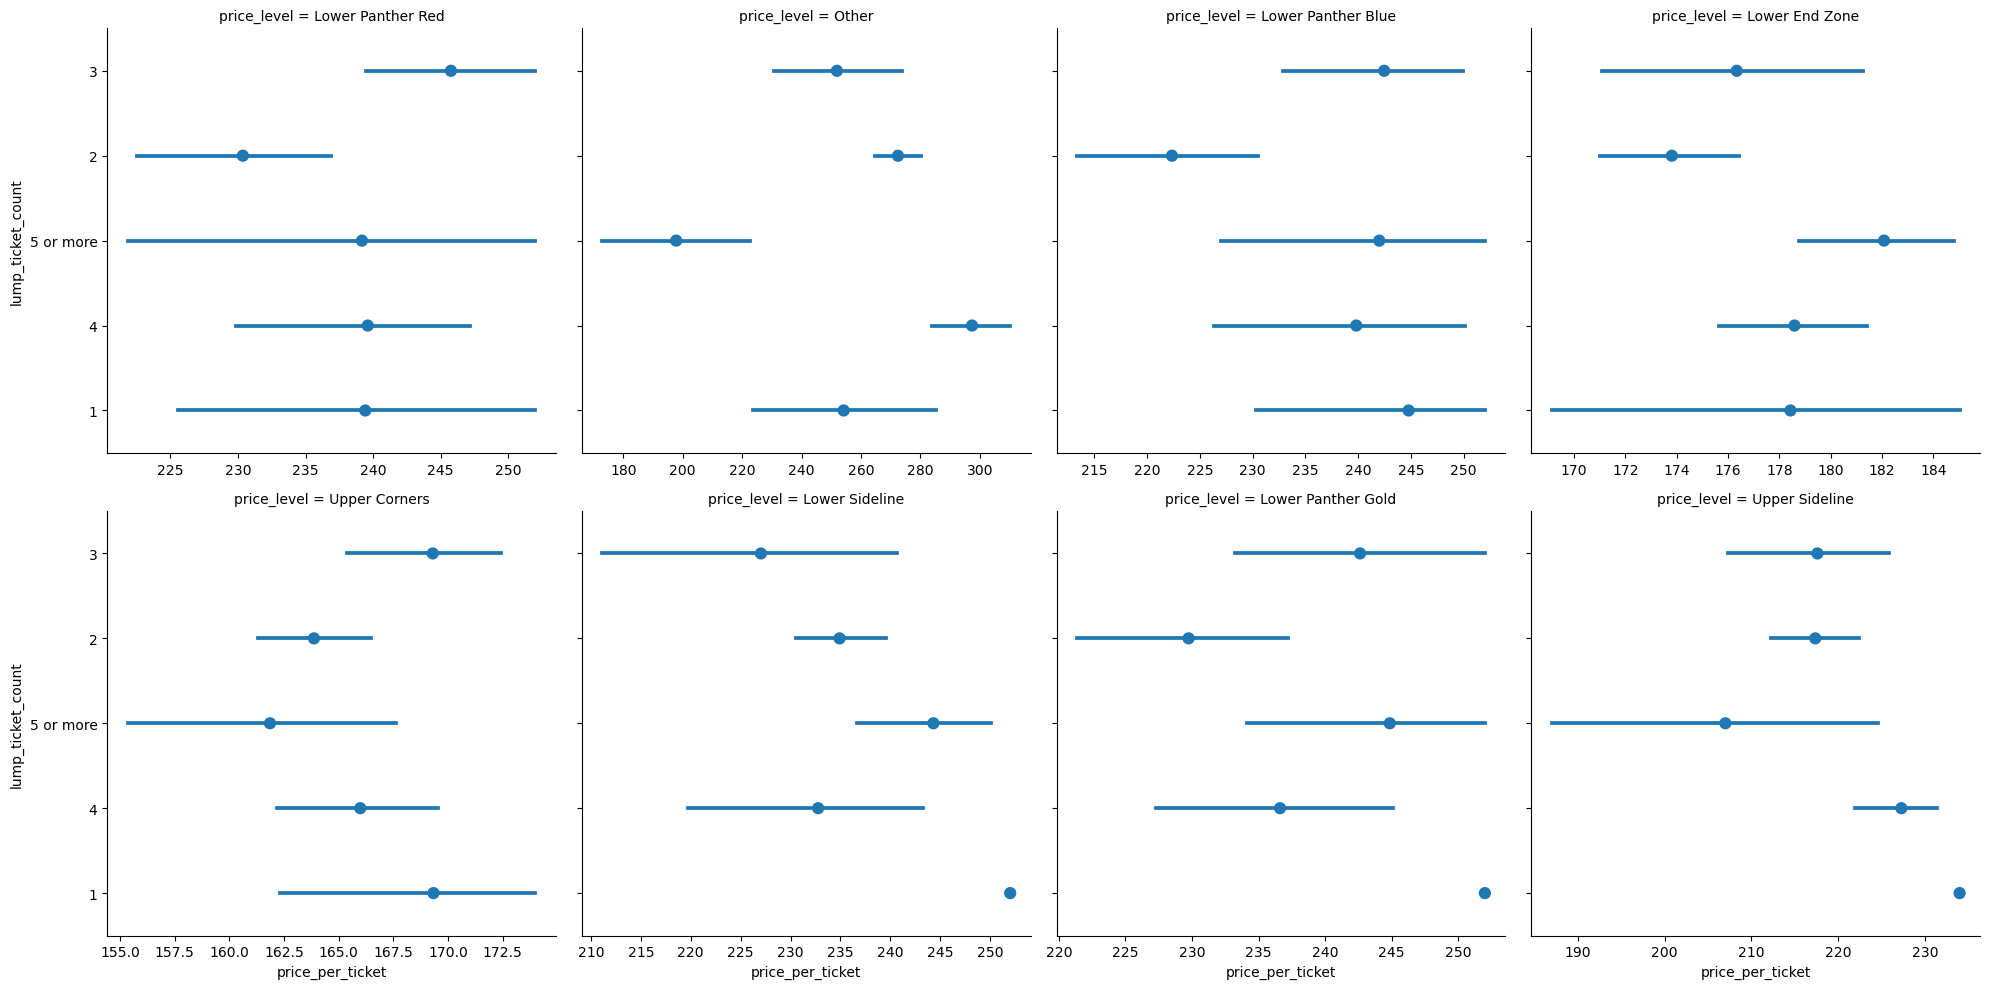

In [546]:
sns.catplot(data = df_copy, y='lump_ticket_count', x='price_per_ticket', 
            col='price_level', col_wrap=4, kind='point', join=False,
            sharex=False)

plt.show()

Now that we've wrapped up our discussion, here's a summary of the inputs:

In the previous discussions, we explored various ways to modify inputs. If you decide to implement these methods, it's important to note that you cannot use both the "original" or "raw" variable and its modified version as inputs simultaneously. For instance, if you group ticket_count, your predictive model should not include both ticket_count and lump_ticket_count as inputs. You must choose one. The same rule applies to the other variables we discussed.

Therefore, you must clearly state which variables you will use as inputs for your predictive models.

Let's take a look at the output:

The output, or response variable, for this problem is a binary outcome. The possible values are 'YES' or 'NO'.

In [547]:
df.return_next_season.value_counts()

return_next_season
YES    2235
NO     1125
Name: count, dtype: int64

In [548]:
df.return_next_season.value_counts(normalize=True)

return_next_season
YES    0.665179
NO     0.334821
Name: proportion, dtype: float64

However, in our lectures, binary outcomes have been encoded as 0 or 1. Here, the value 1 corresponds to the event of interest, while the value 0 represents the non-event. In this case, the event is `return_next_season == 'YES'`. Therefore, let's define a new output variable named `y` that takes on values of 1 or 0. We can create this new column using the `np.where()` function. The conditional test will be `df.return_next_season == 'YES'`. If the condition is true, it will return 1; otherwise, it will return 0.

In [549]:
np.where( df.return_next_season == 'YES', 1, 0 )

array([1, 1, 1, ..., 1, 1, 1])

In [550]:
df_copy['y'] = np.where( df.return_next_season == 'YES', 1, 0 )

In [551]:
df_copy.y.value_counts(normalize=True)

y
1    0.665179
0    0.334821
Name: proportion, dtype: float64

Now, the output is in the same format as the binary outcome values used in our lecture examples. This enables us to create logistic regression trend plots. For example, the event probability with respect to the original ticket_count variable is shown below. Ignoring all other inputs, the event probability increases as the ticket_count rises. In fact, the figure below indicates a nearly 100% chance of returning next season if a customer purchases more than 20 tickets.

However, we should be skeptical of this result, as it stems from a very small number of observations at extreme values. One customer purchased 106 tickets and did return next season, but this may not always be the case. What is the actual chance of a customer returning if they purchase more than 20 tickets? According to the figure, it appears to be nearly 100%, which is likely an overestimate due to the limited data at these higher ticket counts.

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


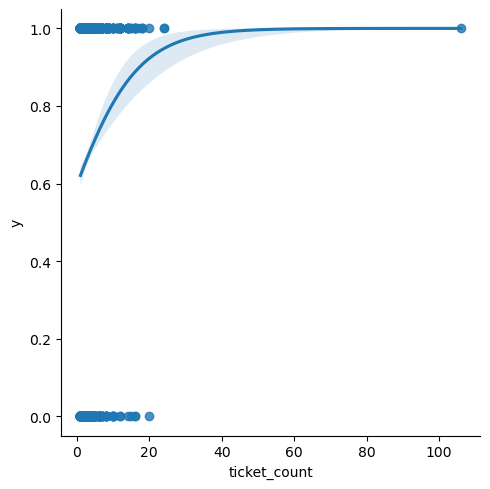

In [552]:
sns.lmplot(data = df_copy, x='ticket_count', y='y', logistic=True)

plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


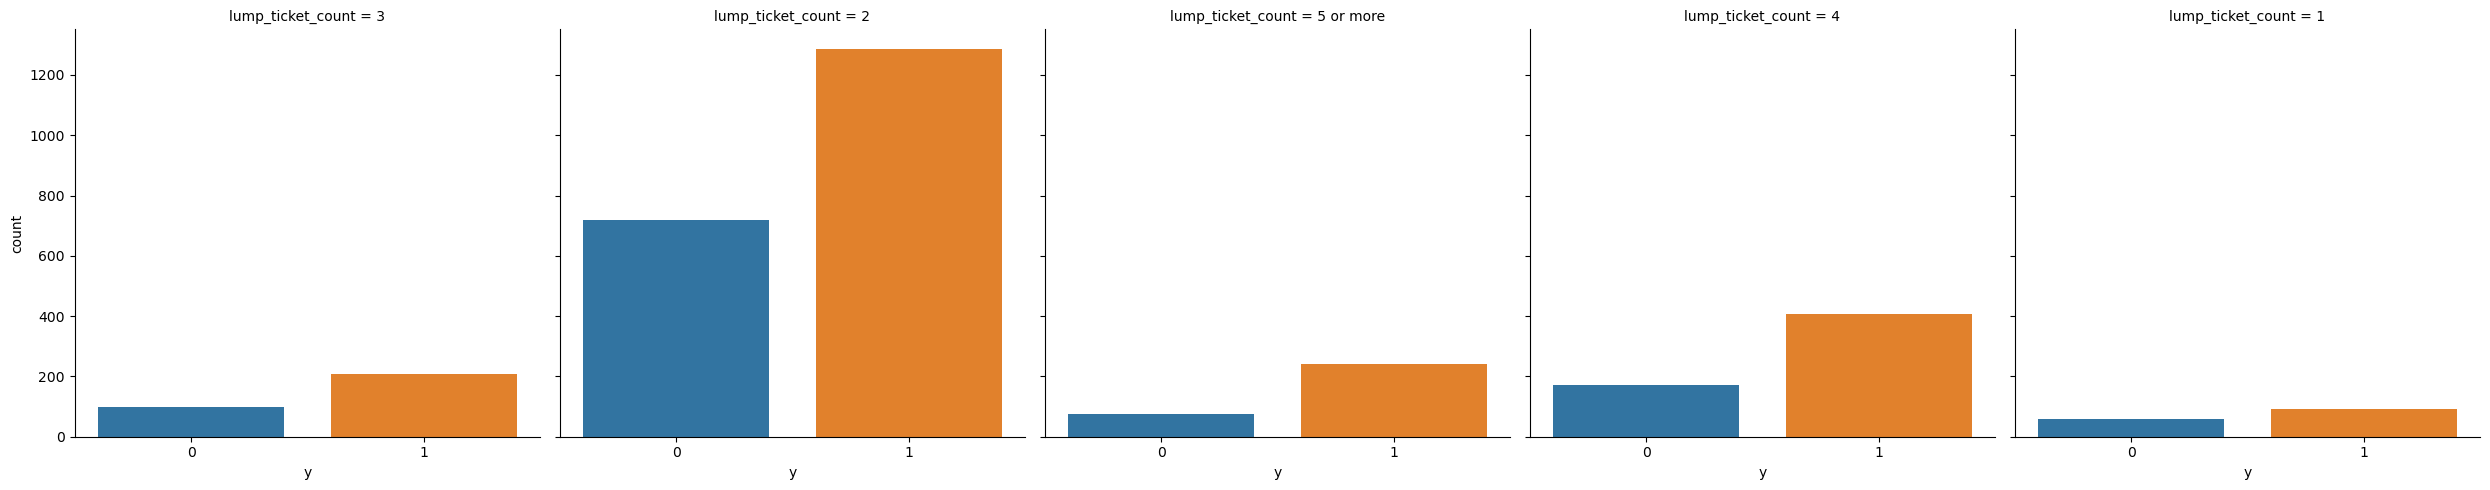

In [553]:
sns.catplot(data = df_copy, x='y', col='lump_ticket_count', kind='count')

plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


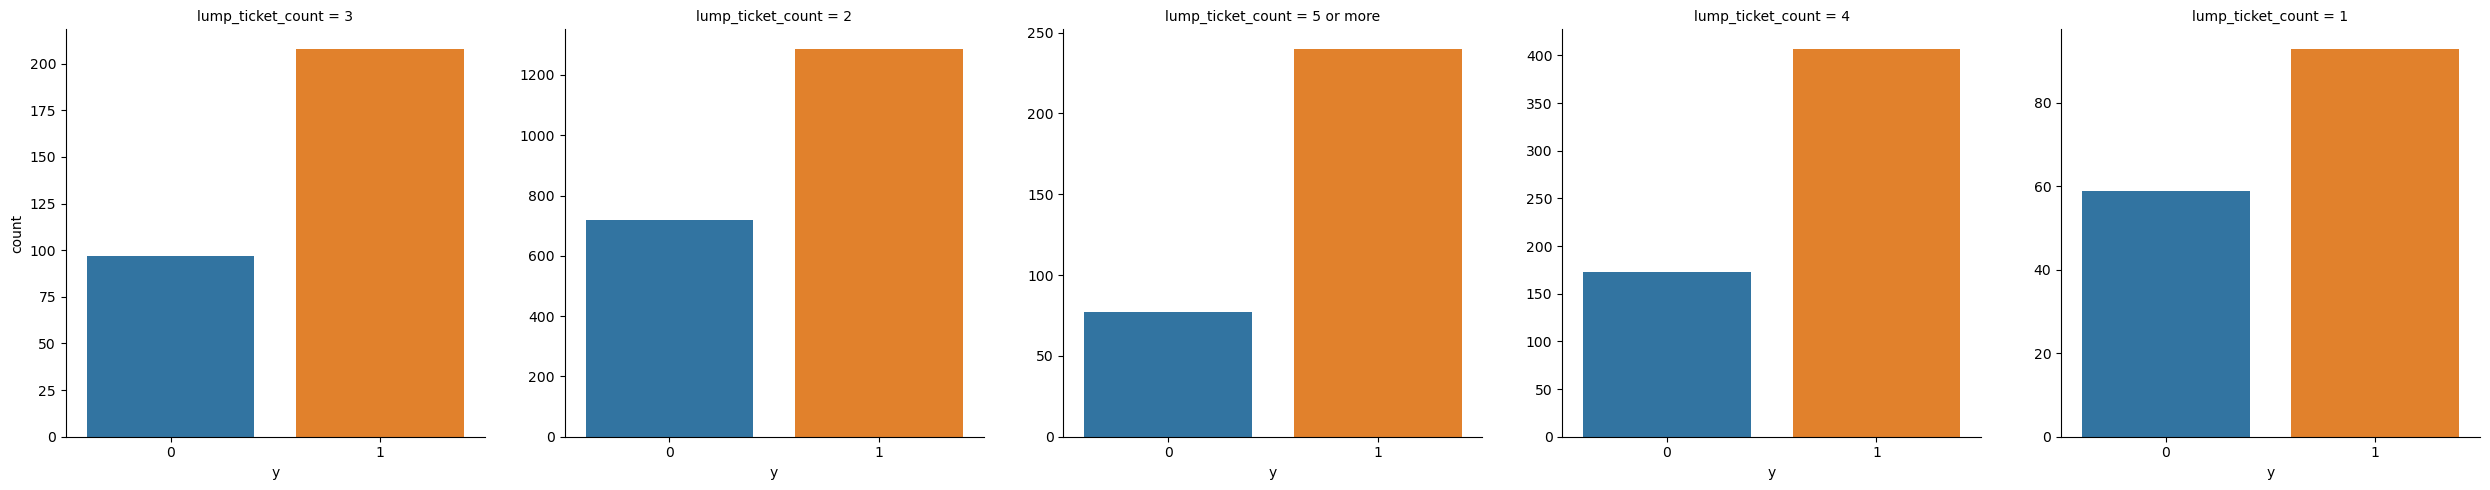

In [554]:
sns.catplot(data = df_copy, x='y', col='lump_ticket_count', kind='count', sharey=False)

plt.show()

In [555]:
df_copy.y.value_counts(normalize=True)

y
1    0.665179
0    0.334821
Name: proportion, dtype: float64

In [556]:
df_copy.y.mean()

0.6651785714285714

In [557]:
df.return_next_season.value_counts(normalize=True)

return_next_season
YES    0.665179
NO     0.334821
Name: proportion, dtype: float64

Same proportion above!

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


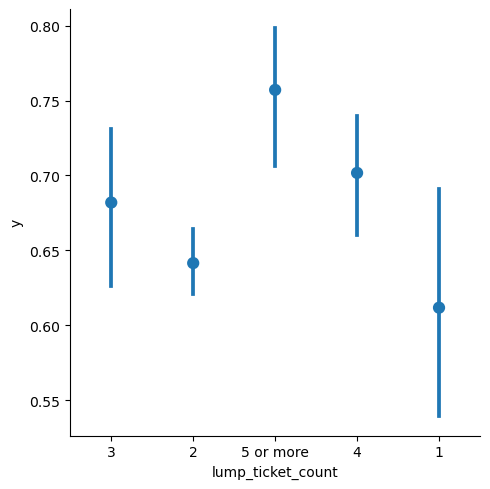

In [558]:
sns.catplot(data = df_copy, x='lump_ticket_count', y='y', kind='point', join = False)

plt.show()

Thus, it seems that purchasing more tickets is associated with a higher chance of returning next season! This observation will need to be confirmed by fitting logistic regression models that include other inputs.

In [559]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   accountid           3360 non-null   int64  
 1   age                 1567 non-null   float64
 2   gender              3360 non-null   object 
 3   distancemiles       3360 non-null   float64
 4   direction           3360 non-null   object 
 5   peak_drivetime      2958 non-null   float64
 6   offpeak_drivetime   2996 non-null   float64
 7   season              3360 non-null   int64  
 8   purchase_month      3360 non-null   object 
 9   purchase_dow        3360 non-null   object 
 10  price_type          3360 non-null   object 
 11  price_level         3360 non-null   object 
 12  ticket_count        3360 non-null   int64  
 13  price_per_ticket    3360 non-null   float64
 14  return_next_season  3360 non-null   object 
 15  bin_age             3360 non-null   object 
 16  lump_g

In [560]:
df_copy.loc[:, [
'distancemiles',
'direction',
'purchase_month',
'purchase_dow',
'price_type',
'price_level',
'price_per_ticket',
'return_next_season',
'bin_age',
'lump_gender', 
'lump_ticket_count',
'y']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   distancemiles       3360 non-null   float64
 1   direction           3360 non-null   object 
 2   purchase_month      3360 non-null   object 
 3   purchase_dow        3360 non-null   object 
 4   price_type          3360 non-null   object 
 5   price_level         3360 non-null   object 
 6   price_per_ticket    3360 non-null   float64
 7   return_next_season  3360 non-null   object 
 8   bin_age             3360 non-null   object 
 9   lump_gender         3360 non-null   object 
 10  lump_ticket_count   3360 non-null   object 
 11  y                   3360 non-null   int32  
dtypes: float64(2), int32(1), object(9)
memory usage: 302.0+ KB


In [561]:
df.dtypes

accountid               int64
age                   float64
gender                 object
distancemiles         float64
direction              object
peak_drivetime        float64
offpeak_drivetime     float64
season                  int64
purchase_month         object
purchase_dow           object
price_type             object
price_level            object
ticket_count            int64
price_per_ticket      float64
return_next_season     object
dtype: object

In [562]:
df_copy.dtypes

accountid               int64
age                   float64
gender                 object
distancemiles         float64
direction              object
peak_drivetime        float64
offpeak_drivetime     float64
season                  int64
purchase_month         object
purchase_dow           object
price_type             object
price_level            object
ticket_count            int64
price_per_ticket      float64
return_next_season     object
bin_age                object
lump_gender            object
lump_ticket_count      object
y                       int32
dtype: object

In [563]:
df_copy_dropped = df_copy.drop(columns = ['age', 'gender', 'accountid', 'peak_drivetime', 'offpeak_drivetime', 'season',
                                          'return_next_season', 'ticket_count' ])

In [564]:
df_copy_dropped.dtypes

distancemiles        float64
direction             object
purchase_month        object
purchase_dow          object
price_type            object
price_level           object
price_per_ticket     float64
bin_age               object
lump_gender           object
lump_ticket_count     object
y                      int32
dtype: object

### C. Clustering

Now we will perform clustering and import the neccesary modules to perform clustering and PCA.

This time we will do it without dropping any missings and instead visualize using the dropped columns of age, peak_drivetime and offpeak_drivetime

In [565]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [566]:
df_copy_cluster = df_copy_dropped.copy()

In [567]:
df_copy_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   distancemiles      3360 non-null   float64
 1   direction          3360 non-null   object 
 2   purchase_month     3360 non-null   object 
 3   purchase_dow       3360 non-null   object 
 4   price_type         3360 non-null   object 
 5   price_level        3360 non-null   object 
 6   price_per_ticket   3360 non-null   float64
 7   bin_age            3360 non-null   object 
 8   lump_gender        3360 non-null   object 
 9   lump_ticket_count  3360 non-null   object 
 10  y                  3360 non-null   int32  
dtypes: float64(2), int32(1), object(8)
memory usage: 275.8+ KB


In [568]:
df_copy_cluster.isna().sum()

distancemiles        0
direction            0
purchase_month       0
purchase_dow         0
price_type           0
price_level          0
price_per_ticket     0
bin_age              0
lump_gender          0
lump_ticket_count    0
y                    0
dtype: int64

Now we will:
* Initialize the object based on assumptions
* Fit the object given a dataset
* Predict and Transform a dataset using the FITTED object

First lets identify the columns that we will standardizerdizt

In [569]:
df_features = df_copy_cluster.select_dtypes('number').copy()

In [570]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   distancemiles     3360 non-null   float64
 1   price_per_ticket  3360 non-null   float64
 2   y                 3360 non-null   int32  
dtypes: float64(2), int32(1)
memory usage: 65.8 KB


In [571]:
StandardScaler().fit_transform(df_features).shape

(3360, 3)

In [572]:
X = StandardScaler().fit_transform(df_features)

Convert back to a new dataframe

In [573]:
df_NewFrame = pd.DataFrame(X, columns = df_features.columns)

In [574]:
df_NewFrame

distancemiles  price_per_ticket         y
0         -0.418643          0.351271  0.709476
1         -0.467457          2.013026  0.709476
2          0.102900          0.351271  0.709476
3         -0.275257          0.351271  0.709476
4         -0.315220          0.351271 -1.409492
...             ...               ...       ...
3355      -0.441970         -0.941204  0.709476
3356      -0.605259         -0.448833  0.709476
3357      -0.503538          0.129704  0.709476
3358      -0.329385          0.129704  0.709476
3359       0.578661         -0.448833  0.709476

[3360 rows x 3 columns]

Now lets visualize the raw data vs the standardized data

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


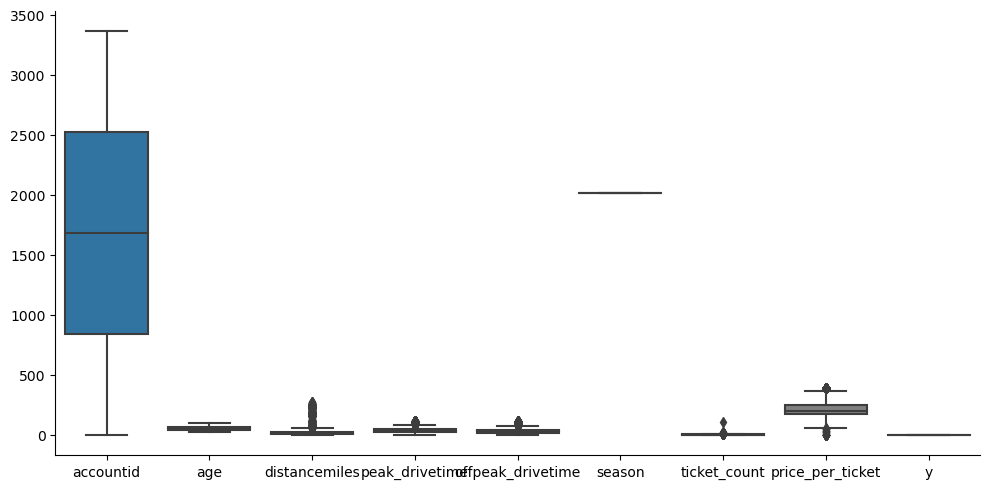

In [575]:
sns.catplot(data = df_copy, kind = 'box', aspect = 2)
plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


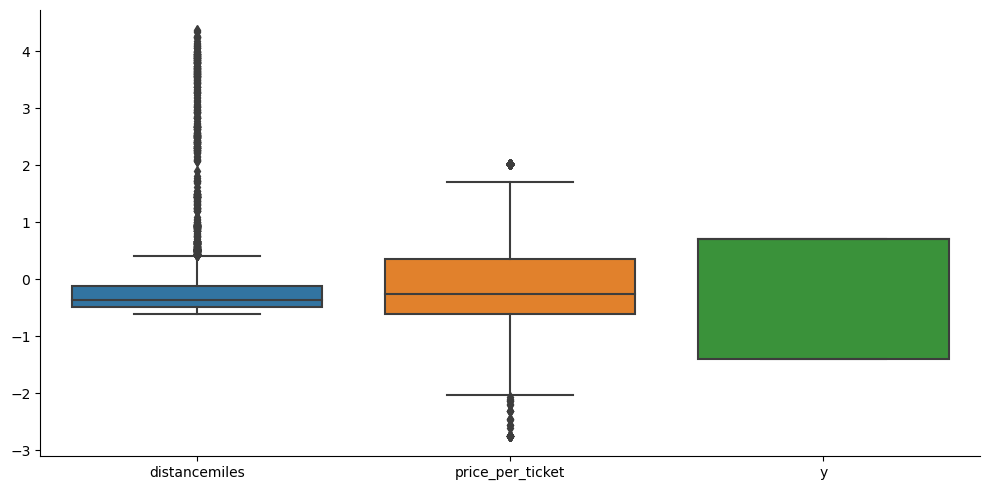

In [576]:
sns.catplot(data = df_NewFrame, kind = 'box', aspect = 2)
plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


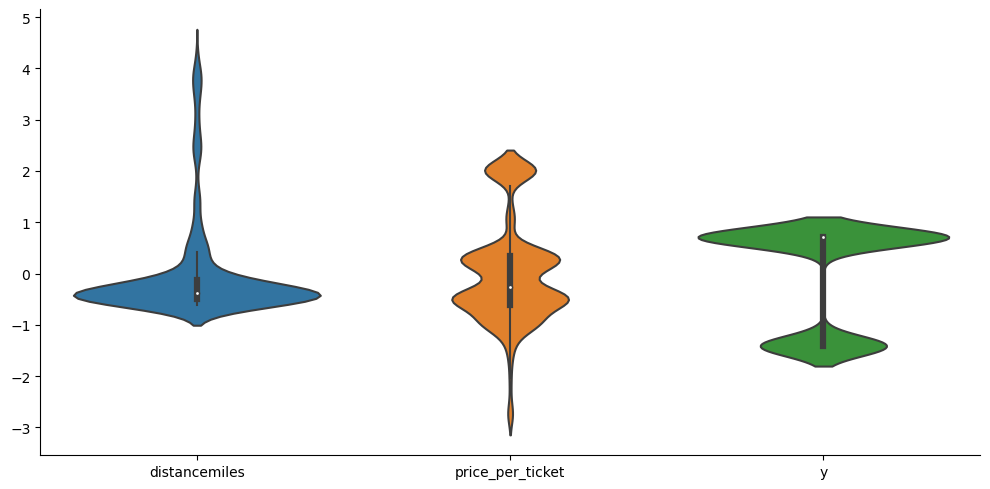

In [577]:
sns.catplot(data = df_NewFrame, kind = 'violin', aspect = 2)
plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


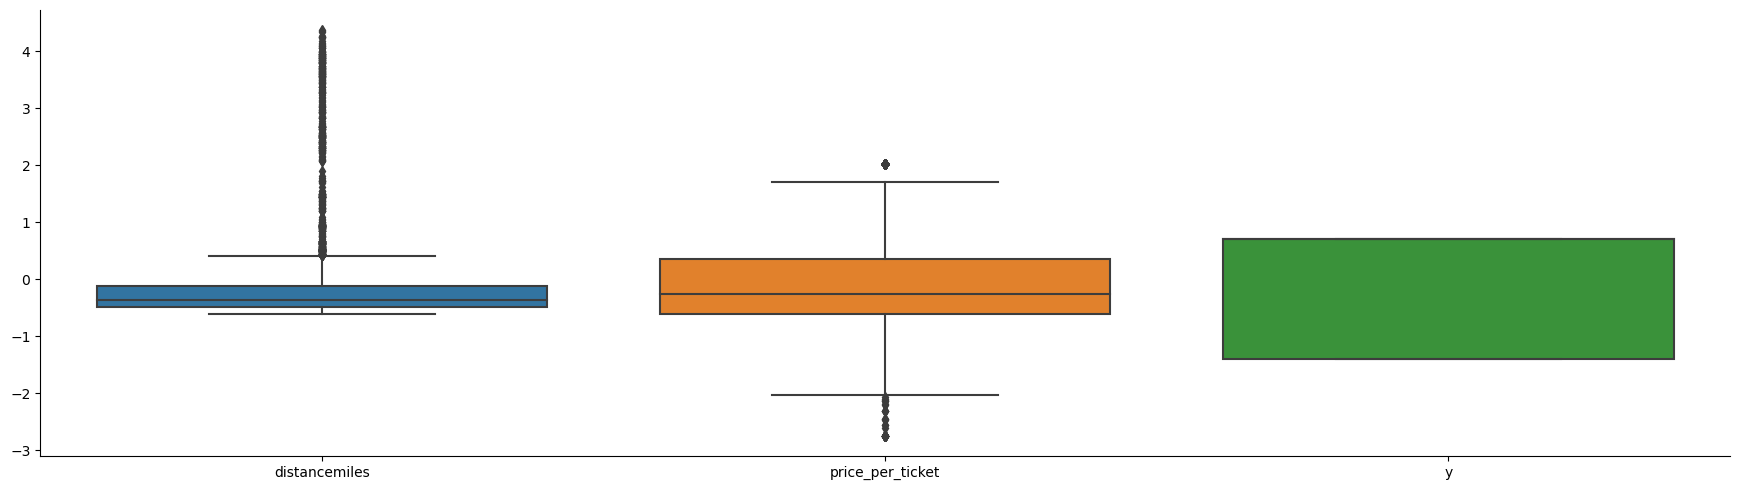

In [578]:
sns.catplot(data = pd.DataFrame(X, columns = df_features.columns), kind = 'box', aspect = 3.5)
plt.show()

In [579]:
X.shape

(3360, 3)

### KMeans

In [580]:
clusters_2 = KMeans(n_clusters= 2, random_state= 121, n_init= 25, max_iter = 500).fit_predict(X)

In [581]:
df_copy_drop_K = df_copy_cluster.copy()

In [582]:
df_copy_drop_K['k2'] = pd.Series(clusters_2, index = df_copy_drop_K.index).astype('category')

In [583]:
df_copy_drop_K.k2.value_counts()

k2
1    2233
0    1127
Name: count, dtype: int64

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


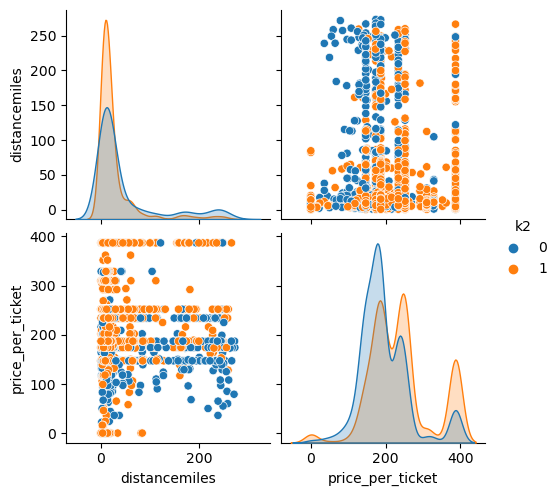

In [584]:
sns.pairplot(data = df_copy_drop_K, vars = ['distancemiles', 'price_per_ticket'],
             hue = 'k2', diag_kws = {'common_norm' : False})
plt.show()

Lets create a knee bend plot to see the optimal amount of clusters to use

In [585]:
tots_within = []

K = range(1, 31)

for k in K:
    km = KMeans(n_clusters = k, random_state = 121, n_init=25, max_iter= 500)
    km = km.fit(X)

    tots_within.append(km.inertia_)

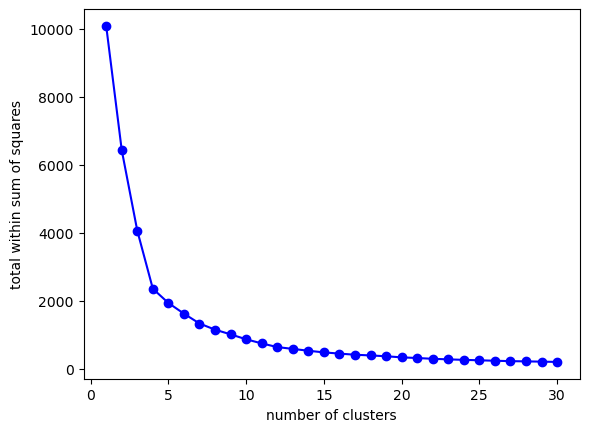

In [586]:
fig, ax = plt.subplots()

ax.plot(K, tots_within, 'bo-')
ax.set_xlabel('number of clusters')
ax.set_ylabel('total within sum of squares')

plt.show()

We will rewrite our cluster analysis but with 6 clusters instead of 2

In [587]:
clusters_6 = KMeans(n_clusters= 6, random_state= 121, n_init= 25, max_iter= 500).fit_predict(X)

In [588]:
df_copy_drop_K['k6'] = pd.Series(clusters_6, index = df_copy_drop_K.index).astype('category')

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


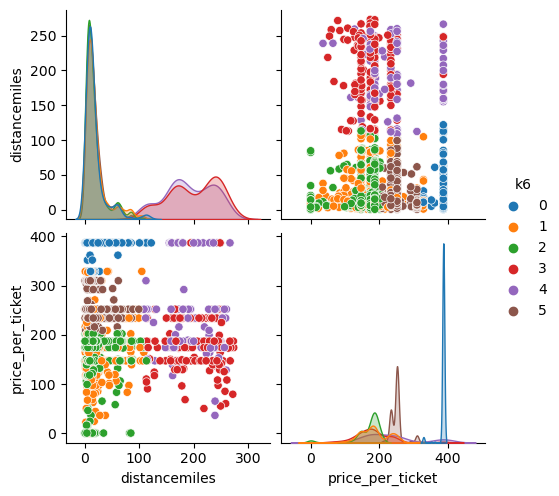

In [589]:
sns.pairplot(data = df_copy_drop_K, vars = ['distancemiles', 'price_per_ticket'],
             hue = 'k6', diag_kws = {'common_norm': False})
plt.show()

#### Cluster Analysis
* Cluster 0 represents local season ticket holders who live within 100 miles of the stadium. They tend to purchase higher-value tickets priced at 300 or more and are not sensitive to ticket prices.
* Cluster 1 is made up of season ticket holders residing 50 to 100 miles from the stadium. While they often purchase tickets in the 100 to 200 range, ticket prices vary more widely within this group. This cluster is a mix of local and non-local attendees who are generally less price-sensitive and willing to invest in mid- to high-priced tickets.
* Cluster 2 includes season ticket holders who reside closer to the stadium compared to Cluster 1. They exhibit a wider variety of ticket price purchases, reflecting diverse spending habits among local attendee
* Cluster 3 comprises season ticket holders who travel significant distances, typically 200 to 250 miles, to attend games. They often purchase tickets priced between 150 and 200, showing a preference for mid- to high-value options. These non-local attendees are willing to make longer journeys and invest in premium ticket experiences.
* Cluster 4 is characterized by non-local attendees who are more inclined to purchase higher-priced tickets than those in Cluster 3. This group may represent a segment of ticket buyers who, despite traveling long distances, are discerning about their spending and opt for premium seating options.
* Cluster 5 consists of attendees who travel moderate distances to attend games and typically buy tickets in the mid-price range. This group shows a balanced approach to spending, with a moderate sensitivity to ticket prices

In [590]:
df_copy_drop_K.k6.value_counts()

k6
2    941
1    888
5    796
0    446
3    172
4    117
Name: count, dtype: int64

In [591]:
df_copy_drop_K.dtypes

distancemiles         float64
direction              object
purchase_month         object
purchase_dow           object
price_type             object
price_level            object
price_per_ticket      float64
bin_age                object
lump_gender            object
lump_ticket_count      object
y                       int32
k2                   category
k6                   category
dtype: object

Now we will use heatmaps to show how well the CLUSTERS align with the known groupings

We will visualize the cluster assignments to unique values of several of the categorical inputs

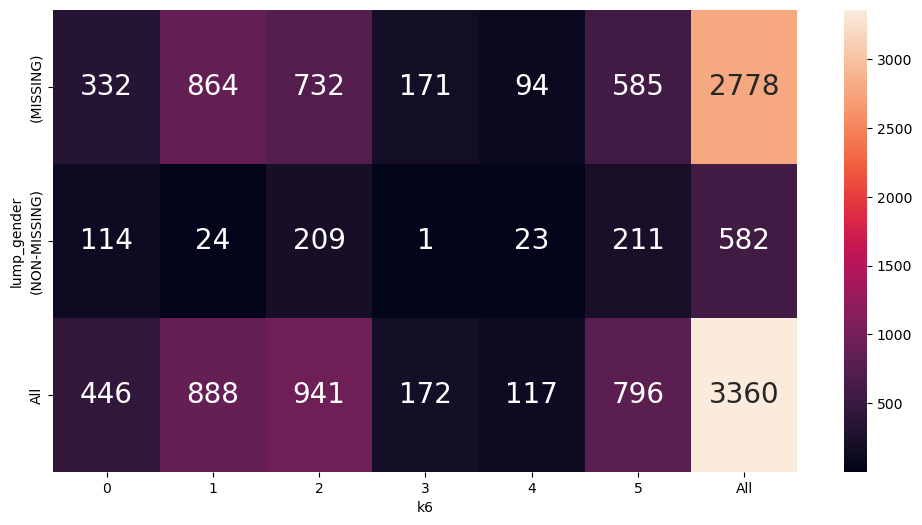

In [592]:
fig, ax = plt.subplots(figsize = (12, 6))
sns.heatmap(data = pd.crosstab(df_copy_drop_K.lump_gender, df_copy_drop_K.k6, margins = True),
            annot = True, annot_kws = {'fontsize': 20}, fmt = 'g',
            ax = ax)
plt.show()

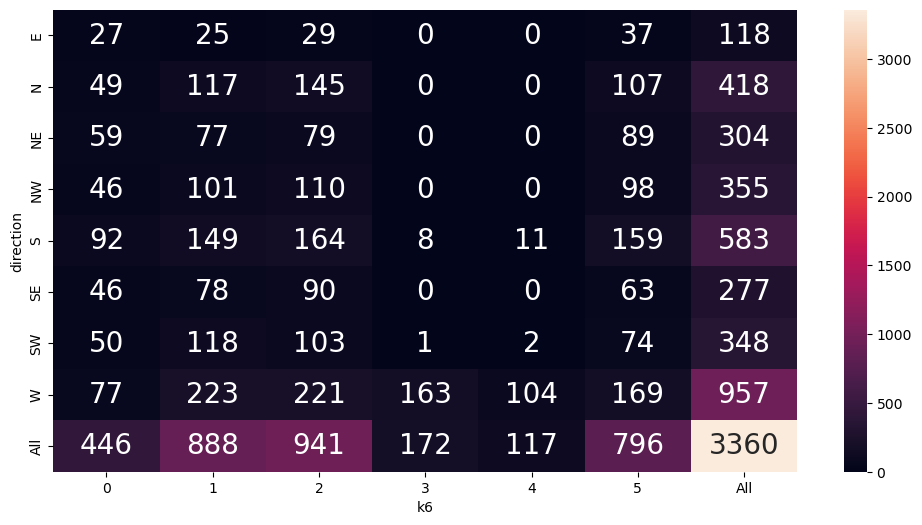

In [593]:
fig, ax = plt.subplots(figsize = (12, 6))
sns.heatmap(data = pd.crosstab(df_copy_drop_K.direction, df_copy_drop_K.k6, margins = True),
            annot = True, annot_kws = {'fontsize': 20}, fmt = 'g',
            ax = ax)
plt.show()

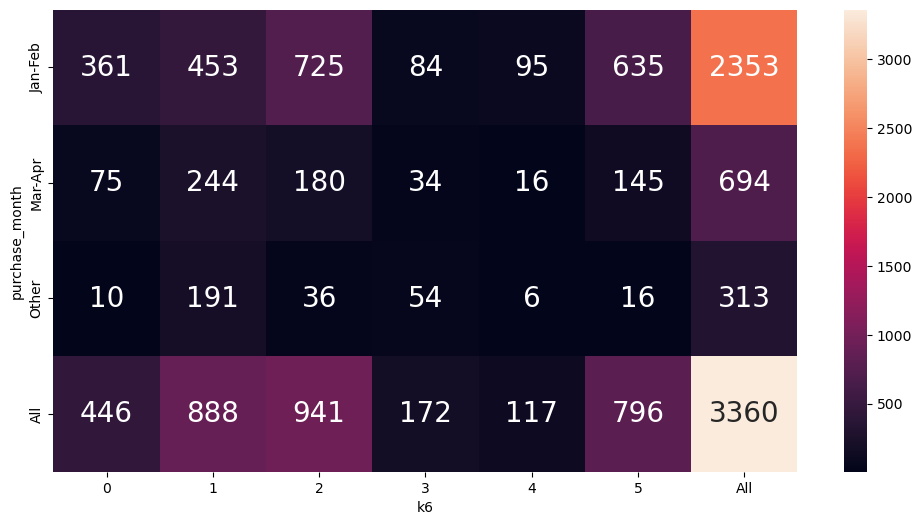

In [594]:
fig, ax = plt.subplots(figsize = (12, 6))
sns.heatmap(data = pd.crosstab(df_copy_drop_K.purchase_month, df_copy_drop_K.k6, margins = True),
            annot = True, annot_kws = {'fontsize': 20}, fmt = 'g',
            ax = ax)
plt.show()


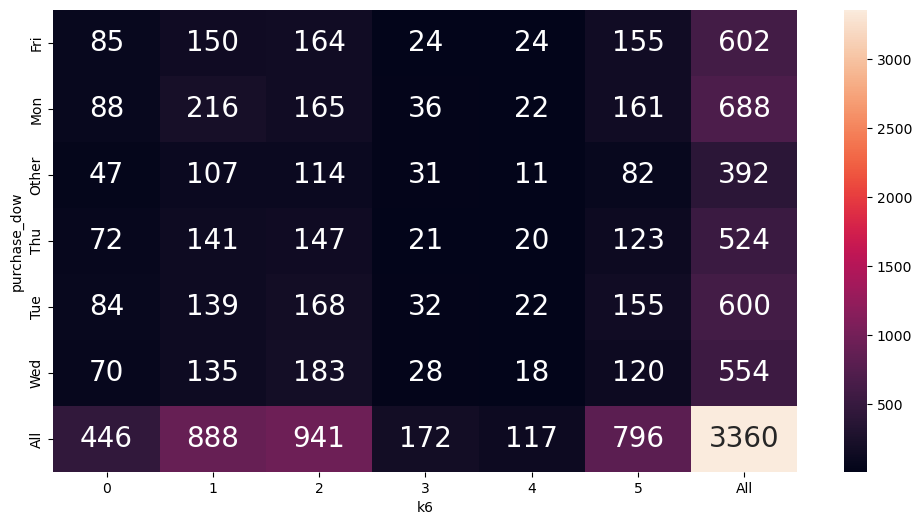

In [595]:
fig, ax = plt.subplots(figsize = (12, 6))
sns.heatmap(data = pd.crosstab(df_copy_drop_K.purchase_dow, df_copy_drop_K.k6, margins = True),
            annot = True, annot_kws = {'fontsize': 20}, fmt = 'g',
            ax = ax)
plt.show()

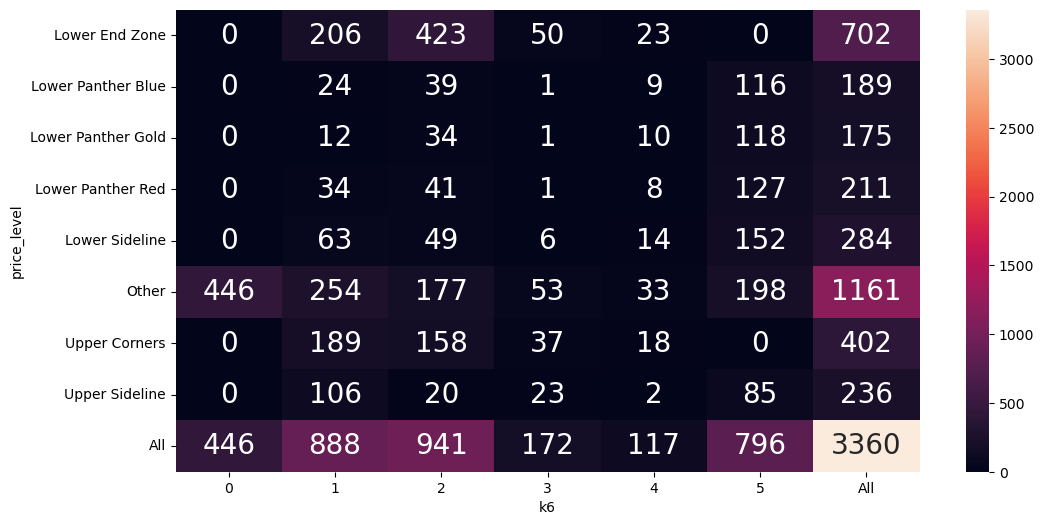

In [596]:
fig, ax = plt.subplots(figsize = (12, 6))
sns.heatmap(data = pd.crosstab(df_copy_drop_K.price_level, df_copy_drop_K.k6, margins = True),
            annot = True, annot_kws = {'fontsize': 20}, fmt = 'g',
            ax = ax)
plt.show()

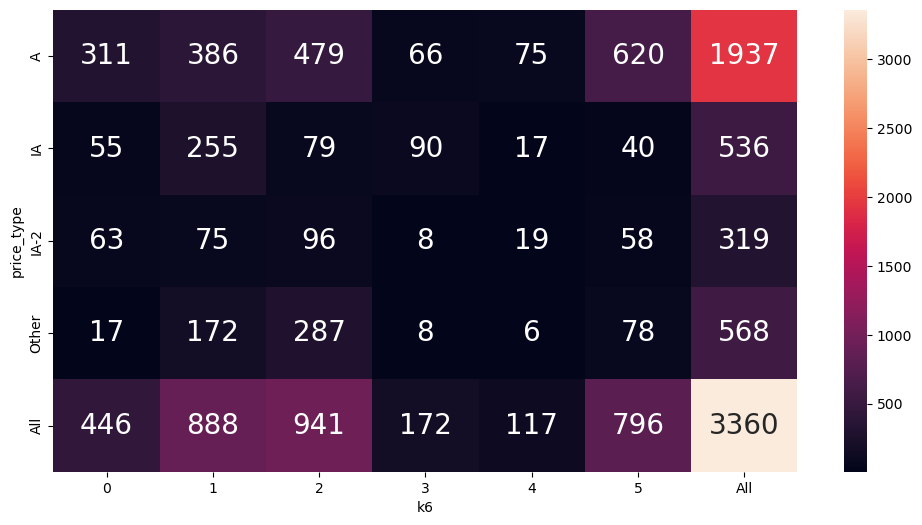

In [597]:
fig, ax = plt.subplots(figsize = (12, 6))
sns.heatmap(data = pd.crosstab(df_copy_drop_K.price_type, df_copy_drop_K.k6, margins = True),
            annot = True, annot_kws = {'fontsize': 20}, fmt = 'g',
            ax = ax)
plt.show()

Below we summarize the continious inputs associated with each of the cluster assignments

In [598]:
df_copy_drop_K.groupby('k6').describe()

distancemiles                                                             \
           count        mean        std         min         25%         50%   
k6                                                                            
0          446.0   17.750640  20.172686    0.613117    6.770554   11.312764   
1          888.0   19.909791  21.158695    0.193905    6.728310   12.963950   
2          941.0   17.816511  19.054494    0.156212    5.983651   11.208886   
3          172.0  199.985318  45.551670  112.665774  166.148222  204.386197   
4          117.0  191.222696  44.009782  108.848768  161.298245  189.125498   
5          796.0   18.015025  16.942423    0.429845    6.982587   12.727415   

                           price_per_ticket              ...                \
           75%         max            count        mean  ...    75%    max   
k6                                                       ...                 
0    18.188168  121.996164            446.0  385.170404  ...  387.0  387.0   
1    21.586004  108.968943            888.0  185.095045  ...  234.0  329.0   
2    20.210179  113.162773            941.0  166.672157  ...  187.0  202.0   
3   241.946315  273.287364            172.0  181.343023  ...  190.0  387.0   
4   230.876819  266.455917            117.0  233.811966  ...  252.0  387.0   
5    21.817288  102.649001            796.0  250.376256  ...  252.0  317.0   

        y                                              
    count     mean       std  min  25%  50%  75%  max  
k6                                                     
0   446.0  0.85426  0.353242  0.0  1.0  1.0  1.0  1.0  
1   888.0  0.00000  0.000000  0.0  0.0  0.0  0.0  0.0  
2   941.0  1.00000  0.000000  1.0  1.0  1.0  1.0  1.0  
3   172.0  0.00000  0.000000  0.0  0.0  0.0  0.0  0.0  
4   117.0  1.00000  0.000000  1.0  1.0  1.0  1.0  1.0  
5   796.0  1.00000  0.000000  1.0  1.0  1.0  1.0  1.0  

[6 rows x 24 columns]

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


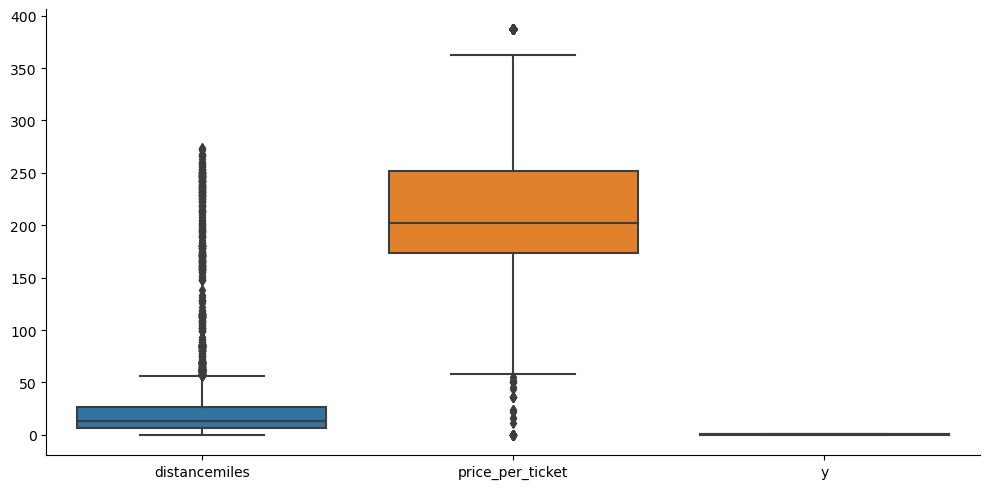

In [599]:
sns.catplot(data = df_copy_drop_K, kind = 'box', aspect= 2)
plt.show()

### PCA
Now we will perform PCA 

In [600]:
from sklearn.decomposition import PCA

In [601]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   distancemiles     3360 non-null   float64
 1   price_per_ticket  3360 non-null   float64
 2   y                 3360 non-null   int32  
dtypes: float64(2), int32(1)
memory usage: 65.8 KB


In [602]:
type(X)

numpy.ndarray

In [603]:
X.shape

(3360, 3)

In [604]:
pca_df = PCA(n_components=2).fit_transform(X)

In [605]:
type(pca_df)

numpy.ndarray

In [606]:
pca_df.shape

(3360, 2)

In [607]:
pca_df_new = pd.DataFrame(pca_df, columns = ['pc01', 'pc02'])

In [608]:
pca_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pc01    3360 non-null   float64
 1   pc02    3360 non-null   float64
dtypes: float64(2)
memory usage: 52.6 KB


D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


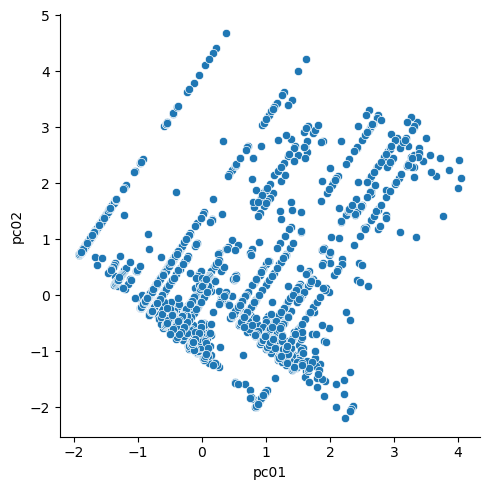

In [609]:
sns.relplot(data = pca_df_new, x='pc01', y='pc02')

plt.show()

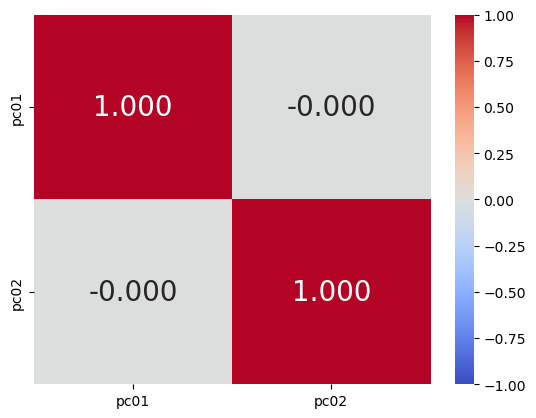

In [610]:
fig, ax = plt.subplots()

sns.heatmap( pca_df_new.corr(numeric_only=True),
             vmin=-1, vmax=1, center=0,
             cmap='coolwarm',
             annot=True, annot_kws={'fontsize': 20}, fmt='.3f',
             ax=ax)

plt.show()

In [611]:
df_copy_drop_K.dtypes

distancemiles         float64
direction              object
purchase_month         object
purchase_dow           object
price_type             object
price_level            object
price_per_ticket      float64
bin_age                object
lump_gender            object
lump_ticket_count      object
y                       int32
k2                   category
k6                   category
dtype: object

In [612]:
kmeans_pca = KMeans(n_clusters=6, random_state=121, n_init=25, max_iter=500).fit_predict(pca_df_new)

In [613]:
pca_df_new['k6'] = pd.Series(kmeans_pca, index = pca_df_new.index).astype('category')

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


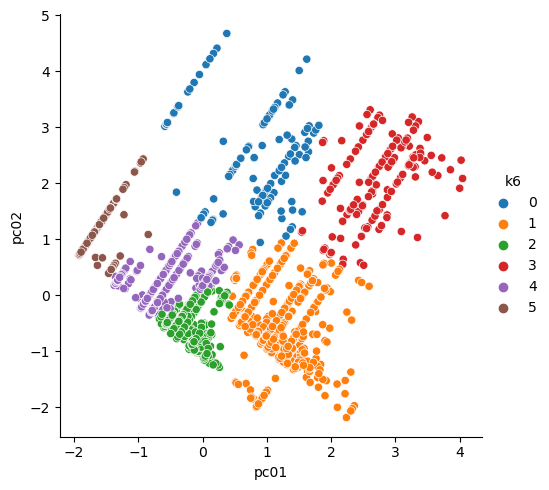

In [614]:
sns.relplot(data = pca_df_new, x='pc01', y='pc02', hue='k6')

plt.show()

### Comparison

We will compare the cluster assignments between clustering with the original variables and clustering based on PC scores


In [615]:
df_copy_drop_K['k_original'] = pd.Series(clusters_6, index=df_copy_drop_K.index).astype('category')

In [616]:
df_with_clusters = df_copy_drop_K[['k_original']].join(pca_df_new[['k6']])

In [617]:
crosstab = pd.crosstab(df_with_clusters['k_original'], df_with_clusters['k6'])

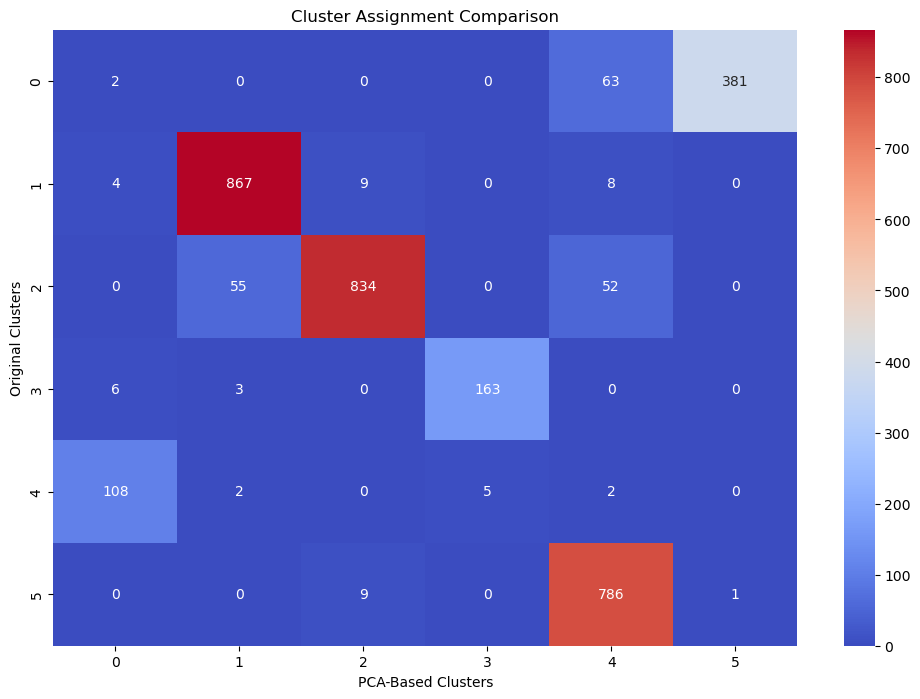

In [618]:
plt.figure(figsize=(12, 8))
sns.heatmap(data=crosstab, annot=True, cmap='coolwarm', fmt='g')
plt.title('Cluster Assignment Comparison')
plt.xlabel('PCA-Based Clusters')
plt.ylabel('Original Clusters')
plt.show()

To determine the optimal number of clusters, I used the elbow method and found that 6 clusters was the best choice. Next, I compared the clustering results from PCA components with those from the original variables. I did this by creating a cross-tabulation and visualizing the overlap using heatmaps. To further understand the cluster distributions, I used scatter plots to visualize the clusters in the PCA component space and pair plots to see how they were distributed across the original variables. This approach gave me a clear view of how the clusters align and are represented in both the reduced and original feature spaces.

## D. Fitting and Interpretation

In this analysis, we will fit logistic regression models to predict our target variable using statsmodels. Logistic regression is a powerful statistical method used for binary classification problems, where the goal is to predict the probability of a binary outcome based on one or more predictor variables. By fitting these models, we aim to understand the relationships between the predictor variables and the binary outcome, evaluate the performance of our model, and make informed predictions.


In [619]:
import statsmodels.formula.api as smf

In [620]:
df_copy_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   distancemiles      3360 non-null   float64
 1   direction          3360 non-null   object 
 2   purchase_month     3360 non-null   object 
 3   purchase_dow       3360 non-null   object 
 4   price_type         3360 non-null   object 
 5   price_level        3360 non-null   object 
 6   price_per_ticket   3360 non-null   float64
 7   bin_age            3360 non-null   object 
 8   lump_gender        3360 non-null   object 
 9   lump_ticket_count  3360 non-null   object 
 10  y                  3360 non-null   int32  
dtypes: float64(2), int32(1), object(8)
memory usage: 275.8+ KB


In [621]:
df_copy_dropped.y.value_counts()

y
1    2235
0    1125
Name: count, dtype: int64

### Fit the logistic regression model

In [622]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [623]:
fit_glm = smf.logit(formula = 'y ~ price_per_ticket', data = df_copy_dropped).fit()

Optimization terminated successfully.
         Current function value: 0.607047
         Iterations 5


In [624]:
fit_glm.params

Intercept          -0.840894
price_per_ticket    0.007086
dtype: float64

In [625]:
fit_glm.bse

Intercept           0.117559
price_per_ticket    0.000535
dtype: float64

In [626]:
fit_glm.pvalues

Intercept           8.494114e-13
price_per_ticket    5.494296e-40
dtype: float64

In [627]:
def my_coefplot(mod, figsize_use=(10, 4)):
    fig, ax = plt.subplots(figsize=figsize_use)
    
    ax.errorbar( y=mod.params.index,
                 x=mod.params,
                 xerr = 2 * mod.bse,
                 fmt='o', color='k', ecolor='k', elinewidth=2, ms=10)
    
    ax.axvline(x=0, linestyle='--', linewidth=3.5, color='grey')
    
    ax.set_xlabel('coefficient value')
    
    plt.show()

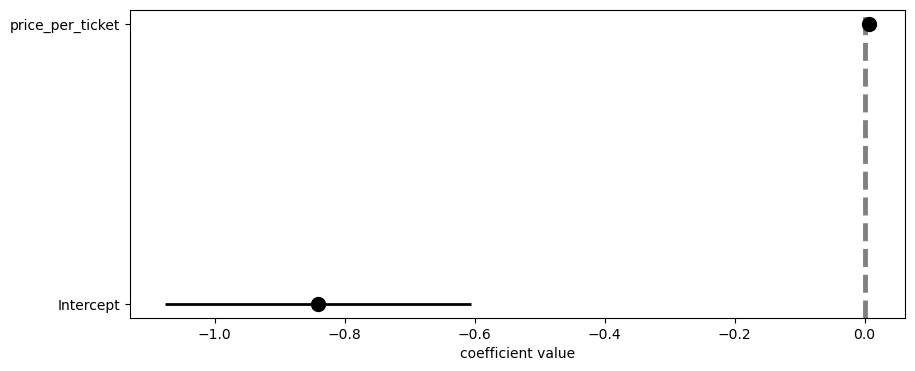

In [628]:
my_coefplot( fit_glm )

In [629]:
fit_glm2 = smf.logit(formula = 'y ~ distancemiles', data = df_copy_dropped).fit()

Optimization terminated successfully.
         Current function value: 0.623392
         Iterations 5


In [630]:
fit_glm2.params

Intercept        0.90994
distancemiles   -0.00628
dtype: float64

In [631]:
fit_glm2.bse

Intercept        0.043955
distancemiles    0.000655
dtype: float64

In [632]:
fit_glm2.pvalues

Intercept        3.351810e-95
distancemiles    9.253223e-22
dtype: float64

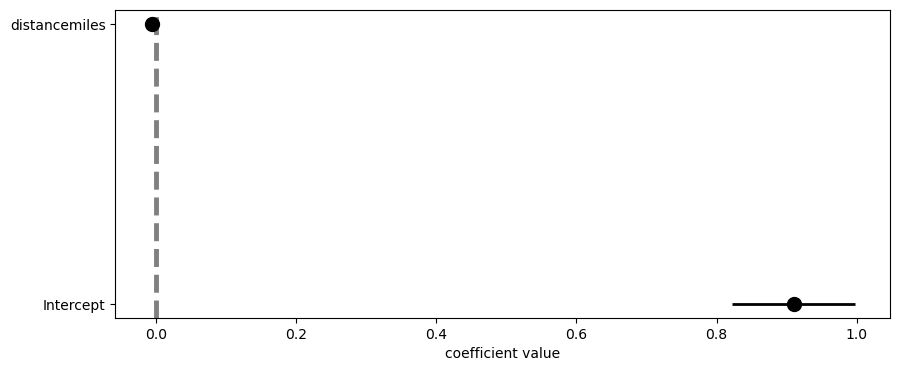

In [633]:
my_coefplot( fit_glm2 )

In [634]:
fit_glm3 = smf.logit(formula = 'y ~ direction', data = df_copy_dropped).fit()

Optimization terminated successfully.
         Current function value: 0.629853
         Iterations 5


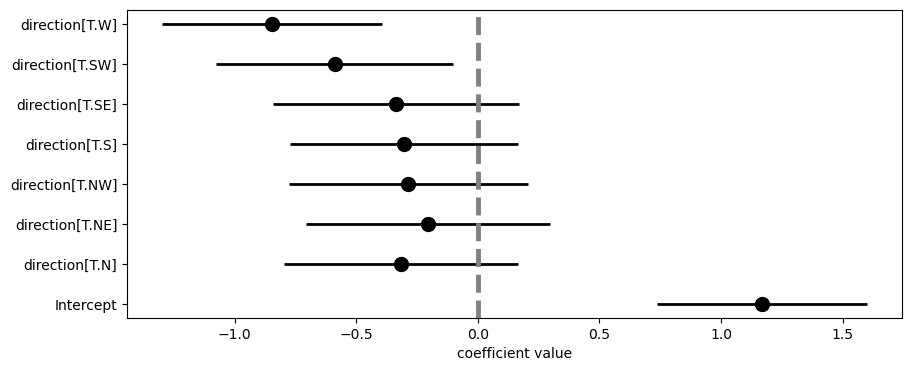

In [635]:
my_coefplot( fit_glm3 )

**As we see above these formulas dont yield any valuable information that we can use in our correlations! We need to create a function that allows us to calculate the performance of the training set**

In [636]:
scaler = StandardScaler()
df_copy_dropped[['distancemiles', 'price_per_ticket']] = scaler.fit_transform(df_copy_dropped[['distancemiles', 'price_per_ticket']])

In [637]:
def fit_and_assess_logistic(mod_name, a_formula, train_data, threshold):
    a_mod = smf.logit(formula=a_formula, data=train_data).fit()
    
    train_copy = train_data.copy()
    
    train_copy['pred_probability'] = a_mod.predict( train_data )
    
    train_copy['pred_class'] = np.where( train_copy.pred_probability > threshold, 1, 0 )
    
    TN, FP, FN, TP = confusion_matrix( train_copy.y.to_numpy(), train_copy.pred_class.to_numpy() ).ravel()
    
    Accuracy = (TN + TP) / (TN + FP + FN + TP)
    
    Sensitivity = (TP) / (TP + FN)
    
    Specificity = (TN) / (TN + FP)
    
    FPR = 1 - Specificity
    
    ROC_AUC = roc_auc_score( train_copy.y.to_numpy(), train_copy.pred_probability.to_numpy() )
    
    res_dict = {'model_name': mod_name,
                'model_formula': a_formula,
                'num_coefs': len( a_mod.params ),
                'threshold': threshold,
                'Accuracy': Accuracy,
                'Sensitivity': Sensitivity,
                'Specificity': Specificity,
                'FPR': FPR,
                'ROC_AUC': ROC_AUC}
    
    return pd.DataFrame( res_dict, index=[0] )

In [638]:
fit_and_assess_logistic(0, 'y ~ distancemiles', train_data = df_copy_dropped, threshold = 0.5)

Optimization terminated successfully.
         Current function value: 0.623392
         Iterations 5


model_name      model_formula  num_coefs  threshold  Accuracy  Sensitivity  \
0           0  y ~ distancemiles          2        0.5   0.68006      0.95481   

   Specificity       FPR   ROC_AUC  
0     0.134222  0.865778  0.564813

In [639]:
formulas_list = [
    'y ~ 1',  
    'y ~ direction + purchase_month + purchase_dow + price_type + price_level + bin_age + lump_gender + lump_ticket_count',  
    'y ~ distancemiles + price_per_ticket',  
    'y ~ distancemiles + price_per_ticket + direction + purchase_month + purchase_dow + price_type + price_level + bin_age + lump_gender + lump_ticket_count',  
    'y ~ distancemiles * price_per_ticket + np.power(distancemiles, 2) + np.power(price_per_ticket, 2)',  
    'y ~ (direction + purchase_month + purchase_dow + price_type + price_level + bin_age + lump_gender + lump_ticket_count) * (distancemiles + price_per_ticket)',  
    
    'y ~ direction * (distancemiles + np.power(distancemiles, 2)) + purchase_month * (price_per_ticket + np.power(price_per_ticket, 2))',
    
    'y ~ distancemiles + direction + purchase_month + purchase_dow + price_type + price_level + price_per_ticket + bin_age + lump_gender + lump_ticket_count',  
    'y ~ distancemiles * (direction + purchase_month + purchase_dow + price_type + price_level + price_per_ticket + bin_age + lump_gender + lump_ticket_count)',  
    'y ~ (distancemiles + price_per_ticket) ** 2'  
]

In [640]:
formulas_list[0]

'y ~ 1'

In [641]:
formulas_list[1]

'y ~ direction + purchase_month + purchase_dow + price_type + price_level + bin_age + lump_gender + lump_ticket_count'

In [642]:
results_list = []

for m in range(len(formulas_list)):
    results_list.append( fit_and_assess_logistic(m, formulas_list[m], train_data = df_copy_dropped, threshold=0.5) )

Optimization terminated successfully.
         Current function value: 0.637541
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.477232
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.595201
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.462632
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.593647
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.444637
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.539675
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.462632
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.454152
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.594163
  

In [643]:
len(results_list)

10

In [644]:
results_list[0]

model_name model_formula  num_coefs  threshold  Accuracy  Sensitivity  \
0           0         y ~ 1          1        0.5  0.665179          1.0   

   Specificity  FPR  ROC_AUC  
0          0.0  1.0      0.5

In [645]:
results_list[ 1 ]

model_name                                      model_formula  num_coefs  \
0           1  y ~ direction + purchase_month + purchase_dow ...         32   

   threshold  Accuracy  Sensitivity  Specificity       FPR   ROC_AUC  
0        0.5  0.769048     0.899329     0.510222  0.489778  0.823494

In [646]:
results_df = pd.concat( results_list, ignore_index=True )

In [647]:
results_df

model_name                                      model_formula  num_coefs  \
0           0                                              y ~ 1          1   
1           1  y ~ direction + purchase_month + purchase_dow ...         32   
2           2               y ~ distancemiles + price_per_ticket          3   
3           3  y ~ distancemiles + price_per_ticket + directi...         34   
4           4  y ~ distancemiles * price_per_ticket + np.powe...          6   
5           5  y ~ (direction + purchase_month + purchase_dow...         96   
6           6  y ~ direction * (distancemiles + np.power(dist...         32   
7           7  y ~ distancemiles + direction + purchase_month...         34   
8           8  y ~ distancemiles * (direction + purchase_mont...         66   
9           9        y ~ (distancemiles + price_per_ticket) ** 2          4   

   threshold  Accuracy  Sensitivity  Specificity       FPR   ROC_AUC  
0        0.5  0.665179     1.000000     0.000000  1.000000  0.500000  
1        0.5  0.769048     0.899329     0.510222  0.489778  0.823494  
2        0.5  0.683631     0.940492     0.173333  0.826667  0.687901  
3        0.5  0.787798     0.900224     0.564444  0.435556  0.835702  
4        0.5  0.681548     0.944072     0.160000  0.840000  0.688374  
5        0.5  0.791369     0.898881     0.577778  0.422222  0.849952  
6        0.5  0.744940     0.913647     0.409778  0.590222  0.753561  
7        0.5  0.787798     0.900224     0.564444  0.435556  0.835702  
8        0.5  0.786310     0.896644     0.567111  0.432889  0.841075  
9        0.5  0.686607     0.944072     0.175111  0.824889  0.687910

In [648]:
results_df.sort_values(by=['Accuracy'], ascending=False)

model_name                                      model_formula  num_coefs  \
5           5  y ~ (direction + purchase_month + purchase_dow...         96   
3           3  y ~ distancemiles + price_per_ticket + directi...         34   
7           7  y ~ distancemiles + direction + purchase_month...         34   
8           8  y ~ distancemiles * (direction + purchase_mont...         66   
1           1  y ~ direction + purchase_month + purchase_dow ...         32   
6           6  y ~ direction * (distancemiles + np.power(dist...         32   
9           9        y ~ (distancemiles + price_per_ticket) ** 2          4   
2           2               y ~ distancemiles + price_per_ticket          3   
4           4  y ~ distancemiles * price_per_ticket + np.powe...          6   
0           0                                              y ~ 1          1   

   threshold  Accuracy  Sensitivity  Specificity       FPR   ROC_AUC  
5        0.5  0.791369     0.898881     0.577778  0.422222  0.849952  
3        0.5  0.787798     0.900224     0.564444  0.435556  0.835702  
7        0.5  0.787798     0.900224     0.564444  0.435556  0.835702  
8        0.5  0.786310     0.896644     0.567111  0.432889  0.841075  
1        0.5  0.769048     0.899329     0.510222  0.489778  0.823494  
6        0.5  0.744940     0.913647     0.409778  0.590222  0.753561  
9        0.5  0.686607     0.944072     0.175111  0.824889  0.687910  
2        0.5  0.683631     0.940492     0.173333  0.826667  0.687901  
4        0.5  0.681548     0.944072     0.160000  0.840000  0.688374  
0        0.5  0.665179     1.000000     0.000000  1.000000  0.500000

In [649]:
results_df.sort_values(by=['ROC_AUC'], ascending=False)

model_name                                      model_formula  num_coefs  \
5           5  y ~ (direction + purchase_month + purchase_dow...         96   
8           8  y ~ distancemiles * (direction + purchase_mont...         66   
3           3  y ~ distancemiles + price_per_ticket + directi...         34   
7           7  y ~ distancemiles + direction + purchase_month...         34   
1           1  y ~ direction + purchase_month + purchase_dow ...         32   
6           6  y ~ direction * (distancemiles + np.power(dist...         32   
4           4  y ~ distancemiles * price_per_ticket + np.powe...          6   
9           9        y ~ (distancemiles + price_per_ticket) ** 2          4   
2           2               y ~ distancemiles + price_per_ticket          3   
0           0                                              y ~ 1          1   

   threshold  Accuracy  Sensitivity  Specificity       FPR   ROC_AUC  
5        0.5  0.791369     0.898881     0.577778  0.422222  0.849952  
8        0.5  0.786310     0.896644     0.567111  0.432889  0.841075  
3        0.5  0.787798     0.900224     0.564444  0.435556  0.835702  
7        0.5  0.787798     0.900224     0.564444  0.435556  0.835702  
1        0.5  0.769048     0.899329     0.510222  0.489778  0.823494  
6        0.5  0.744940     0.913647     0.409778  0.590222  0.753561  
4        0.5  0.681548     0.944072     0.160000  0.840000  0.688374  
9        0.5  0.686607     0.944072     0.175111  0.824889  0.687910  
2        0.5  0.683631     0.940492     0.173333  0.826667  0.687901  
0        0.5  0.665179     1.000000     0.000000  1.000000  0.500000

In [650]:
results_list[5]

model_name                                      model_formula  num_coefs  \
0           5  y ~ (direction + purchase_month + purchase_dow...         96   

   threshold  Accuracy  Sensitivity  Specificity       FPR   ROC_AUC  
0        0.5  0.791369     0.898881     0.577778  0.422222  0.849952

Since we now have the accuracy and the ROC_AUC of the training set we can now visualize the performance

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


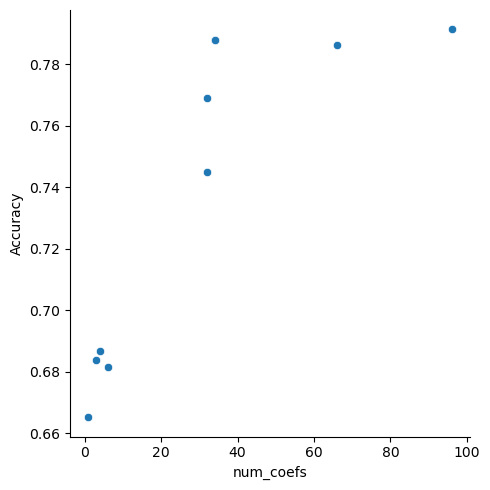

In [651]:
sns.relplot(data = results_df, x='num_coefs', y='Accuracy', kind='scatter')

plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


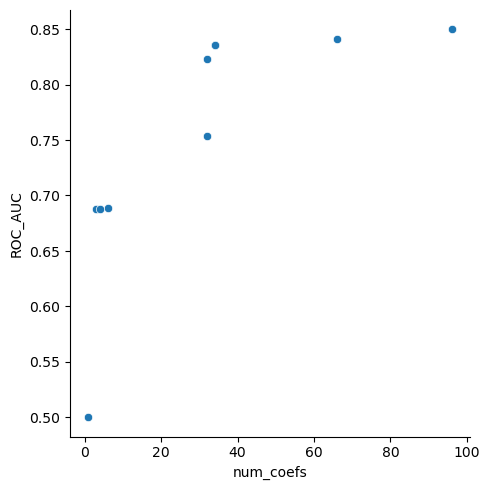

In [652]:
sns.relplot(data = results_df, x='num_coefs', y='ROC_AUC', kind='scatter')

plt.show()

In [653]:
def fit_logistic_make_roc(mod_name, a_formula, train_data):
    a_mod = smf.logit(formula=a_formula, data=train_data).fit()
    
    train_copy = train_data.copy()
    
    train_copy['pred_probability'] = a_mod.predict( train_data )
    
    fpr, tpr, threshold = roc_curve( train_data.y.to_numpy(), train_copy.pred_probability.to_numpy() )
    
    res_df = pd.DataFrame({'tpr': tpr,
                           'fpr': fpr,
                           'threshold': threshold})
    
    res_df['model_name'] = mod_name
    res_df['model_formula'] = a_formula
    
    return res_df
roc_list = []

In [654]:
roc_list = []

for m in range( len(formulas_list) ):
    roc_list.append( fit_logistic_make_roc( m, formulas_list[m], train_data=df_copy_dropped))

Optimization terminated successfully.
         Current function value: 0.637541
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.477232
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.595201
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.462632
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.593647
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.444637
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.539675
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.462632
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.454152
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.594163
  

In [655]:
roc_df = pd.concat( roc_list, ignore_index=True )

In [656]:
roc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10513 entries, 0 to 10512
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tpr            10513 non-null  float64
 1   fpr            10513 non-null  float64
 2   threshold      10513 non-null  float64
 3   model_name     10513 non-null  int64  
 4   model_formula  10513 non-null  object 
dtypes: float64(3), int64(1), object(1)
memory usage: 410.8+ KB


In [657]:
roc_df

tpr       fpr  threshold  model_name  \
0      0.000000  0.000000        inf           0   
1      1.000000  1.000000   0.665179           0   
2      0.000000  0.000000        inf           1   
3      0.000447  0.000000   0.997641           1   
4      0.001342  0.000000   0.996941           1   
...         ...       ...        ...         ...   
10508  0.999105  0.991111   0.151282           9   
10509  0.999105  0.997333   0.087556           9   
10510  0.999553  0.997333   0.086148           9   
10511  0.999553  1.000000   0.067930           9   
10512  1.000000  1.000000   0.061347           9   

                                           model_formula  
0                                                  y ~ 1  
1                                                  y ~ 1  
2      y ~ direction + purchase_month + purchase_dow ...  
3      y ~ direction + purchase_month + purchase_dow ...  
4      y ~ direction + purchase_month + purchase_dow ...  
...                                                  ...  
10508        y ~ (distancemiles + price_per_ticket) ** 2  
10509        y ~ (distancemiles + price_per_ticket) ** 2  
10510        y ~ (distancemiles + price_per_ticket) ** 2  
10511        y ~ (distancemiles + price_per_ticket) ** 2  
10512        y ~ (distancemiles + price_per_ticket) ** 2  

[10513 rows x 5 columns]

Visualizing ROC curve

In [658]:
roc_df['model_name'] = roc_df.model_name.astype('category')

In [659]:
roc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10513 entries, 0 to 10512
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   tpr            10513 non-null  float64 
 1   fpr            10513 non-null  float64 
 2   threshold      10513 non-null  float64 
 3   model_name     10513 non-null  category
 4   model_formula  10513 non-null  object  
dtypes: category(1), float64(3), object(1)
memory usage: 339.3+ KB


D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


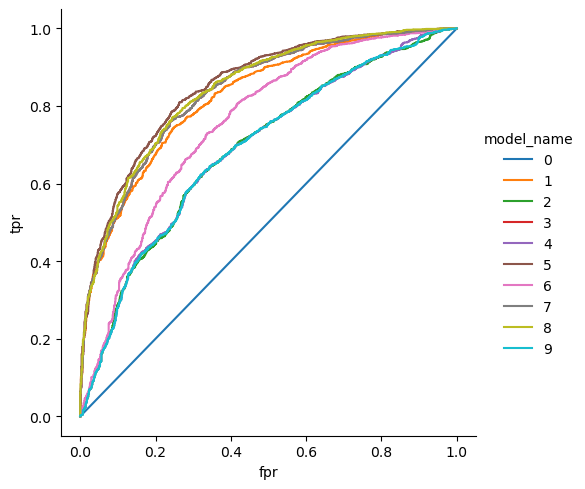

In [660]:
sns.relplot(data = roc_df, x='fpr', y='tpr', hue='model_name',
            kind='line', estimator=None, units='model_name')

plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


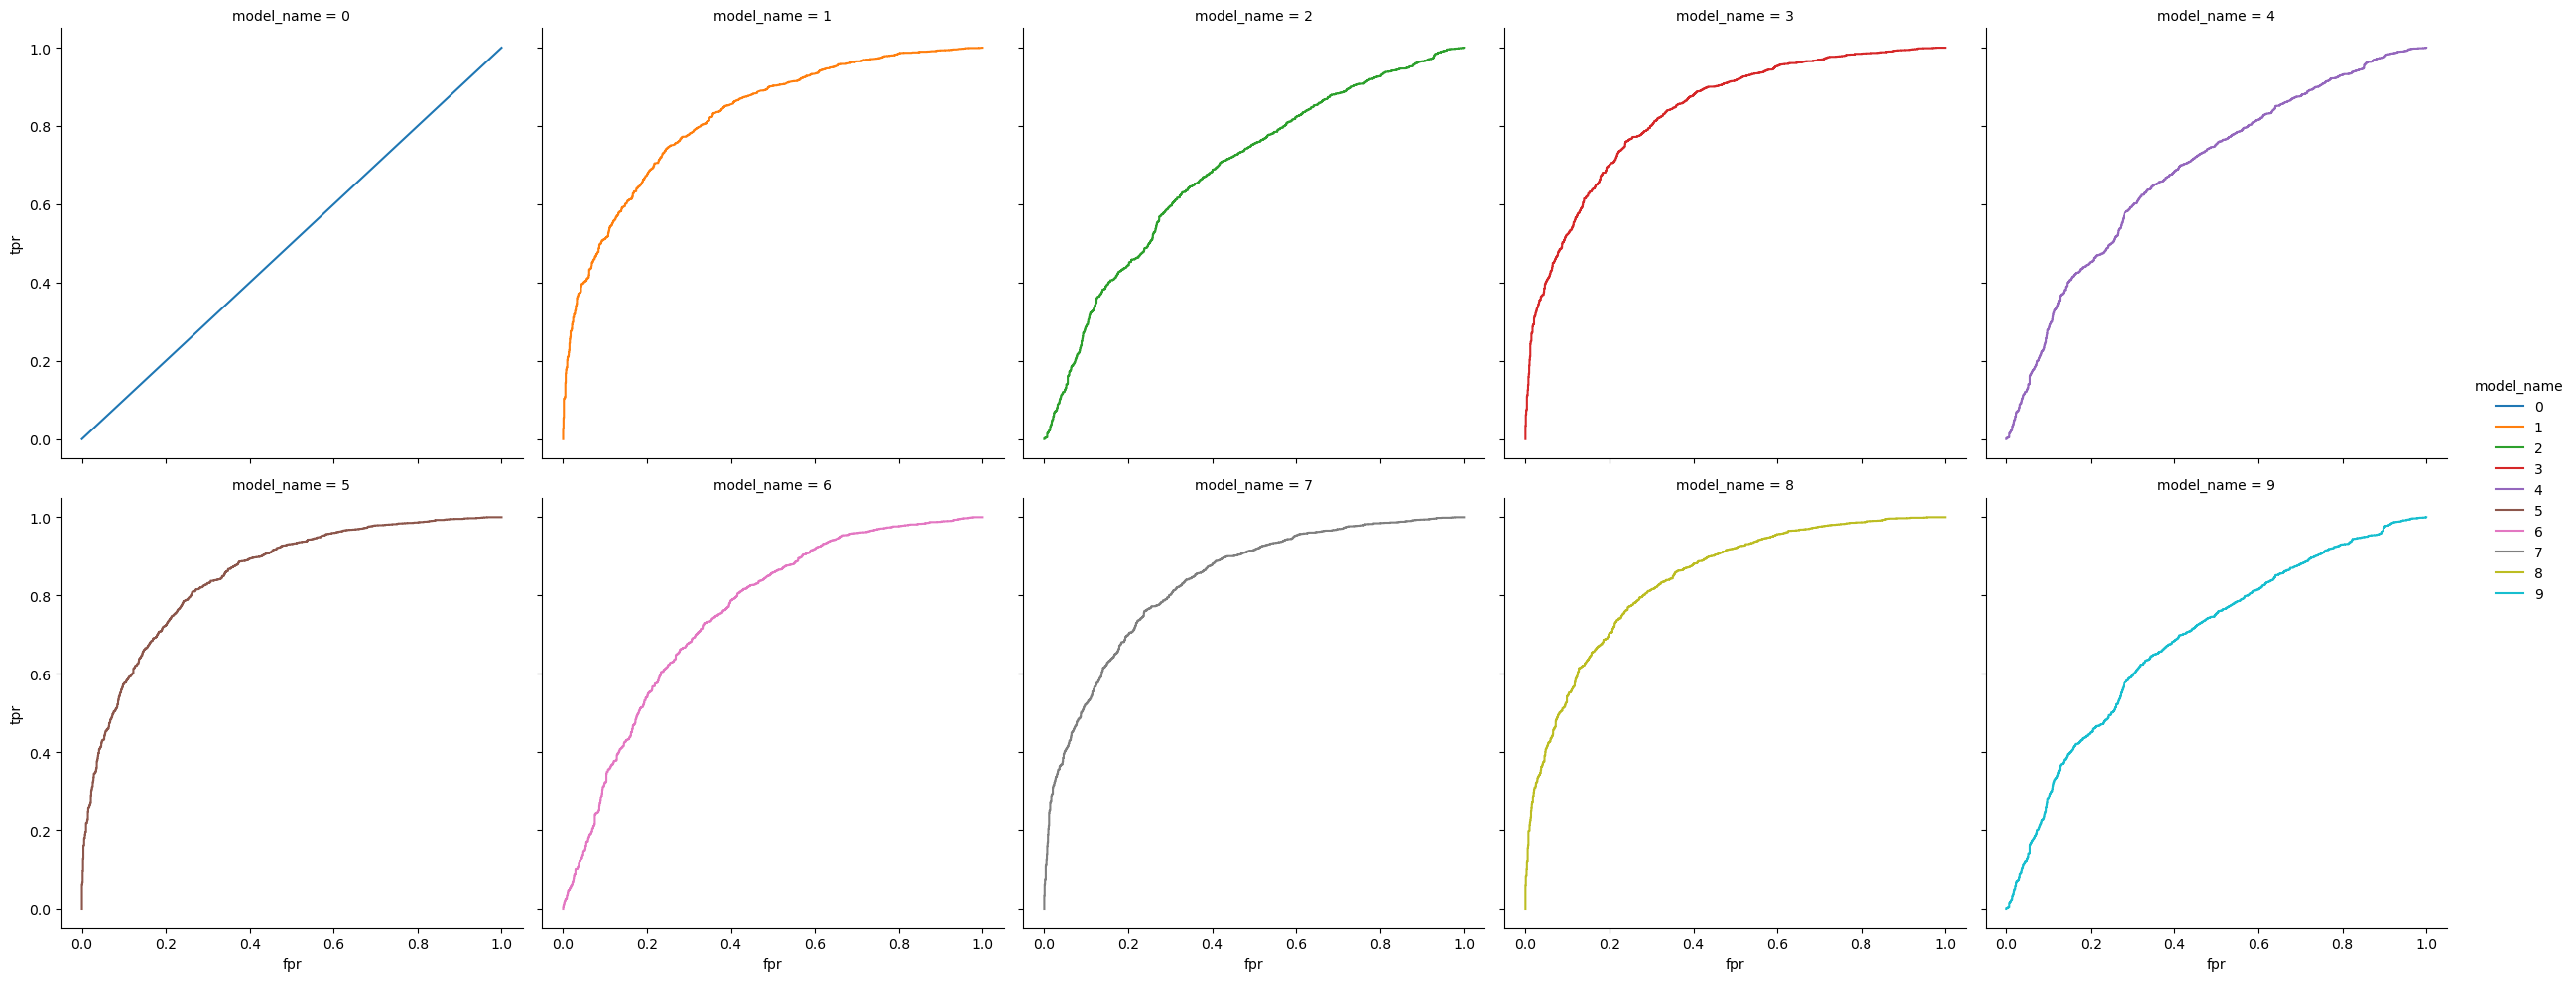

In [661]:
sns.relplot(data = roc_df, x='fpr', y='tpr', hue='model_name',
            kind='line', estimator=None, units='model_name',
            col='model_name', col_wrap=5)

plt.show()

In [662]:
def fit_logistic_and_summarize(mod_name, a_formula, train_data):
    a_mod = smf.logit(formula=a_formula, data=train_data).fit()
    summary_df = a_mod.summary2().tables[1]  # Extract summary table
    summary_df['model_name'] = mod_name
    summary_df['model_formula'] = a_formula
    return summary_df

In [663]:
summary_list = []
for m in range(len(formulas_list)):
    summary_list.append(fit_logistic_and_summarize(m, formulas_list[m], train_data=df_copy_dropped))

Optimization terminated successfully.
         Current function value: 0.637541
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.477232
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.595201
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.462632
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.593647
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.444637
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.539675
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.462632
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.454152
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.594163
  

In [664]:
summary_df = pd.concat(summary_list, ignore_index=True)

In [665]:
summary_df.head()

Coef.  Std.Err.          z         P>|z|    [0.025    0.975]  \
0  0.686458  0.036556  18.778439  1.133650e-78  0.614810  0.758106   
1  0.995112  0.341433   2.914520  3.562365e-03  0.325916  1.664308   
2 -0.129607  0.278104  -0.466038  6.411880e-01 -0.674681  0.415467   
3 -0.240924  0.290798  -0.828493  4.073914e-01 -0.810878  0.329030   
4 -0.168819  0.283826  -0.594797  5.519791e-01 -0.725106  0.387469   

   model_name                                      model_formula  
0           0                                              y ~ 1  
1           1  y ~ direction + purchase_month + purchase_dow ...  
2           1  y ~ direction + purchase_month + purchase_dow ...  
3           1  y ~ direction + purchase_month + purchase_dow ...  
4           1  y ~ direction + purchase_month + purchase_dow ...

In [666]:
significant_coefs_df = summary_df[summary_df['P>|z|'] < 0.5]

In [667]:
significant_coefs_df['sign'] = np.where(significant_coefs_df['Coef.'] > 0, 'positive', 'negative')

C:\Users\milan\AppData\Local\Temp\ipykernel_15056\1037822074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  significant_coefs_df['sign'] = np.where(significant_coefs_df['Coef.'] > 0, 'positive', 'negative')


In [668]:
top_two_coefs_df = significant_coefs_df.reindex(significant_coefs_df['Coef.'].abs().sort_values(ascending=False).index).head(2)

In [669]:
print(f"How many coefficients were estimated: {summary_df.shape[0]}")

How many coefficients were estimated: 308


In [670]:
print(f"How many coefficients are STATISTICALLY SIGNIFIGANT using commonly accepted thresholds?: {significant_coefs_df.shape[0]}")

How many coefficients are STATISTICALLY SIGNIFIGANT using commonly accepted thresholds?: 235


In [671]:
print(f"WHICH coefficients are STATISTICALLY SIGNIFIGANT and what are the coefficients POSITIVE or NEGATIVE for those features\n{significant_coefs_df[['Coef.', 'P>|z|', 'sign']]}")

WHICH coefficients are STATISTICALLY SIGNIFIGANT and what are the coefficients POSITIVE or NEGATIVE for those features
        Coef.         P>|z|      sign
0    0.686458  1.133650e-78  positive
1    0.995112  3.562365e-03  positive
3   -0.240924  4.073914e-01  negative
5   -0.209788  4.382694e-01  negative
7   -0.366888  1.914899e-01  negative
..        ...           ...       ...
303  0.208609  3.455279e-03  positive
304  0.754061  5.510935e-83  positive
305 -0.294361  3.791791e-13  negative
306  0.566438  6.730614e-38  positive
307  0.124434  1.260441e-02  positive

[235 rows x 3 columns]


In [672]:
print(f"Which two STATISTICALLY SIGNIFIGANT coefficients have the highest MAGNITUDE coefficient values?:\n{top_two_coefs_df[['Coef.', 'P>|z|', 'sign']]}")

Which two STATISTICALLY SIGNIFIGANT coefficients have the highest MAGNITUDE coefficient values?:
         Coef.     P>|z|      sign
191 -27.490269  0.357948  negative
194 -22.763192  0.444121  negative


In [673]:
results_df.sort_values(by=['Accuracy'], ascending=False)

model_name                                      model_formula  num_coefs  \
5           5  y ~ (direction + purchase_month + purchase_dow...         96   
3           3  y ~ distancemiles + price_per_ticket + directi...         34   
7           7  y ~ distancemiles + direction + purchase_month...         34   
8           8  y ~ distancemiles * (direction + purchase_mont...         66   
1           1  y ~ direction + purchase_month + purchase_dow ...         32   
6           6  y ~ direction * (distancemiles + np.power(dist...         32   
9           9        y ~ (distancemiles + price_per_ticket) ** 2          4   
2           2               y ~ distancemiles + price_per_ticket          3   
4           4  y ~ distancemiles * price_per_ticket + np.powe...          6   
0           0                                              y ~ 1          1   

   threshold  Accuracy  Sensitivity  Specificity       FPR   ROC_AUC  
5        0.5  0.791369     0.898881     0.577778  0.422222  0.849952  
3        0.5  0.787798     0.900224     0.564444  0.435556  0.835702  
7        0.5  0.787798     0.900224     0.564444  0.435556  0.835702  
8        0.5  0.786310     0.896644     0.567111  0.432889  0.841075  
1        0.5  0.769048     0.899329     0.510222  0.489778  0.823494  
6        0.5  0.744940     0.913647     0.409778  0.590222  0.753561  
9        0.5  0.686607     0.944072     0.175111  0.824889  0.687910  
2        0.5  0.683631     0.940492     0.173333  0.826667  0.687901  
4        0.5  0.681548     0.944072     0.160000  0.840000  0.688374  
0        0.5  0.665179     1.000000     0.000000  1.000000  0.500000

In [674]:
df_copy_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   distancemiles      3360 non-null   float64
 1   direction          3360 non-null   object 
 2   purchase_month     3360 non-null   object 
 3   purchase_dow       3360 non-null   object 
 4   price_type         3360 non-null   object 
 5   price_level        3360 non-null   object 
 6   price_per_ticket   3360 non-null   float64
 7   bin_age            3360 non-null   object 
 8   lump_gender        3360 non-null   object 
 9   lump_ticket_count  3360 non-null   object 
 10  y                  3360 non-null   int32  
dtypes: float64(2), int32(1), object(8)
memory usage: 275.8+ KB


In [675]:
def fit_and_assess_logistic_with_cm(mod_name, a_formula, train_data, threshold):
    a_mod = smf.logit(formula=a_formula, data=train_data).fit()
    
    train_copy = train_data.copy()
    
    train_copy['pred_probability'] = a_mod.predict(train_data)
    train_copy['pred_class'] = np.where(train_copy.pred_probability > threshold, 1, 0)
    
    TN, FP, FN, TP = confusion_matrix(train_copy.y.to_numpy(), train_copy.pred_class.to_numpy()).ravel()
    
    Accuracy = (TN + TP) / (TN + FP + FN + TP)
    Sensitivity = TP / (TP + FN)
    Specificity = TN / (TN + FP)
    FPR = 1 - Specificity
    ROC_AUC = roc_auc_score(train_copy.y.to_numpy(), train_copy.pred_probability.to_numpy())
    
    res_dict = {
        'model_name': mod_name,
        'model_formula': a_formula,
        'num_coefs': len(a_mod.params),
        'threshold': threshold,
        'Accuracy': Accuracy,
        'Sensitivity': Sensitivity,
        'Specificity': Specificity,
        'FPR': FPR,
        'ROC_AUC': ROC_AUC,
        'TN': TN,
        'FP': FP,
        'FN': FN,
        'TP': TP
    }
    
    return pd.DataFrame(res_dict, index=[0])

In [676]:
cm_results_list = []

for m in range(len(formulas_list)):
    cm_results_list.append(fit_and_assess_logistic_with_cm(m, formulas_list[m], train_data=df_copy_dropped, threshold=0.5))

Optimization terminated successfully.
         Current function value: 0.637541
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.477232
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.595201
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.462632
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.593647
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.444637
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.539675
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.462632
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.454152
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.594163
  

In [677]:
cm_results_df = pd.concat(cm_results_list, ignore_index=True)

In [678]:
for idx in range(len(cm_results_df)):
    row = cm_results_df.iloc[idx]
    print(f"Model {row['model_name']} - Formula: {row['model_formula']}")
    print(f"Confusion Matrix:")
    print(f"TN: {row['TN']}, FP: {row['FP']}, FN: {row['FN']}, TP: {row['TP']}")
    print(f"Accuracy: {row['Accuracy']}, Sensitivity: {row['Sensitivity']}, Specificity: {row['Specificity']}, FPR: {row['FPR']}, ROC_AUC: {row['ROC_AUC']}")
    print("\n")

Model 0 - Formula: y ~ 1
Confusion Matrix:
TN: 0, FP: 1125, FN: 0, TP: 2235
Accuracy: 0.6651785714285714, Sensitivity: 1.0, Specificity: 0.0, FPR: 1.0, ROC_AUC: 0.5


Model 1 - Formula: y ~ direction + purchase_month + purchase_dow + price_type + price_level + bin_age + lump_gender + lump_ticket_count
Confusion Matrix:
TN: 574, FP: 551, FN: 225, TP: 2010
Accuracy: 0.7690476190476191, Sensitivity: 0.8993288590604027, Specificity: 0.5102222222222222, FPR: 0.48977777777777776, ROC_AUC: 0.8234939100174


Model 2 - Formula: y ~ distancemiles + price_per_ticket
Confusion Matrix:
TN: 195, FP: 930, FN: 133, TP: 2102
Accuracy: 0.6836309523809524, Sensitivity: 0.9404921700223714, Specificity: 0.17333333333333334, FPR: 0.8266666666666667, ROC_AUC: 0.687900770569227


Model 3 - Formula: y ~ distancemiles + price_per_ticket + direction + purchase_month + purchase_dow + price_type + price_level + bin_age + lump_gender + lump_ticket_count
Confusion Matrix:
TN: 635, FP: 490, FN: 223, TP: 2012
Accuracy

Based on the data provided above, we can see that Model 5 gives the highest accuracy AND ROC_AUC on the training set! We can see that model 5 performs much better than our intercept only model. Let us sue the `.summary()` method to finally see how many coefficents are associated with the best model

In [679]:
best_model_formula = 'y ~ (direction + purchase_month + purchase_dow + price_type + price_level + bin_age + lump_gender + lump_ticket_count) * (distancemiles + price_per_ticket)'

In [680]:
best_model = smf.logit(formula=best_model_formula, data=df_copy_dropped).fit()

Optimization terminated successfully.
         Current function value: 0.444637
         Iterations 8


In [681]:
print(best_model.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 3360
Model:                          Logit   Df Residuals:                     3264
Method:                           MLE   Df Model:                           95
Date:                Fri, 02 Aug 2024   Pseudo R-squ.:                  0.3026
Time:                        10:21:17   Log-Likelihood:                -1494.0
converged:                       True   LL-Null:                       -2142.1
Covariance Type:            nonrobust   LLR p-value:                5.115e-210
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                             -1.3430      1.502     -0.894      0.371      -4.287       1.601
direction[T

In [682]:
len(best_model.params)

96

AS we see, there are 96 coefficients that are associated with the best model which is Model 5

Before we implement cross-validation we will provide a full list of formulas

## E. Predictions
### Predict with the model with ALL inputs and linear additive features

In [683]:
formulas_list[3]

'y ~ distancemiles + price_per_ticket + direction + purchase_month + purchase_dow + price_type + price_level + bin_age + lump_gender + lump_ticket_count'

In [684]:
model_3 = smf.logit('y ~ distancemiles + price_per_ticket + direction + purchase_month + purchase_dow + price_type + price_level + bin_age + lump_gender + lump_ticket_count', data = df_copy_dropped).fit()

Optimization terminated successfully.
         Current function value: 0.462632
         Iterations 7


In [686]:
input_grid_model_3 = pd.DataFrame([
    (
        lump_gender, purchase_month, price_type, bin_age, price_level, lump_ticket_count, 
        purchase_dow, direction, price_per_ticket, distancemiles
    )
    for distancemiles in [df_copy_dropped.distancemiles.mean()]
    for lump_gender in df_copy_dropped.lump_gender.unique()
    for purchase_month in df_copy_dropped.purchase_month.unique()
    for price_type in df_copy_dropped.price_type.mode()
    for bin_age in df_copy_dropped.bin_age.mode()
    for price_level in df_copy_dropped.price_level.mode()
    for lump_ticket_count in df_copy_dropped.lump_ticket_count.mode()
    for purchase_dow in df_copy_dropped.purchase_dow.mode()
    for direction in df_copy_dropped.direction.mode()
    for price_per_ticket in np.linspace(df_copy_dropped.price_per_ticket.min(), df_copy_dropped.price_per_ticket.max(), num=101)
], columns=[
    'lump_gender', 'purchase_month', 'price_type', 'bin_age', 'price_level', 'lump_ticket_count', 
    'purchase_dow', 'direction', 'price_per_ticket', 'distancemiles'
])

In [687]:
input_grid_model_3.shape

(606, 10)

In [688]:
input_grid_model_3.lump_gender.value_counts()

lump_gender
(MISSING)        303
(NON-MISSING)    303
Name: count, dtype: int64

In [689]:
model_3_viz = smf.logit( formula=formulas_list[3], data=df_copy_dropped).fit()

Optimization terminated successfully.
         Current function value: 0.462632
         Iterations 7


In [690]:
dfviz_3 = input_grid_model_3.copy()

In [691]:
dfviz_3['pred__event_probability'] = model_3_viz.predict( input_grid_model_3 )

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


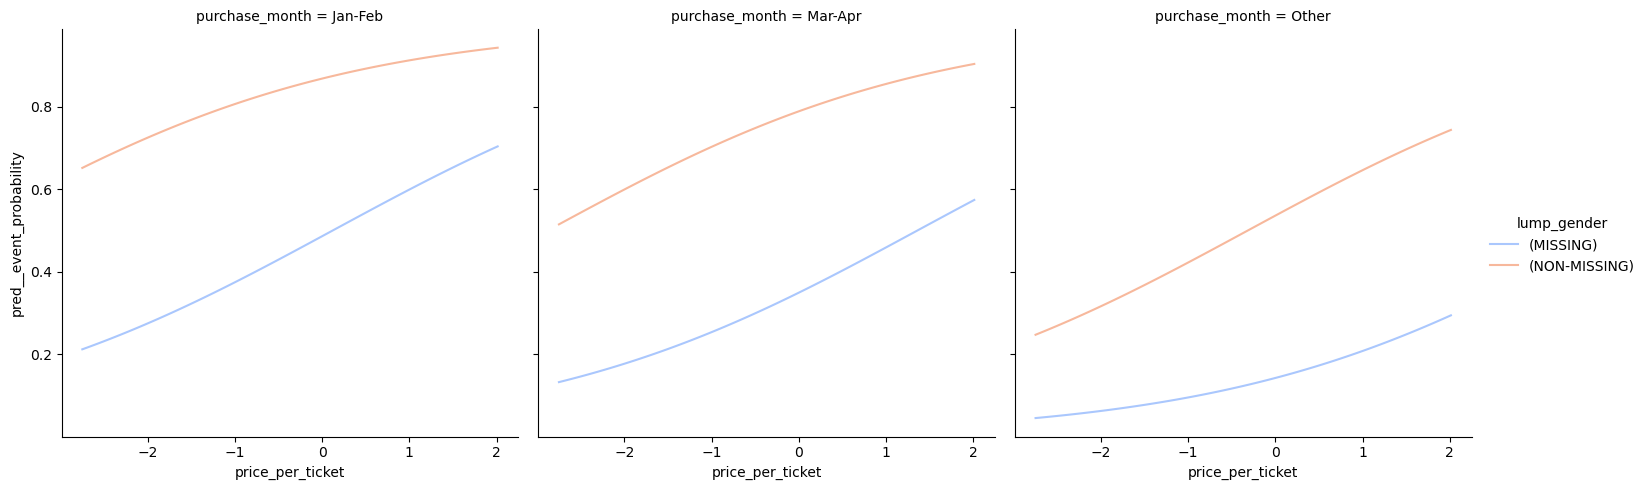

In [692]:
sns.relplot(data = dfviz_3, x='price_per_ticket', y='pred__event_probability', hue='lump_gender', col='purchase_month',
            kind='line', estimator=None, units='lump_gender',
            col_wrap=3, palette='coolwarm')

plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


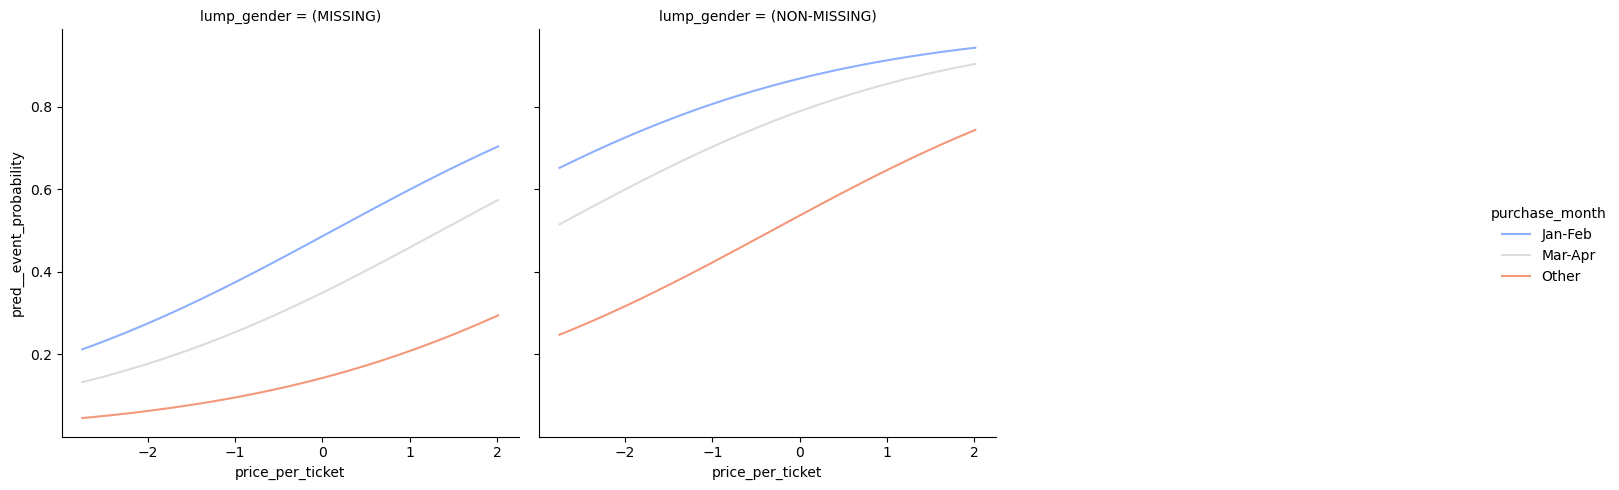

In [693]:
sns.relplot(data = dfviz_3, x='price_per_ticket', y='pred__event_probability', hue='purchase_month', col='lump_gender',
            kind='line', estimator=None, units='purchase_month',
            col_wrap=3, palette='coolwarm')

plt.show()

### You must predict the BEST model on the training set

In [694]:
formulas_list[5]

'y ~ (direction + purchase_month + purchase_dow + price_type + price_level + bin_age + lump_gender + lump_ticket_count) * (distancemiles + price_per_ticket)'

In [695]:
model_5 = formulas_list[5]

In [696]:
model_5

'y ~ (direction + purchase_month + purchase_dow + price_type + price_level + bin_age + lump_gender + lump_ticket_count) * (distancemiles + price_per_ticket)'

In [697]:
input_grid_model_5 = pd.DataFrame([
    (
        lump_gender, purchase_month, price_type, bin_age, price_level, lump_ticket_count, 
        purchase_dow, direction, price_per_ticket, distancemiles
    )
    for distancemiles in [df_copy_dropped.distancemiles.mean()]
    for lump_gender in df_copy_dropped.lump_gender.mode()
    for purchase_month in df_copy_dropped.purchase_month.mode()
    for price_type in df_copy_dropped.price_type.mode()
    for bin_age in df_copy_dropped.bin_age.mode()
    for price_level in df_copy_dropped.price_level.unique()
    for lump_ticket_count in df_copy_dropped.lump_ticket_count.unique()
    for purchase_dow in df_copy_dropped.purchase_dow.mode()
    for direction in df_copy_dropped.direction.mode()
    for price_per_ticket in np.linspace(df_copy_dropped.price_per_ticket.min(), df_copy_dropped.price_per_ticket.max(), num=101)
], columns=[
    'lump_gender', 'purchase_month', 'price_type', 'bin_age', 'price_level', 'lump_ticket_count', 
    'purchase_dow', 'direction', 'price_per_ticket', 'distancemiles'
])

In [698]:
input_grid_model_5.shape

(4040, 10)

In [699]:
model_5_viz = smf.logit( formula=formulas_list[5], data=df_copy_dropped).fit()

Optimization terminated successfully.
         Current function value: 0.444637
         Iterations 8


In [700]:
dfviz_5 = input_grid_model_5.copy()

In [701]:
dfviz_5['pred_probability'] = model_5_viz.predict( input_grid_model_5 )

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


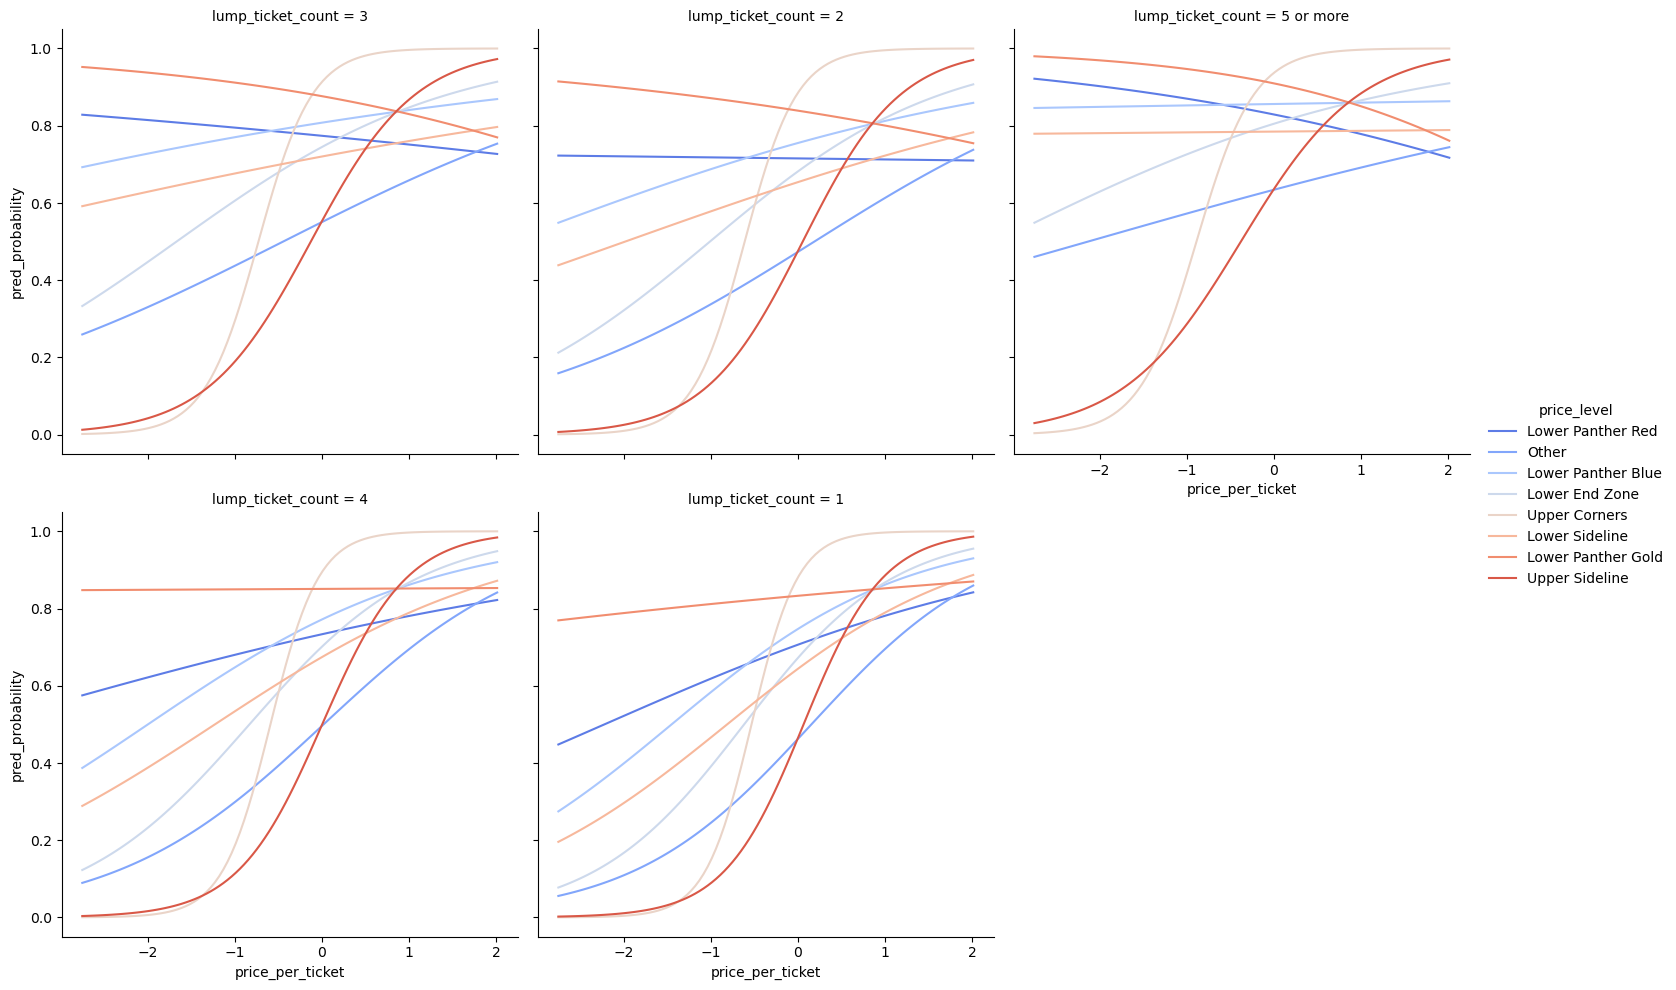

In [702]:
sns.relplot(data = dfviz_5, x='price_per_ticket', y='pred_probability', hue='price_level', col='lump_ticket_count',
            kind='line', estimator=None, units='price_level',col_wrap=3, palette='coolwarm')

plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


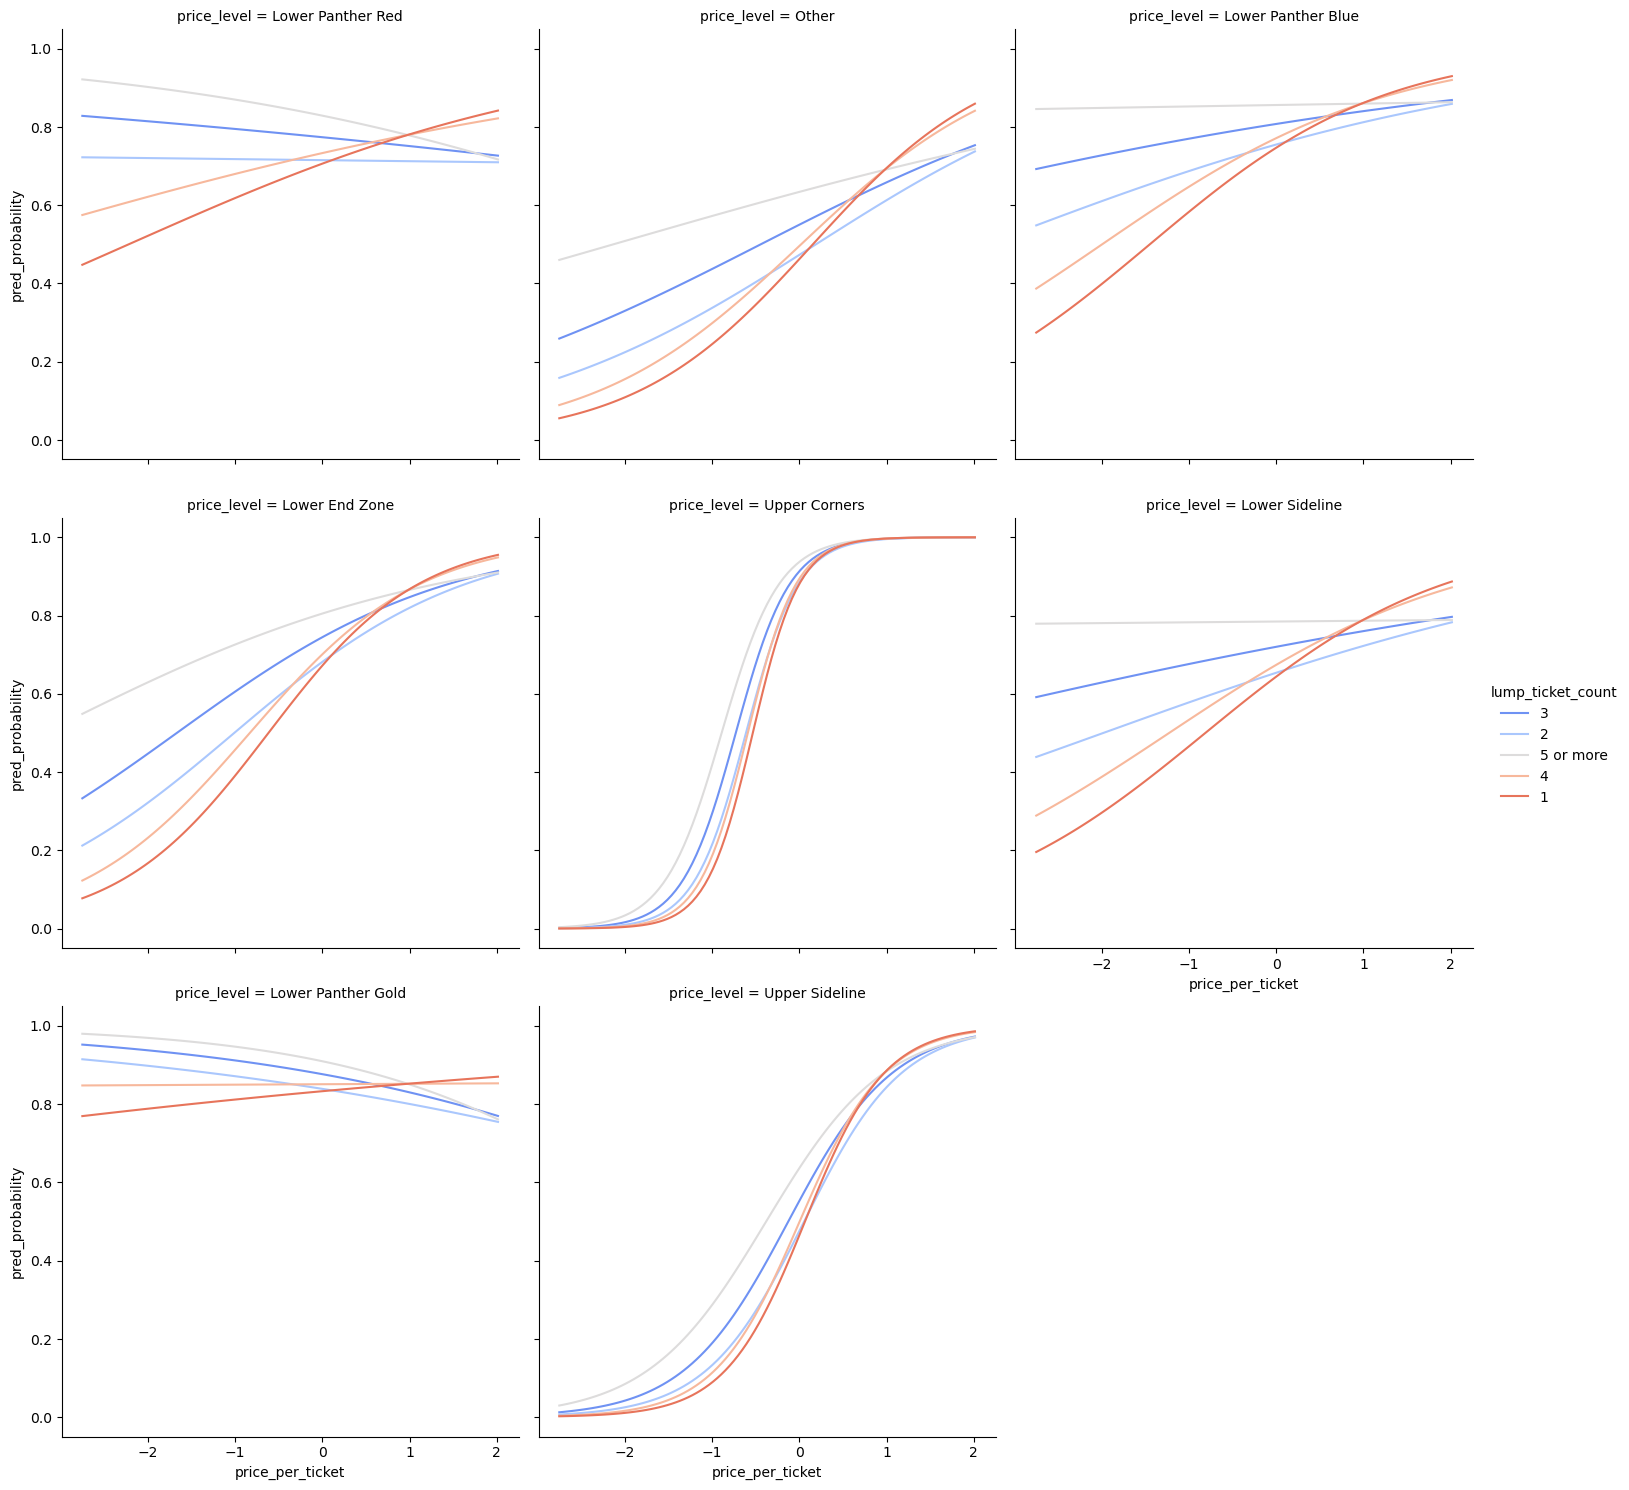

In [703]:
sns.relplot(data = dfviz_5, x='price_per_ticket', y='pred_probability', hue='lump_ticket_count', col='price_level',
            kind='line', estimator=None, units='lump_ticket_count',col_wrap=3, palette='coolwarm')

plt.show()

When analyzing the two models, one based on the best model in the training set and one with all inputs and features, we see the best model in the training set yields more visualizations such as interesting trends based on the inputs that I thought were the most important.

## F. Performance and Validation

In [704]:
formulas_list

['y ~ 1',
 'y ~ direction + purchase_month + purchase_dow + price_type + price_level + bin_age + lump_gender + lump_ticket_count',
 'y ~ distancemiles + price_per_ticket',
 'y ~ distancemiles + price_per_ticket + direction + purchase_month + purchase_dow + price_type + price_level + bin_age + lump_gender + lump_ticket_count',
 'y ~ distancemiles * price_per_ticket + np.power(distancemiles, 2) + np.power(price_per_ticket, 2)',
 'y ~ (direction + purchase_month + purchase_dow + price_type + price_level + bin_age + lump_gender + lump_ticket_count) * (distancemiles + price_per_ticket)',
 'y ~ direction * (distancemiles + np.power(distancemiles, 2)) + purchase_month * (price_per_ticket + np.power(price_per_ticket, 2))',
 'y ~ distancemiles + direction + purchase_month + purchase_dow + price_type + price_level + price_per_ticket + bin_age + lump_gender + lump_ticket_count',
 'y ~ distancemiles * (direction + purchase_month + purchase_dow + price_type + price_level + price_per_ticket + bin_ag

Best model:

In [705]:
formulas_list[5]

'y ~ (direction + purchase_month + purchase_dow + price_type + price_level + bin_age + lump_gender + lump_ticket_count) * (distancemiles + price_per_ticket)'

Simple model:

In [706]:
formulas_list[0]

'y ~ 1'

Medium to high complexity:

In [707]:
formulas_list[6]

'y ~ direction * (distancemiles + np.power(distancemiles, 2)) + purchase_month * (price_per_ticket + np.power(price_per_ticket, 2))'

## Use Cross Validation to evaluate the performance for each of the three models

In [708]:
from sklearn.model_selection import StratifiedKFold

In [709]:
kf = StratifiedKFold( n_splits=5, shuffle=True, random_state=9483156 )

In [710]:
kf.get_n_splits()

5

In [711]:
input_names = df_copy_dropped.drop(columns=['y']).copy().columns.to_list()

In [712]:
output_name = 'y'

Let's define a FUNCTION that manages the FITTING and PERFORMANCE METRIC calculation within the Cross-Validation FOLDS!!!!

Let's focus on the ACCURACY as our performance metric.

In [713]:
def train_and_test_logistic_with_cv(mod_name, a_formula, data_df, x_names, y_name, cv, threshold=0.5):
    # separate the inputs and output
    input_df = data_df.loc[ :, x_names ].copy()
    
    # initialize the performance metric storage lists
    train_res = []
    test_res = []
    
    # SPLIT the data and iterate over the folds
    for train_id, test_id in cv.split( input_df.to_numpy(), data_df[ y_name ].to_numpy() ):
        # subset the training and test splits within each fold
        train_data = data_df.iloc[ train_id, :].copy()
        test_data = data_df.iloc[ test_id, :].copy()
        
        # FIT the model on the TRAINING data within the current FOLD
        a_mod = smf.logit(formula=a_formula, data=train_data).fit()
        
        # PREDICT the TRAINING within each FOLD
        train_copy = train_data.copy()
        train_copy['pred_probability'] = a_mod.predict( train_data )
        train_copy['pred_class'] = np.where( train_copy.pred_probability > threshold, 1, 0 )
        
        # PREDICT the TESTING within each FOLD
        test_copy = test_data.copy()
        test_copy['pred_probability'] = a_mod.predict( test_data )
        test_copy['pred_class'] = np.where( test_copy.pred_probability > threshold, 1, 0)
        
        # calculate the PERFORMANCE METRIC on the TRAINING SET within the FOLD
        train_res.append( np.mean( train_copy[ y_name ] == train_copy.pred_class ) )
        
        # calculate the PERFORMANCE METRIC on the TESTING SET within the FOLD
        test_res.append( np.mean( test_copy[ y_name ] == test_copy.pred_class ) )
    
    # book keeping to store the results
    train_df = pd.DataFrame({'Accuracy': train_res})
    train_df['from_set'] = 'training'
    train_df['fold_id'] = train_df.index + 1
    
    test_df = pd.DataFrame({'Accuracy': test_res})
    test_df['from_set'] = 'testing'
    test_df['fold_id'] = test_df.index + 1
    
    # combine the splits together
    res_df = pd.concat([train_df, test_df], ignore_index=True)
    
    # add information about the model
    res_df['model_name'] = mod_name
    res_df['model_formula'] = a_formula
    res_df['num_coefs'] = len( a_mod.params )
    res_df['threshold'] = threshold
    
    return res_df

In [714]:
train_and_test_logistic_with_cv(0, formulas_list[5], data_df=df_copy_dropped, x_names=input_names, y_name=output_name, cv=kf)

Optimization terminated successfully.
         Current function value: 0.446497
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.436966
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.449801
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.435477
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.437378
         Iterations 9


Accuracy  from_set  fold_id  model_name  \
0  0.795759  training        1           0   
1  0.796875  training        2           0   
2  0.789062  training        3           0   
3  0.797991  training        4           0   
4  0.797247  training        5           0   
5  0.776786   testing        1           0   
6  0.766369   testing        2           0   
7  0.788690   testing        3           0   
8  0.772321   testing        4           0   
9  0.767857   testing        5           0   

                                       model_formula  num_coefs  threshold  
0  y ~ (direction + purchase_month + purchase_dow...         96        0.5  
1  y ~ (direction + purchase_month + purchase_dow...         96        0.5  
2  y ~ (direction + purchase_month + purchase_dow...         96        0.5  
3  y ~ (direction + purchase_month + purchase_dow...         96        0.5  
4  y ~ (direction + purchase_month + purchase_dow...         96        0.5  
5  y ~ (direction + purchase_month + purchase_dow...         96        0.5  
6  y ~ (direction + purchase_month + purchase_dow...         96        0.5  
7  y ~ (direction + purchase_month + purchase_dow...         96        0.5  
8  y ~ (direction + purchase_month + purchase_dow...         96        0.5  
9  y ~ (direction + purchase_month + purchase_dow...         96        0.5

In [715]:
train_and_test_logistic_with_cv(0, formulas_list[0], data_df=df_copy_dropped, x_names=input_names, y_name=output_name, cv=kf)

Optimization terminated successfully.
         Current function value: 0.637541
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.637541
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.637541
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.637541
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.637541
         Iterations 4


Accuracy  from_set  fold_id  model_name model_formula  num_coefs  threshold
0  0.665179  training        1           0         y ~ 1          1        0.5
1  0.665179  training        2           0         y ~ 1          1        0.5
2  0.665179  training        3           0         y ~ 1          1        0.5
3  0.665179  training        4           0         y ~ 1          1        0.5
4  0.665179  training        5           0         y ~ 1          1        0.5
5  0.665179   testing        1           0         y ~ 1          1        0.5
6  0.665179   testing        2           0         y ~ 1          1        0.5
7  0.665179   testing        3           0         y ~ 1          1        0.5
8  0.665179   testing        4           0         y ~ 1          1        0.5
9  0.665179   testing        5           0         y ~ 1          1        0.5

Let's try on a more complex model!

In [716]:
formulas_list[6]

'y ~ direction * (distancemiles + np.power(distancemiles, 2)) + purchase_month * (price_per_ticket + np.power(price_per_ticket, 2))'

In [717]:
train_and_test_logistic_with_cv(3, formulas_list[6], data_df=df_copy_dropped, x_names=input_names, y_name=output_name, cv=kf)

Optimization terminated successfully.
         Current function value: 0.540003
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.537526
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.541035
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.536425
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.536180
         Iterations 7


Accuracy  from_set  fold_id  model_name  \
0  0.744420  training        1           3   
1  0.742560  training        2           3   
2  0.749256  training        3           3   
3  0.744792  training        4           3   
4  0.747768  training        5           3   
5  0.754464   testing        1           3   
6  0.760417   testing        2           3   
7  0.729167   testing        3           3   
8  0.718750   testing        4           3   
9  0.730655   testing        5           3   

                                       model_formula  num_coefs  threshold  
0  y ~ direction * (distancemiles + np.power(dist...         32        0.5  
1  y ~ direction * (distancemiles + np.power(dist...         32        0.5  
2  y ~ direction * (distancemiles + np.power(dist...         32        0.5  
3  y ~ direction * (distancemiles + np.power(dist...         32        0.5  
4  y ~ direction * (distancemiles + np.power(dist...         32        0.5  
5  y ~ direction * (distancemiles + np.power(dist...         32        0.5  
6  y ~ direction * (distancemiles + np.power(dist...         32        0.5  
7  y ~ direction * (distancemiles + np.power(dist...         32        0.5  
8  y ~ direction * (distancemiles + np.power(dist...         32        0.5  
9  y ~ direction * (distancemiles + np.power(dist...         32        0.5

## Execute Cross Validation
We will first start off with executed CV for all the models, then we will execute CV for models 0, 3 and 6

In [718]:
results_list = []

for m in range( len(formulas_list) ):
    print( '-- Formula ID %d -- ' % m )
    
    results_list.append( train_and_test_logistic_with_cv(m, formulas_list[m], data_df=df_copy_dropped, x_names=input_names, y_name=output_name, cv=kf) )

-- Formula ID 0 -- 
Optimization terminated successfully.
         Current function value: 0.637541
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.637541
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.637541
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.637541
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.637541
         Iterations 4
-- Formula ID 1 -- 
Optimization terminated successfully.
         Current function value: 0.480858
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.477379
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.481010
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.471454
         Iterations 7
Optimization terminated successfully.
    

In [719]:
len( results_list )

10

In [720]:
len( formulas_list )

10

In [721]:
cv_results = pd.concat( results_list, ignore_index=True )

In [722]:
cv_results

Accuracy  from_set  fold_id  model_name  \
0   0.665179  training        1           0   
1   0.665179  training        2           0   
2   0.665179  training        3           0   
3   0.665179  training        4           0   
4   0.665179  training        5           0   
..       ...       ...      ...         ...   
95  0.691964   testing        1           9   
96  0.678571   testing        2           9   
97  0.687500   testing        3           9   
98  0.668155   testing        4           9   
99  0.688988   testing        5           9   

                                  model_formula  num_coefs  threshold  
0                                         y ~ 1          1        0.5  
1                                         y ~ 1          1        0.5  
2                                         y ~ 1          1        0.5  
3                                         y ~ 1          1        0.5  
4                                         y ~ 1          1        0.5  
..                                          ...        ...        ...  
95  y ~ (distancemiles + price_per_ticket) ** 2          4        0.5  
96  y ~ (distancemiles + price_per_ticket) ** 2          4        0.5  
97  y ~ (distancemiles + price_per_ticket) ** 2          4        0.5  
98  y ~ (distancemiles + price_per_ticket) ** 2          4        0.5  
99  y ~ (distancemiles + price_per_ticket) ** 2          4        0.5  

[100 rows x 7 columns]

In [723]:
cv_results.model_name.value_counts()

model_name
0    10
1    10
2    10
3    10
4    10
5    10
6    10
7    10
8    10
9    10
Name: count, dtype: int64

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


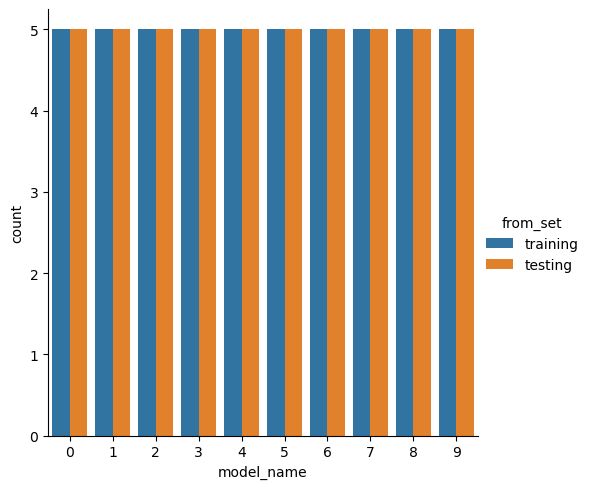

In [724]:
sns.catplot(data = cv_results, x='model_name', hue='from_set', kind='count')

plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


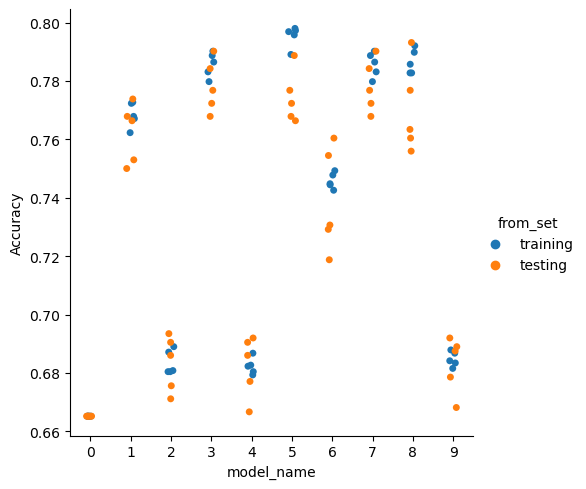

In [725]:
sns.catplot(data = cv_results, x='model_name', y='Accuracy', hue='from_set')

plt.show()

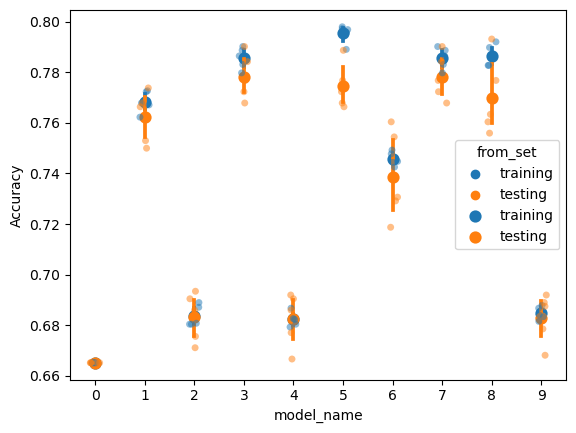

In [726]:
fig, ax = plt.subplots()

sns.stripplot(data = cv_results, x='model_name', y='Accuracy', hue='from_set', alpha=0.5, ax=ax)

sns.pointplot(data = cv_results, x='model_name', y='Accuracy', hue='from_set', join=False, ax=ax)

plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


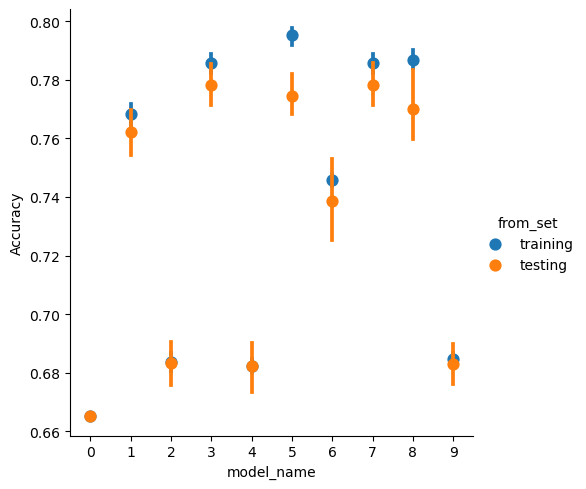

In [727]:
sns.catplot(data = cv_results, x='model_name', y='Accuracy', hue='from_set', kind='point', join=False)

plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


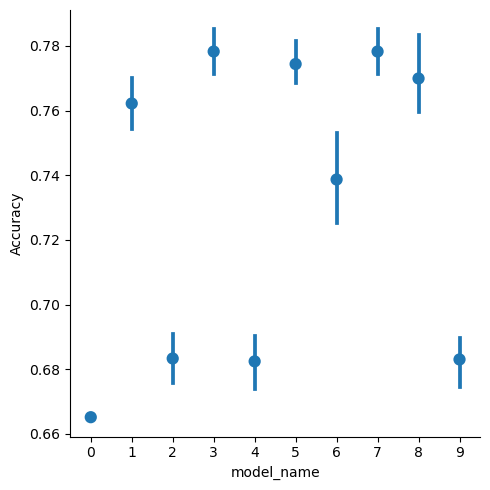

In [728]:
sns.catplot(data = cv_results.loc[ cv_results.from_set == 'testing', :],
            x='model_name', y='Accuracy', kind='point', join=False,
            errorbar=('ci', 95))

plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


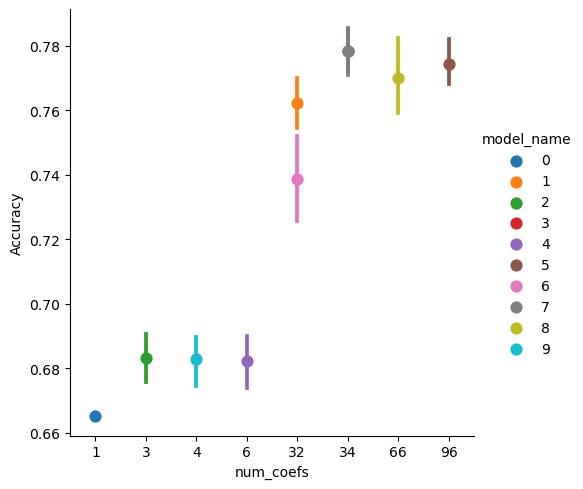

In [729]:
sns.catplot(data = cv_results.loc[ cv_results.from_set == 'testing', :],
            x='num_coefs', y='Accuracy', kind='point', join=False,
            hue='model_name',
            errorbar=('ci', 95))

plt.show()

In [730]:
formulas_list[3]

'y ~ distancemiles + price_per_ticket + direction + purchase_month + purchase_dow + price_type + price_level + bin_age + lump_gender + lump_ticket_count'

### Now we will execute Cross Validation with the 3 models

In [731]:
selected_models = [0, 3, 6]
results_list_3 = []

for m in selected_models:
    print( '-- Formula ID %d -- ' % m )
    
    results_list_3.append( train_and_test_logistic_with_cv(m, formulas_list[m], data_df=df_copy_dropped, x_names=input_names, y_name=output_name, cv=kf) )

-- Formula ID 0 -- 
Optimization terminated successfully.
         Current function value: 0.637541
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.637541
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.637541
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.637541
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.637541
         Iterations 4
-- Formula ID 3 -- 
Optimization terminated successfully.
         Current function value: 0.466162
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.461795
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.467537
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.455732
         Iterations 7
Optimization terminated successfully.
    

In [732]:
len(results_list_3)

3

In [733]:
len(formulas_list)

10

In [734]:
cv_results_3 = pd.concat( results_list_3, ignore_index=True )

In [735]:
cv_results_3

Accuracy  from_set  fold_id  model_name  \
0   0.665179  training        1           0   
1   0.665179  training        2           0   
2   0.665179  training        3           0   
3   0.665179  training        4           0   
4   0.665179  training        5           0   
5   0.665179   testing        1           0   
6   0.665179   testing        2           0   
7   0.665179   testing        3           0   
8   0.665179   testing        4           0   
9   0.665179   testing        5           0   
10  0.783110  training        1           3   
11  0.788690  training        2           3   
12  0.779762  training        3           3   
13  0.786458  training        4           3   
14  0.790179  training        5           3   
15  0.776786   testing        1           3   
16  0.784226   testing        2           3   
17  0.790179   testing        3           3   
18  0.767857   testing        4           3   
19  0.772321   testing        5           3   
20  0.744420  training        1           6   
21  0.742560  training        2           6   
22  0.749256  training        3           6   
23  0.744792  training        4           6   
24  0.747768  training        5           6   
25  0.754464   testing        1           6   
26  0.760417   testing        2           6   
27  0.729167   testing        3           6   
28  0.718750   testing        4           6   
29  0.730655   testing        5           6   

                                        model_formula  num_coefs  threshold  
0                                               y ~ 1          1        0.5  
1                                               y ~ 1          1        0.5  
2                                               y ~ 1          1        0.5  
3                                               y ~ 1          1        0.5  
4                                               y ~ 1          1        0.5  
5                                               y ~ 1          1        0.5  
6                                               y ~ 1          1        0.5  
7                                               y ~ 1          1        0.5  
8                                               y ~ 1          1        0.5  
9                                               y ~ 1          1        0.5  
10  y ~ distancemiles + price_per_ticket + directi...         34        0.5  
11  y ~ distancemiles + price_per_ticket + directi...         34        0.5  
12  y ~ distancemiles + price_per_ticket + directi...         34        0.5  
13  y ~ distancemiles + price_per_ticket + directi...         34        0.5  
14  y ~ distancemiles + price_per_ticket + directi...         34        0.5  
15  y ~ distancemiles + price_per_ticket + directi...         34        0.5  
16  y ~ distancemiles + price_per_ticket + directi...         34        0.5  
17  y ~ distancemiles + price_per_ticket + directi...         34        0.5  
18  y ~ distancemiles + price_per_ticket + directi...         34        0.5  
19  y ~ distancemiles + price_per_ticket + directi...         34        0.5  
20  y ~ direction * (distancemiles + np.power(dist...         32        0.5  
21  y ~ direction * (distancemiles + np.power(dist...         32        0.5  
22  y ~ direction * (distancemiles + np.power(dist...         32        0.5  
23  y ~ direction * (distancemiles + np.power(dist...         32        0.5  
24  y ~ direction * (distancemiles + np.power(dist...         32        0.5  
25  y ~ direction * (distancemiles + np.power(dist...         32        0.5  
26  y ~ direction * (distancemiles + np.power(dist...         32        0.5  
27  y ~ direction * (distancemiles + np.power(dist...         32        0.5  
28  y ~ direction * (distancemiles + np.power(dist...         32        0.5  
29  y ~ direction * (distancemiles + np.power(dist...         32        0.5

In [736]:
cv_results_3.model_name.value_counts()

model_name
0    10
3    10
6    10
Name: count, dtype: int64

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


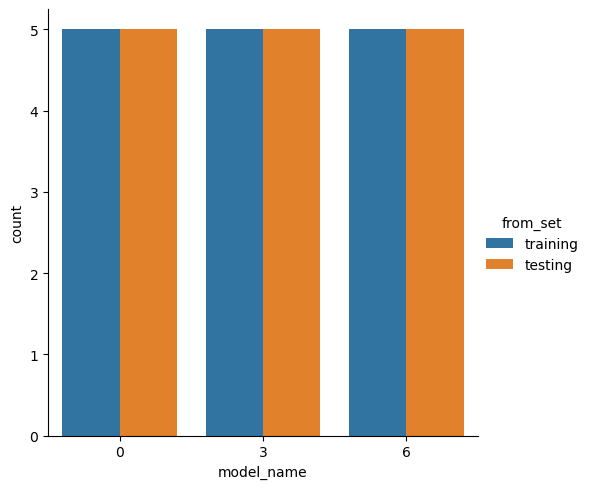

In [737]:
sns.catplot(data = cv_results_3, x='model_name', hue='from_set', kind='count')

plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


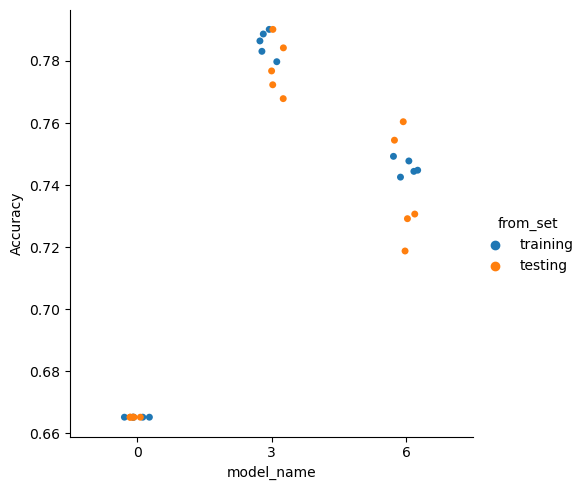

In [738]:
sns.catplot(data = cv_results_3, x='model_name', y='Accuracy', hue='from_set')

plt.show()

Instead, we typically concerned with the AVERAGE performance!!!!!!!

But I will first overlay the AVERAGE with the FOLD results.

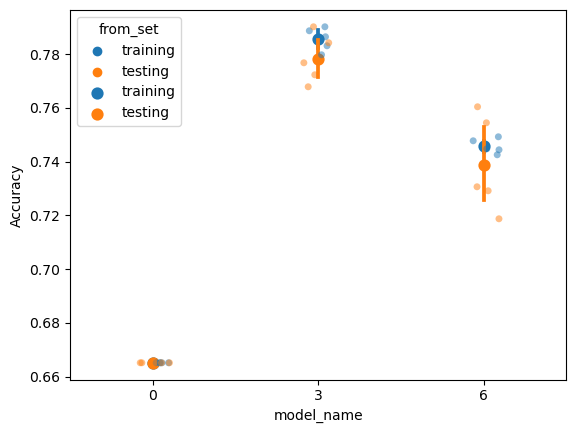

In [739]:
fig, ax = plt.subplots()

sns.stripplot(data = cv_results_3, x='model_name', y='Accuracy', hue='from_set', alpha=0.5, ax=ax)

sns.pointplot(data = cv_results_3, x='model_name', y='Accuracy', hue='from_set', join=False, ax=ax)

plt.show()

Let's just focus on the AVERAGE, so summarize the cross-validation results using a POINT PLOT.

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


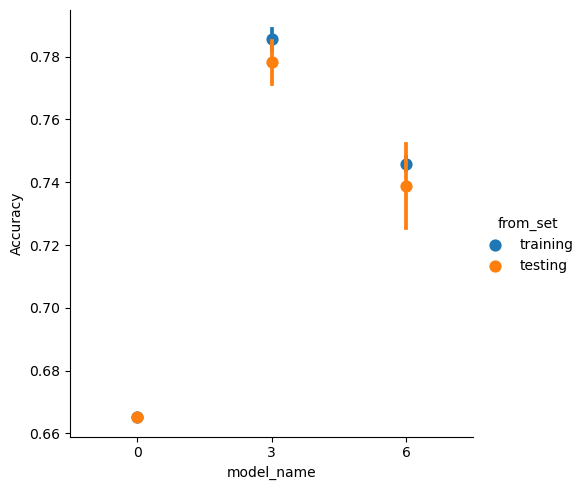

In [740]:
sns.catplot(data = cv_results_3, x='model_name', y='Accuracy', hue='from_set', kind='point', join=False)

plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


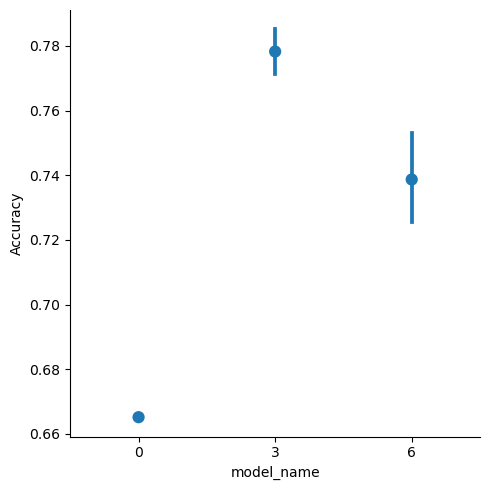

In [741]:
sns.catplot(data = cv_results_3.loc[ cv_results.from_set == 'testing', :],
            x='model_name', y='Accuracy', kind='point', join=False,
            errorbar=('ci', 95))

plt.show()

## One standard error rule choose the SIMPLEST BEST model!!!!!

Let's confirm the performance based on the number of coefficients.

In [742]:
cv_results_3

Accuracy  from_set  fold_id  model_name  \
0   0.665179  training        1           0   
1   0.665179  training        2           0   
2   0.665179  training        3           0   
3   0.665179  training        4           0   
4   0.665179  training        5           0   
5   0.665179   testing        1           0   
6   0.665179   testing        2           0   
7   0.665179   testing        3           0   
8   0.665179   testing        4           0   
9   0.665179   testing        5           0   
10  0.783110  training        1           3   
11  0.788690  training        2           3   
12  0.779762  training        3           3   
13  0.786458  training        4           3   
14  0.790179  training        5           3   
15  0.776786   testing        1           3   
16  0.784226   testing        2           3   
17  0.790179   testing        3           3   
18  0.767857   testing        4           3   
19  0.772321   testing        5           3   
20  0.744420  training        1           6   
21  0.742560  training        2           6   
22  0.749256  training        3           6   
23  0.744792  training        4           6   
24  0.747768  training        5           6   
25  0.754464   testing        1           6   
26  0.760417   testing        2           6   
27  0.729167   testing        3           6   
28  0.718750   testing        4           6   
29  0.730655   testing        5           6   

                                        model_formula  num_coefs  threshold  
0                                               y ~ 1          1        0.5  
1                                               y ~ 1          1        0.5  
2                                               y ~ 1          1        0.5  
3                                               y ~ 1          1        0.5  
4                                               y ~ 1          1        0.5  
5                                               y ~ 1          1        0.5  
6                                               y ~ 1          1        0.5  
7                                               y ~ 1          1        0.5  
8                                               y ~ 1          1        0.5  
9                                               y ~ 1          1        0.5  
10  y ~ distancemiles + price_per_ticket + directi...         34        0.5  
11  y ~ distancemiles + price_per_ticket + directi...         34        0.5  
12  y ~ distancemiles + price_per_ticket + directi...         34        0.5  
13  y ~ distancemiles + price_per_ticket + directi...         34        0.5  
14  y ~ distancemiles + price_per_ticket + directi...         34        0.5  
15  y ~ distancemiles + price_per_ticket + directi...         34        0.5  
16  y ~ distancemiles + price_per_ticket + directi...         34        0.5  
17  y ~ distancemiles + price_per_ticket + directi...         34        0.5  
18  y ~ distancemiles + price_per_ticket + directi...         34        0.5  
19  y ~ distancemiles + price_per_ticket + directi...         34        0.5  
20  y ~ direction * (distancemiles + np.power(dist...         32        0.5  
21  y ~ direction * (distancemiles + np.power(dist...         32        0.5  
22  y ~ direction * (distancemiles + np.power(dist...         32        0.5  
23  y ~ direction * (distancemiles + np.power(dist...         32        0.5  
24  y ~ direction * (distancemiles + np.power(dist...         32        0.5  
25  y ~ direction * (distancemiles + np.power(dist...         32        0.5  
26  y ~ direction * (distancemiles + np.power(dist...         32        0.5  
27  y ~ direction * (distancemiles + np.power(dist...         32        0.5  
28  y ~ direction * (distancemiles + np.power(dist...         32        0.5  
29  y ~ direction * (distancemiles + np.power(dist...         32        0.5

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


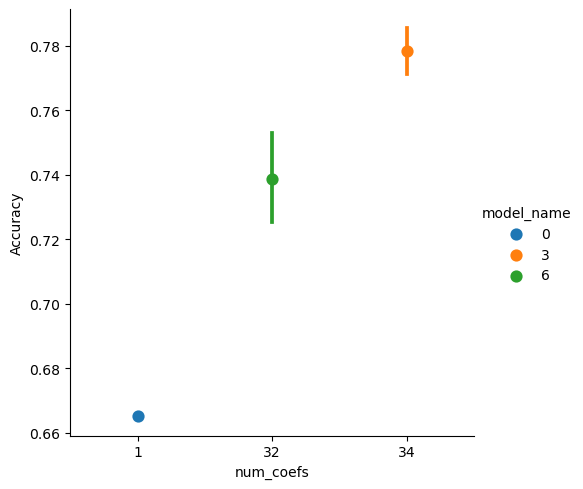

In [743]:
sns.catplot(data = cv_results_3.loc[ cv_results.from_set == 'testing', :],
            x='num_coefs', y='Accuracy', kind='point', join=False,
            hue='model_name',
            errorbar=('ci', 95))

plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


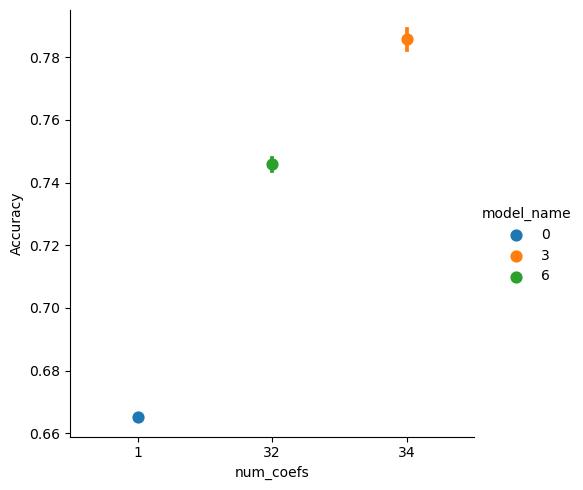

In [744]:
sns.catplot(data = cv_results_3.loc[ cv_results.from_set == 'training', :],
            x='num_coefs', y='Accuracy', kind='point', join=False,
            hue='model_name',
            errorbar=('ci', 95))

plt.show()

### Which model is BEST according to CROSS-VALIDATION?
We see a fluctuation of the highest accuracy between multiple models. However we see a consistent high accuracy of model 3. Hence, model 3 is our best model

In [745]:
formulas_list[3]

'y ~ distancemiles + price_per_ticket + direction + purchase_month + purchase_dow + price_type + price_level + bin_age + lump_gender + lump_ticket_count'

### Is this model different from the model identified as the BEST according to the training set?
Yes! From before when measuing ROC_AUC and Accuracy of the training set, we found model 5 to be the best. However, when analyzing the test set, we found model 3 to be the best

### How many regression coefficients are associated with the best model?
Using the summary and params method, there are 34 regression coefficients associated with the best model

## Model Selection

Chose the model that does the BEST on average on NEW Data!!!!!!!

We must FIT the model one final time using the ENTIRE data set!!!!

In [746]:
best_model_3 = smf.logit( formula=formulas_list[3], data=df_copy_dropped).fit()

Optimization terminated successfully.
         Current function value: 0.462632
         Iterations 7


In [747]:
best_model_3.params

Intercept                            1.050593
direction[T.N]                      -0.034571
direction[T.NE]                     -0.185062
direction[T.NW]                     -0.041825
direction[T.S]                      -0.083507
direction[T.SE]                     -0.050337
direction[T.SW]                     -0.237339
direction[T.W]                      -0.234017
purchase_month[T.Mar-Apr]           -0.567185
purchase_month[T.Other]             -1.740507
purchase_dow[T.Mon]                 -0.345851
purchase_dow[T.Other]               -0.231008
purchase_dow[T.Thu]                  0.018820
purchase_dow[T.Tue]                  0.219224
purchase_dow[T.Wed]                  0.276183
price_type[T.IA]                    -1.186251
price_type[T.IA-2]                  -0.285364
price_type[T.Other]                 -0.238740
price_level[T.Lower Panther Blue]    0.502473
price_level[T.Lower Panther Gold]    1.094613
price_level[T.Lower Panther Red]     0.295795
price_level[T.Lower Sideline]     

In [748]:
best_model_3.pvalues < 0.05

Intercept                             True
direction[T.N]                       False
direction[T.NE]                      False
direction[T.NW]                      False
direction[T.S]                       False
direction[T.SE]                      False
direction[T.SW]                      False
direction[T.W]                       False
purchase_month[T.Mar-Apr]             True
purchase_month[T.Other]               True
purchase_dow[T.Mon]                   True
purchase_dow[T.Other]                False
purchase_dow[T.Thu]                  False
purchase_dow[T.Tue]                  False
purchase_dow[T.Wed]                  False
price_type[T.IA]                      True
price_type[T.IA-2]                   False
price_type[T.Other]                  False
price_level[T.Lower Panther Blue]     True
price_level[T.Lower Panther Gold]     True
price_level[T.Lower Panther Red]     False
price_level[T.Lower Sideline]        False
price_level[T.Other]                  True
price_level

In [749]:
np.sum(best_model_3.pvalues < 0.05)

16

In [750]:
np.abs( best_model_3.params[ best_model_3.pvalues < 0.05 ] ).sort_values(ascending=False)

lump_gender[T.(NON-MISSING)]         1.940671
purchase_month[T.Other]              1.740507
price_type[T.IA]                     1.186251
bin_age[T.B]                         1.100569
price_level[T.Lower Panther Gold]    1.094613
Intercept                            1.050593
lump_ticket_count[T.5 or more]       0.899569
price_level[T.Other]                 0.614852
price_level[T.Upper Sideline]        0.576411
purchase_month[T.Mar-Apr]            0.567185
bin_age[T.A]                         0.530891
price_level[T.Lower Panther Blue]    0.502473
price_level[T.Upper Corners]         0.502330
price_per_ticket                     0.457559
purchase_dow[T.Mon]                  0.345851
distancemiles                        0.204870
dtype: float64

In [751]:
input_grid__for_best_model = pd.DataFrame([
    (
        lump_gender, purchase_month, price_type, bin_age, price_level, lump_ticket_count, 
        purchase_dow, direction, price_per_ticket, distancemiles
    )
    for distancemiles in [df_copy_dropped.distancemiles.mean()]
    for lump_gender in df_copy_dropped.lump_gender.unique()
    for purchase_month in df_copy_dropped.purchase_month.unique()
    for price_type in df_copy_dropped.price_type.mode()
    for bin_age in df_copy_dropped.bin_age.mode()
    for price_level in df_copy_dropped.price_level.mode()
    for lump_ticket_count in df_copy_dropped.lump_ticket_count.mode()
    for purchase_dow in df_copy_dropped.purchase_dow.mode()
    for direction in df_copy_dropped.direction.mode()
    for price_per_ticket in np.linspace(df_copy_dropped.price_per_ticket.min(), df_copy_dropped.price_per_ticket.max(), num=101)
], columns=[
    'lump_gender', 'purchase_month', 'price_type', 'bin_age', 'price_level', 'lump_ticket_count', 
    'purchase_dow', 'direction', 'price_per_ticket', 'distancemiles'
])

In [752]:
input_grid_for_best_model.nunique()

lump_gender            1
purchase_month         1
price_type             1
bin_age                1
price_level            8
lump_ticket_count      5
purchase_dow           1
direction              1
price_per_ticket     101
distancemiles          1
dtype: int64

In [753]:
input_grid_for_best_model.shape

(4040, 10)

In [754]:
input_grid_for_best_model.lump_ticket_count.value_counts()

lump_ticket_count
3            808
2            808
5 or more    808
4            808
1            808
Name: count, dtype: int64

In [755]:
dfviz = input_grid_for_best_model.copy()

In [756]:
dfviz['pred_probability'] = best_model_3.predict( input_grid_for_best_model )

In [757]:
dfviz

lump_gender purchase_month price_type    bin_age        price_level  \
0      (MISSING)        Jan-Feb          A  (MISSING)  Lower Panther Red   
1      (MISSING)        Jan-Feb          A  (MISSING)  Lower Panther Red   
2      (MISSING)        Jan-Feb          A  (MISSING)  Lower Panther Red   
3      (MISSING)        Jan-Feb          A  (MISSING)  Lower Panther Red   
4      (MISSING)        Jan-Feb          A  (MISSING)  Lower Panther Red   
...          ...            ...        ...        ...                ...   
4035   (MISSING)        Jan-Feb          A  (MISSING)     Upper Sideline   
4036   (MISSING)        Jan-Feb          A  (MISSING)     Upper Sideline   
4037   (MISSING)        Jan-Feb          A  (MISSING)     Upper Sideline   
4038   (MISSING)        Jan-Feb          A  (MISSING)     Upper Sideline   
4039   (MISSING)        Jan-Feb          A  (MISSING)     Upper Sideline   

     lump_ticket_count purchase_dow direction  price_per_ticket  \
0                    3          Mon         W         -2.750670   
1                    3          Mon         W         -2.703033   
2                    3          Mon         W         -2.655396   
3                    3          Mon         W         -2.607759   
4                    3          Mon         W         -2.560122   
...                ...          ...       ...               ...   
4035                 1          Mon         W          1.822478   
4036                 1          Mon         W          1.870115   
4037                 1          Mon         W          1.917752   
4038                 1          Mon         W          1.965389   
4039                 1          Mon         W          2.013026   

      distancemiles  pred_probability  
0     -8.035900e-17          0.484353  
1     -8.035900e-17          0.489798  
2     -8.035900e-17          0.495246  
3     -8.035900e-17          0.500695  
4     -8.035900e-17          0.506144  
...             ...               ...  
4035  -8.035900e-17          0.674411  
4036  -8.035900e-17          0.679179  
4037  -8.035900e-17          0.683910  
4038  -8.035900e-17          0.688603  
4039  -8.035900e-17          0.693257  

[4040 rows x 11 columns]

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


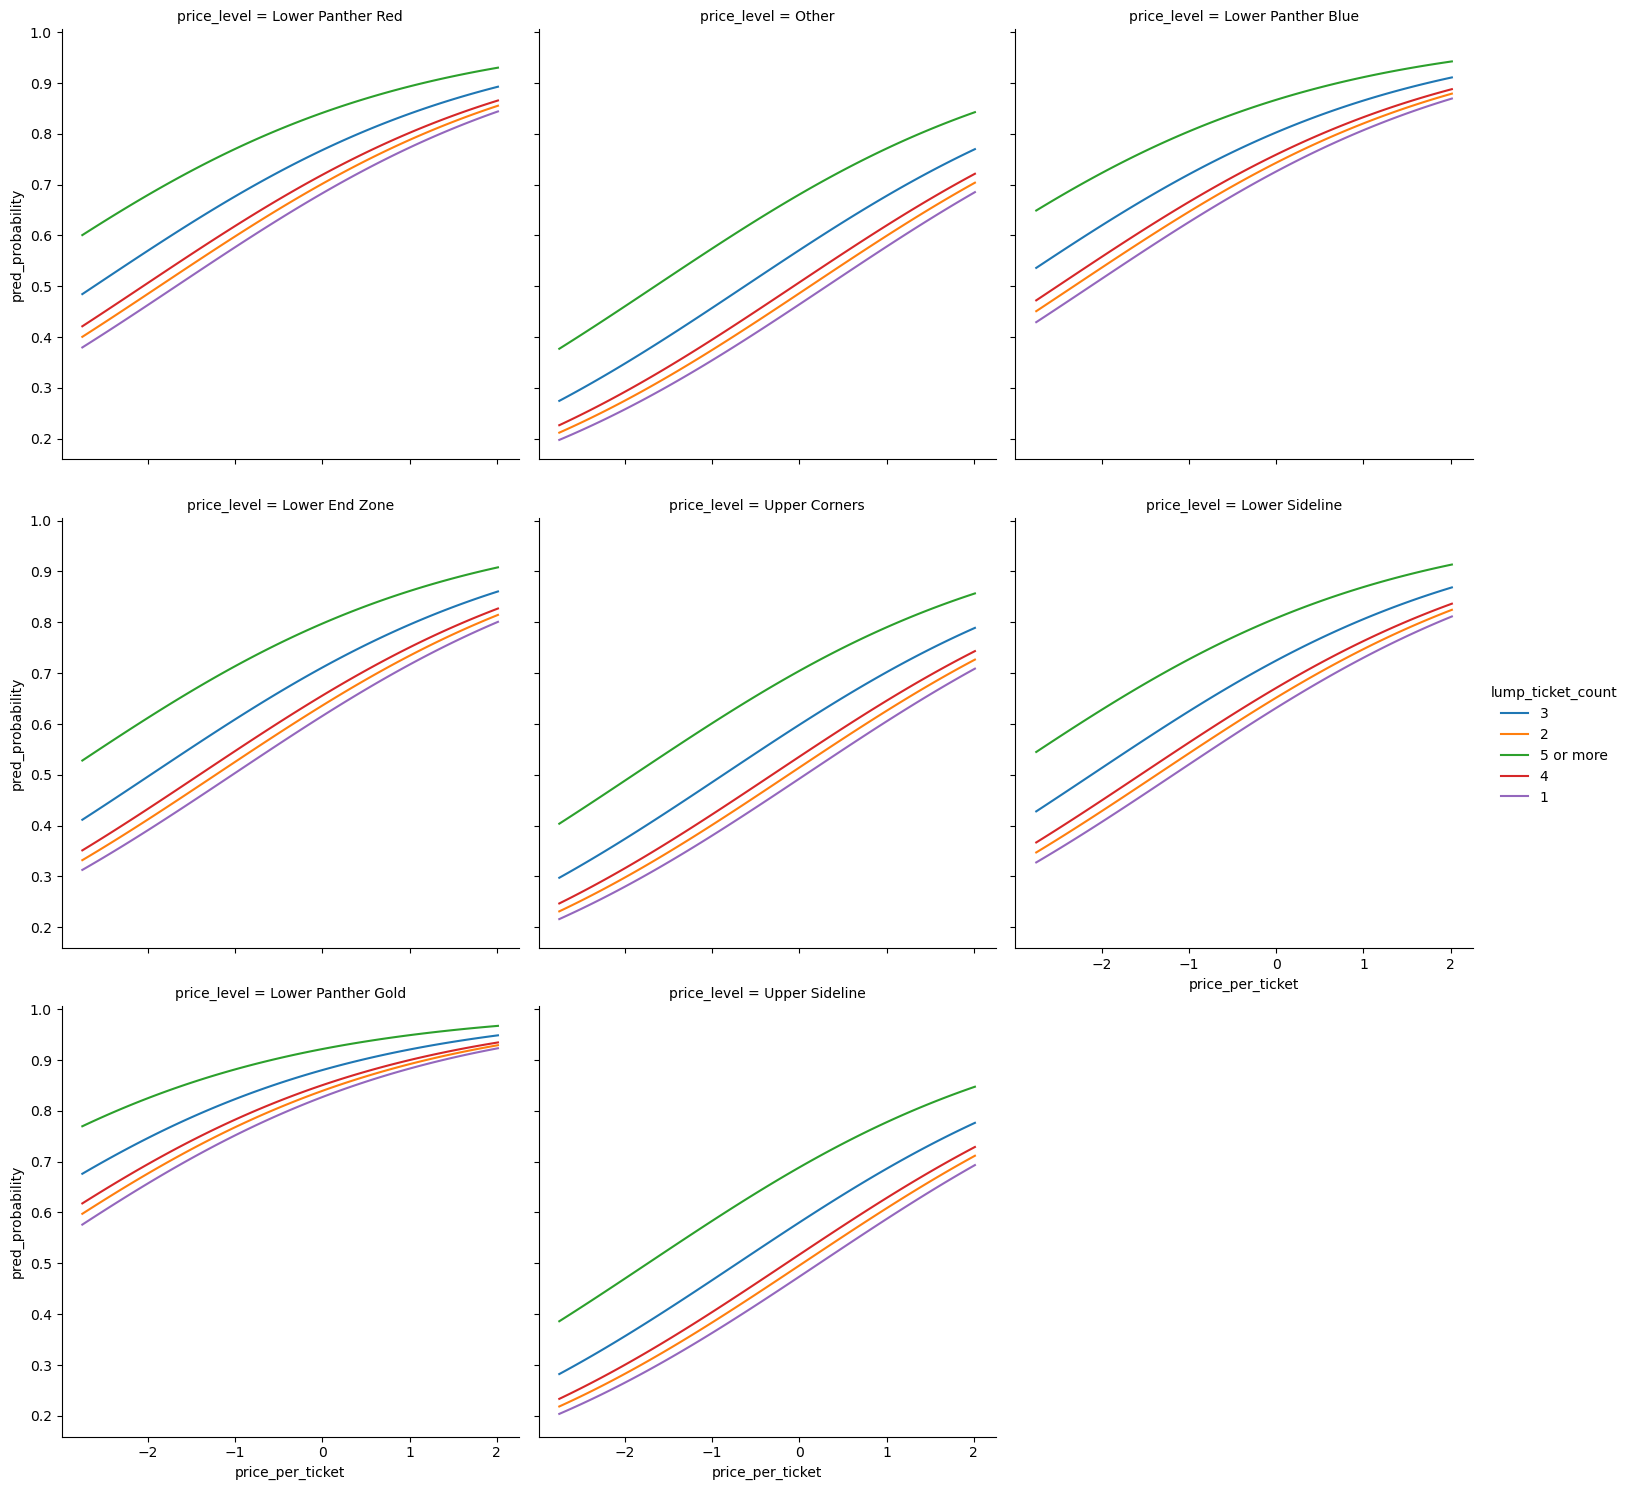

In [758]:
sns.relplot(data = dfviz, x='price_per_ticket', y='pred_probability', hue='lump_ticket_count', col='price_level',
            kind='line', estimator=None, units='price_level',
            col_wrap=3)

plt.show()

D:\Anaconda\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


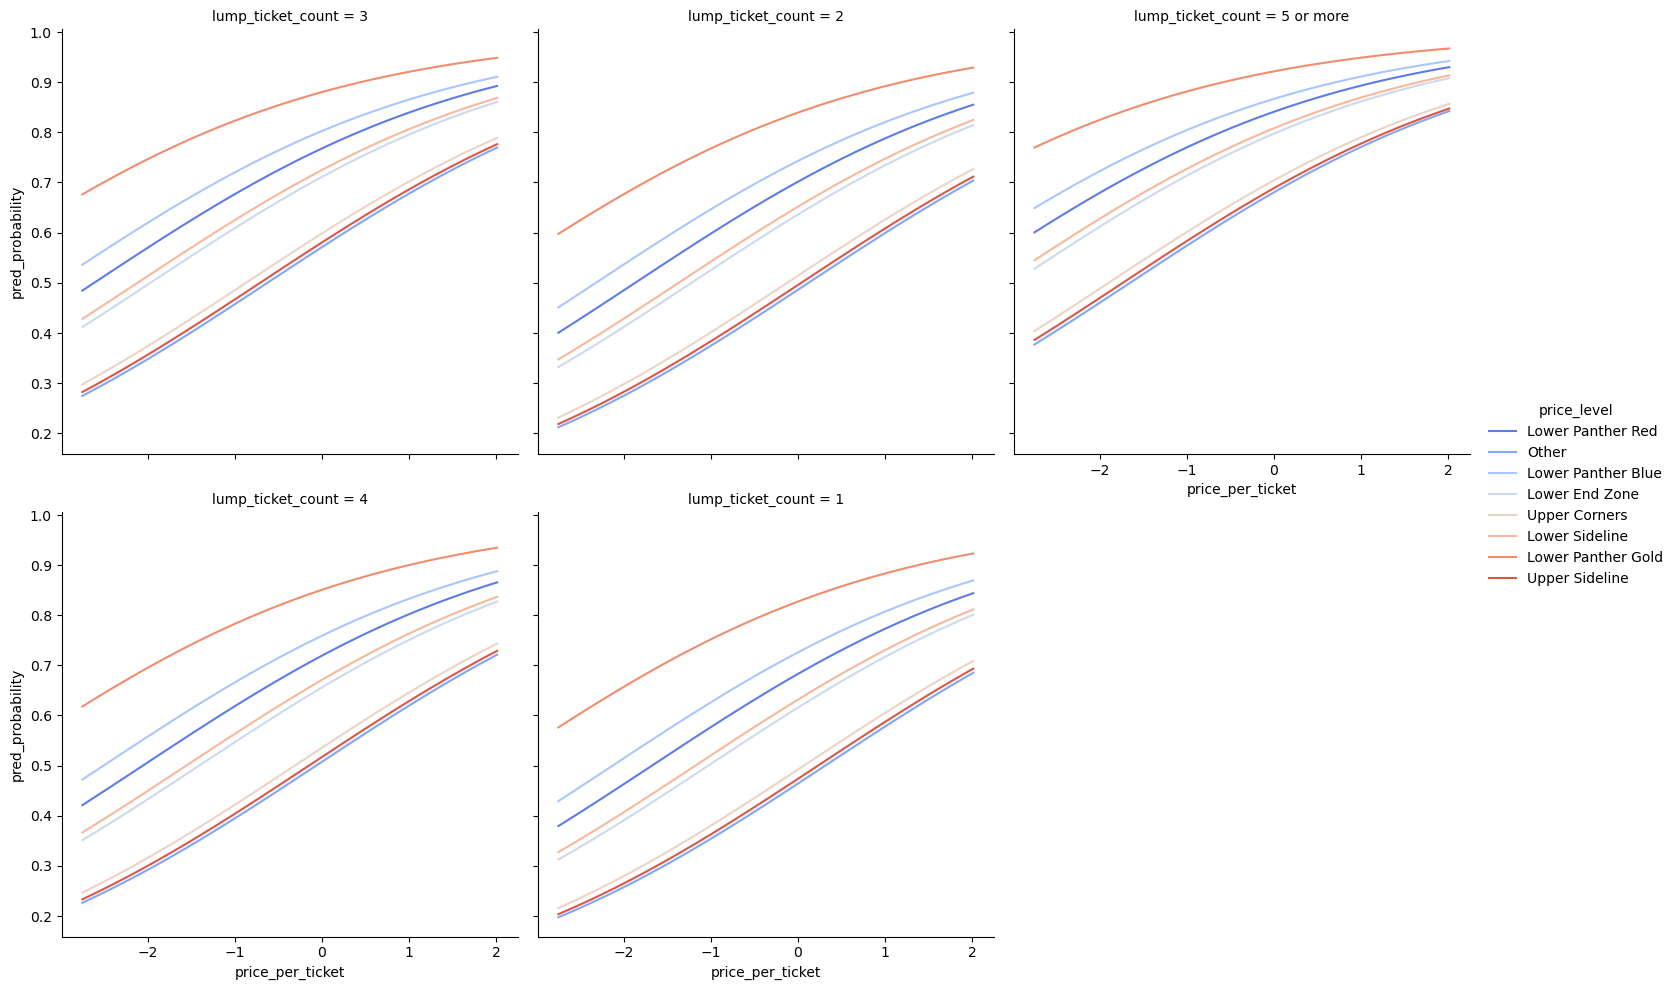

In [759]:
sns.relplot(data = dfviz, x='price_per_ticket', y='pred_probability', hue='price_level', col='lump_ticket_count',
            kind='line', estimator=None, units='lump_ticket_count',col_wrap=3, palette='coolwarm')

plt.show()